# Multivariate Data Analysis

## Data fields

Most of the fields are self-explanatory. The following are descriptions for those that aren't.

- Id - an Id that represents a (Store, Date) duple within the test set
- Store - a unique Id for each store
- Sales - the turnover for any given day (this is what you are predicting)
- Customers - the number of customers on a given day
- Open - an indicator for whether the store was open: 0 = closed, 1 = open
- StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
- SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
- StoreType - differentiates between 4 different store models: a, b, c, d
- Assortment - describes an assortment level: a = basic, b = extra, c = extended
- CompetitionDistance - distance in meters to the nearest competitor store
- CompetitionOpenSince\[Month/Year\] - gives the approximate year and month of the time the nearest competitor was opened
- Promo - indicates whether a store is running a promo on that day
- Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
- Promo2Since\[Year/Week\] - describes the year and calendar week when the store started participating in Promo2
- PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_dtypes = {'Store':'object','Sales':'int','Customers':'int',
               'Open':'object', 'Promo':'object', 'StateHoliday':'object', 'SchoolHoliday':'object'}

In [3]:
df_train = pd.read_csv('/home/timbo/Repos/kaggle/rossmann/datasets/train.csv', delimiter=',', dtype=train_dtypes,
                      parse_dates=['DayOfWeek','Date'])

In [4]:
test_dtypes = {'Store':'object','Id':'object','Customers':'int',
               'Open':'object', 'Promo':'object', 'StateHoliday':'object', 'SchoolHoliday':'object'}

In [5]:
df_test = pd.read_csv('/home/timbo/Repos/kaggle/rossmann/datasets/test.csv', ',', dtype=train_dtypes,
                      parse_dates=['DayOfWeek','Date'])

In [6]:
stores_dtypes = {'Store':'object','StoreType':'object','Assortment':'object',
               'CompetitionDistance':'float', 'Promo2':'object', 'PromoInterval':'object','CompetitionOpenSinceYear':'object'}

In [7]:
df_stores = pd.read_csv('/home/timbo/Repos/kaggle/rossmann/datasets/store.csv', delimiter=',',
                       parse_dates=['CompetitionOpenSinceMonth',
                                   'Promo2SinceWeek', 'Promo2SinceYear'], dtype=stores_dtypes)

In [15]:
df_train_store_combined = pd.merge(df_train, df_stores, on='Store')

In [33]:
# concate 'CompetitionOpenSinceYear' and 'CompetitionOpenSinceMonth' where 'CompetitionOpenSinceYear' is not null
df_train_store_combined.loc[df_train_store_combined['CompetitionOpenSinceYear'].notnull(), 'CompetitionOpenSince'] = \
df_train_store_combined['CompetitionOpenSinceYear'].astype(str).str.split('-').apply(lambda x:x[0]) + '-' + df_train_store_combined['CompetitionOpenSinceMonth'].astype(str)

In [90]:
df_train_store_combined.loc[df_train_store_combined['Promo2SinceYear'].notnull(), 'Promo2Since'] = \
df_train_store_combined['Promo2SinceYear'].astype(str).str.split('-').apply(lambda x:x[0]) + '-' + df_train_store_combined['Promo2SinceWeek'].astype(str)

In [94]:
df_train_store_combined['Promo2Since'] = pd.to_datetime(df_train_store_combined['Promo2Since'] + '0',format='%Y-%W%w')

In [107]:
df_train_store_combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 20 columns):
Store                        1017209 non-null object
DayOfWeek                    1017209 non-null object
Date                         1017209 non-null datetime64[ns]
Sales                        1017209 non-null int64
Customers                    1017209 non-null int64
Open                         1017209 non-null object
Promo                        1017209 non-null object
StateHoliday                 1017209 non-null object
SchoolHoliday                1017209 non-null object
StoreType                    1017209 non-null object
Assortment                   1017209 non-null object
CompetitionDistance          1014567 non-null float64
CompetitionOpenSinceMonth    693861 non-null object
CompetitionOpenSinceYear     693861 non-null object
Promo2                       1017209 non-null object
Promo2SinceWeek              509178 non-null object
Promo2SinceYear              509178

https://www.kaggle.com/c/rossmann-store-sales/discussion/17313

## Why are there so many 0 sales?

Text(0.5, 1.0, 'Number of zero sales per state holiday')

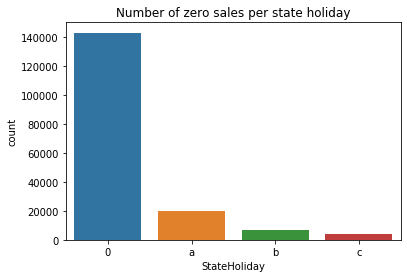

In [28]:
ax = sns.countplot(x="StateHoliday", data=df_train[(df_train['Sales']==0)])
ax.set_title('Number of zero sales per state holiday')

There are also 0 sales on no state holidays => refurbishment and sundays?

Text(0.5, 1.0, 'Number of sales per state holiday')

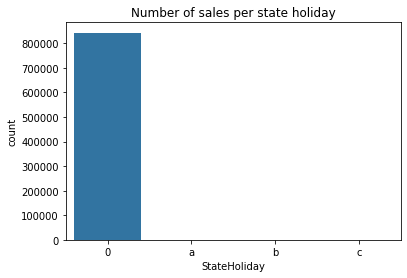

In [29]:
ax = sns.countplot(x="StateHoliday", data=df_train[(df_train['Sales']!=0)])
ax.set_title('Number of sales per state holiday')

On State Holidays there are no sales

Text(0.5, 1.0, 'Number of zero sales per school holiday')

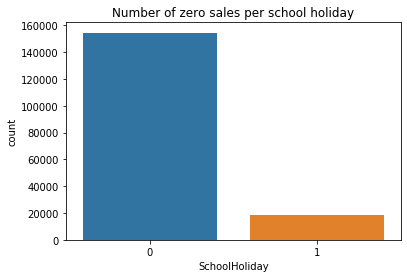

In [30]:
ax = sns.countplot(x="SchoolHoliday", data=df_train[(df_train['Sales']==0)])
ax.set_title('Number of zero sales per school holiday')

Most of the zero sales is when there is no school holiday

Text(0.5, 1.0, 'Number of sales per school holiday')

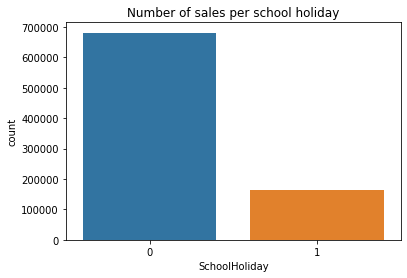

In [31]:
ax = sns.countplot(x="SchoolHoliday", data=df_train[(df_train['Sales']!=0)])
ax.set_title('Number of sales per school holiday')

Most of the non zero sales is when there is no school holiday

Text(0.5, 1.0, 'Number of zero sales per day of week')

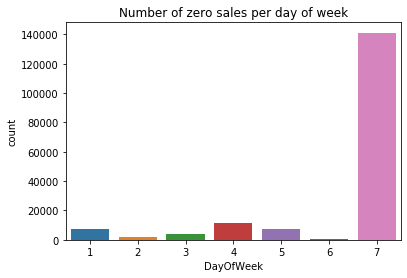

In [32]:
ax = sns.countplot(x="DayOfWeek", data=df_train[(df_train['Sales']==0)])
ax.set_title('Number of zero sales per day of week')

Most of the zero sales are on sundays but some are also during the working days

Text(0.5, 1.0, 'Number of sales per school holiday')

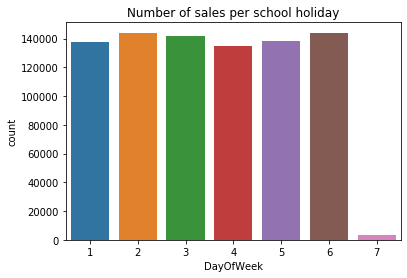

In [33]:
ax = sns.countplot(x="DayOfWeek", data=df_train[(df_train['Sales']!=0)])
ax.set_title('Number of sales per school holiday')

Some none zero sales are even on sundays => Why?

Text(0.5, 1.0, 'Number of zero sales when store was open')

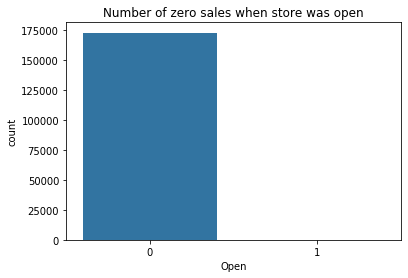

In [34]:
ax = sns.countplot(x="Open", data=df_train[(df_train['Sales']==0)])
ax.set_title('Number of zero sales when store was open')

The zero sales occured only when the store was closed. This makes sense.

Text(0.5, 1.0, 'Number of sales when store was not open')

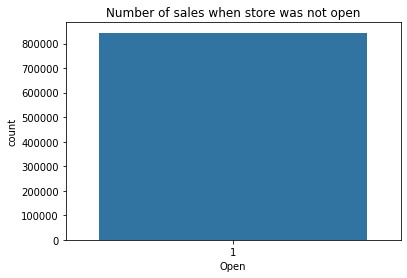

In [35]:
ax = sns.countplot(x="Open", data=df_train[(df_train['Sales']!=0)])
ax.set_title('Number of sales when store was not open')

Sales only happenend when the store was open

### conclusion

The reason for zero sales are closed stores and sundays. But some stores do not have sales during the working days and why are there sales on sundays?

## stores with no sales during the working days

In [36]:
no_sales_df_train = df_train[(df_train['Sales'] == 0) & (df_train['DayOfWeek'] != '7')]

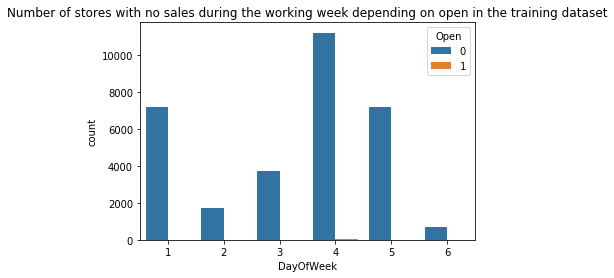

In [37]:
ax = sns.countplot(x='DayOfWeek', hue='Open', data=no_sales_df_train)
ax.set_title('Number of stores with no sales during the working week depending on open in the training dataset')
plt.show()

some stores are open and make no sales

The reason why are many stores have no sales is because they are not open. Why are they not open?

In [38]:
no_sales_df_train = no_sales_df_train[no_sales_df_train['Open'] == '0']

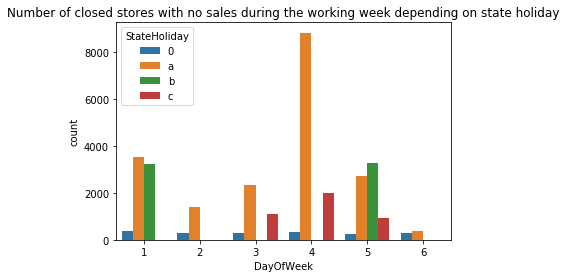

In [39]:
ax = sns.countplot(x='DayOfWeek', hue='StateHoliday', data=no_sales_df_train)
ax.set_title('Number of closed stores with no sales during the working week depending on state holiday')
plt.show()

In [40]:
no_sales_df_train['Store'].unique()

array(['292', '876', '909', ..., '274', '259', '512'], dtype=object)

All of the stores in the training set are closed at least once during the working days. Most of them as a reason of state holidays. But some of them even on regular days.
Christmas has been on Wednesday, Thursday and Friday. Eastern was on Friday and Monday. => Makes sense.

What is the reason for the stores with no sales and no state holiday during the working days?


In [41]:
no_state_holiday_no_sales_df_train = no_sales_df_train[no_sales_df_train['StateHoliday'] == '0']

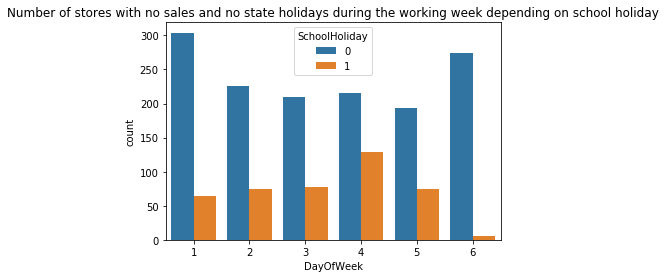

In [42]:
ax = sns.countplot(x='DayOfWeek', hue='SchoolHoliday', data=no_state_holiday_no_sales_df_train)
ax.set_title('Number of stores with no sales and no state holidays during the working week depending on school holiday')
plt.show()

One reason is school holidays

In [43]:
modified_df_train = no_state_holiday_no_sales_df_train[no_state_holiday_no_sales_df_train['SchoolHoliday']=='0']

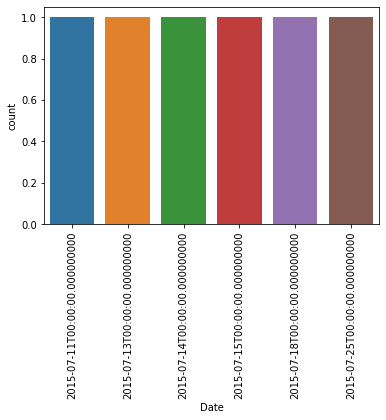

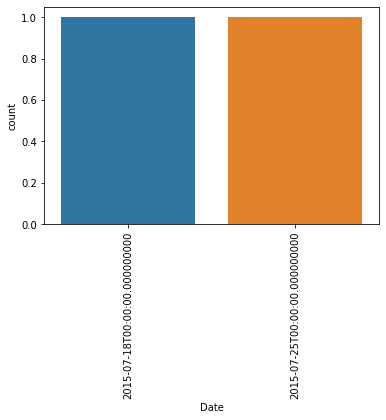

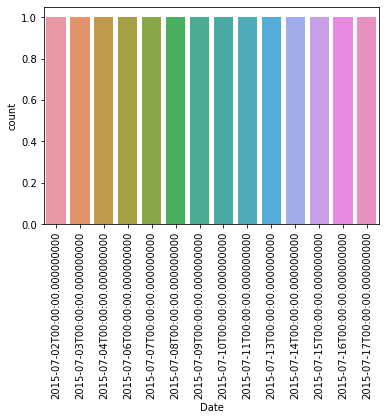

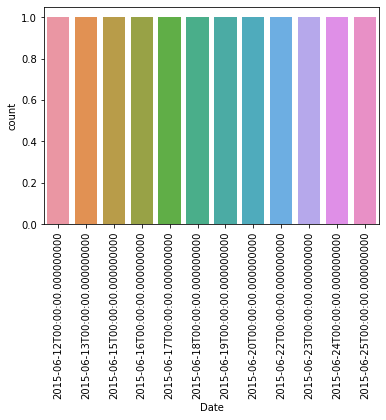

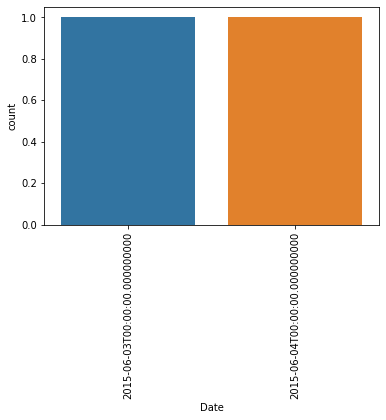

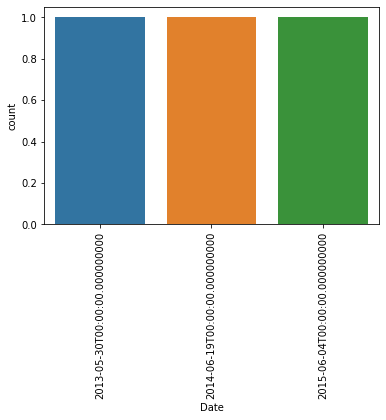

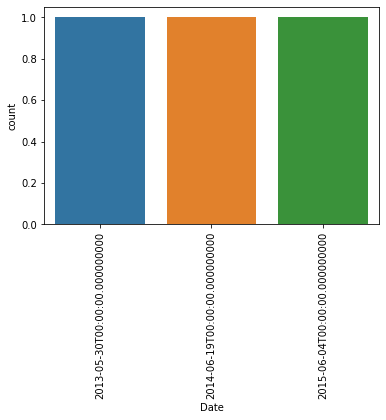

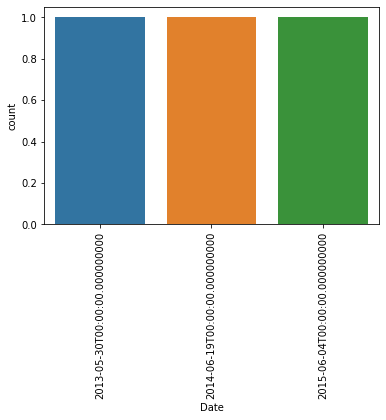

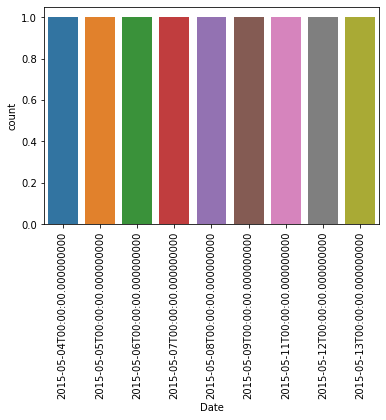

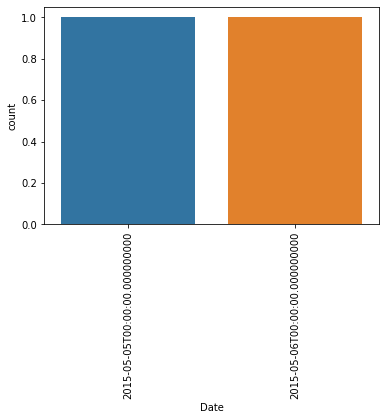

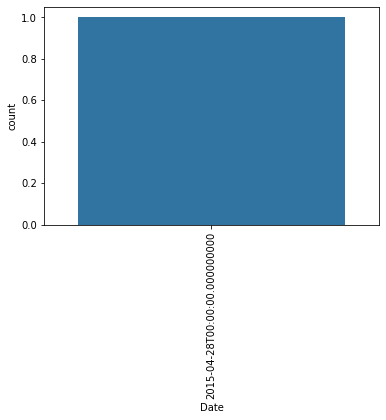

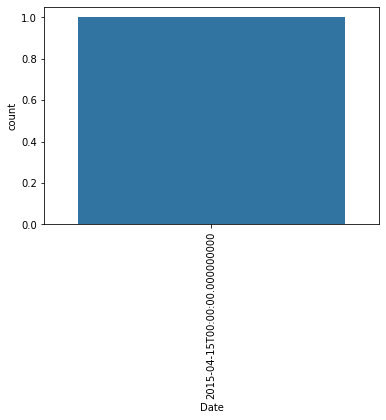

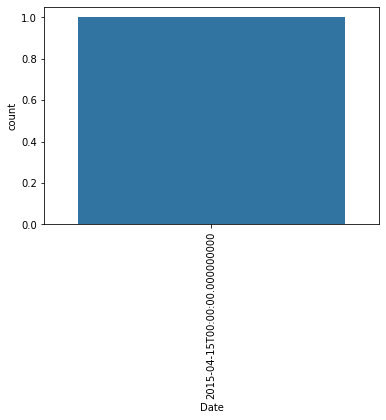

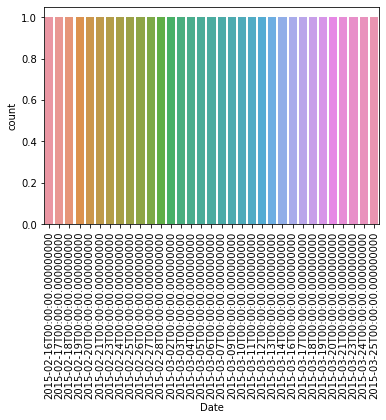

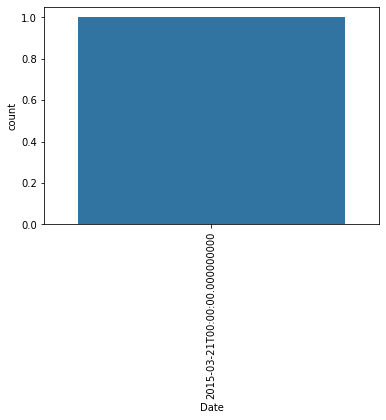

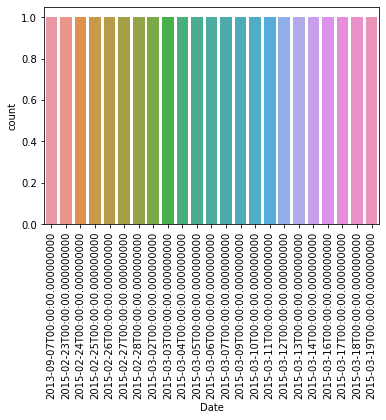

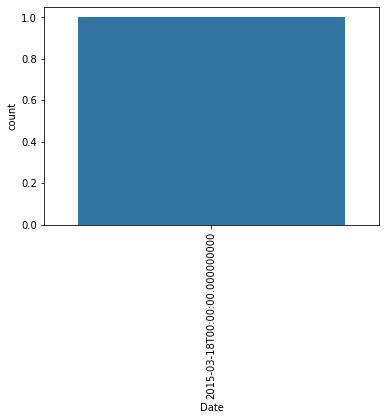

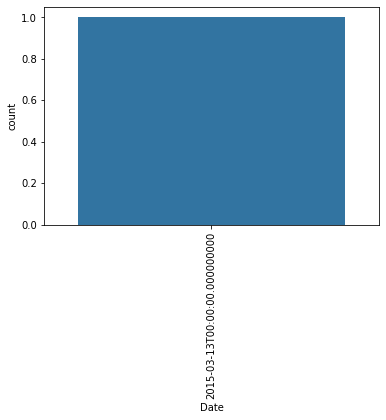

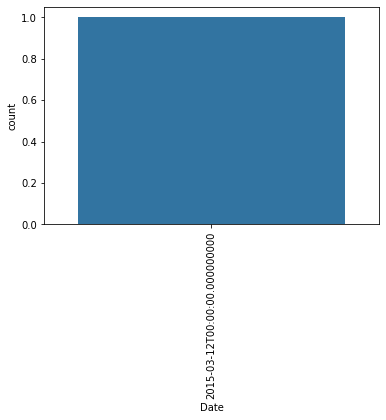

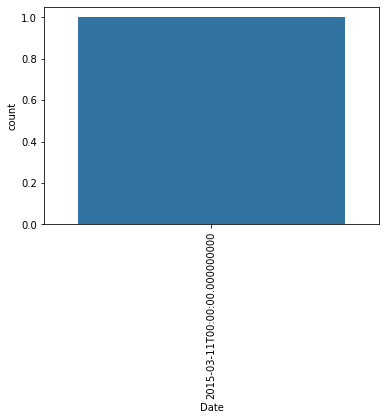

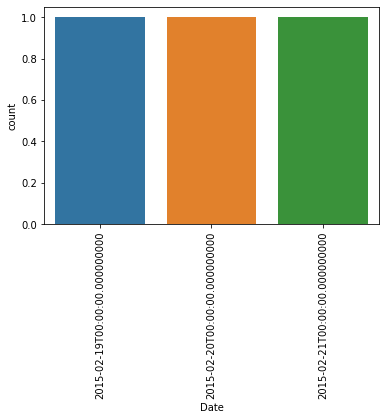

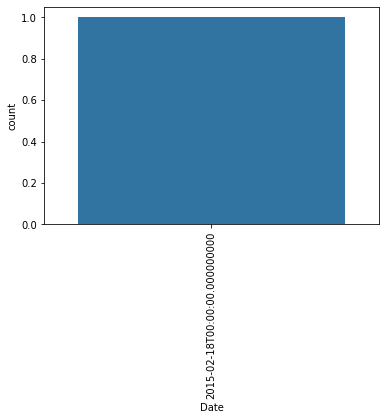

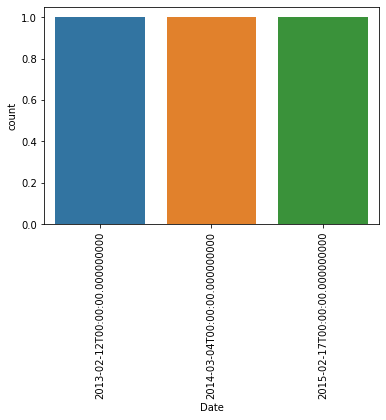

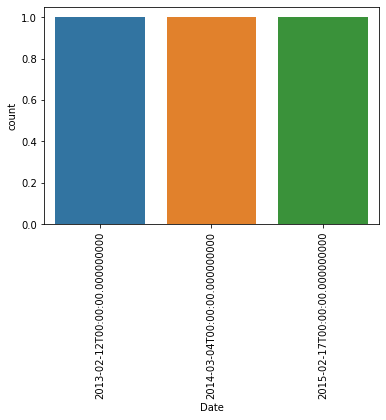

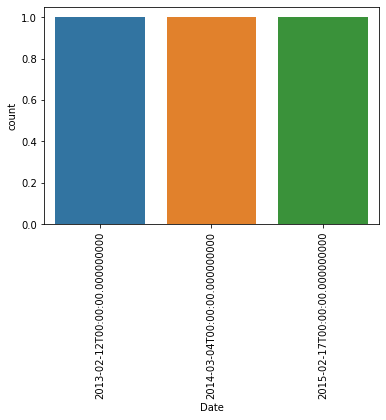

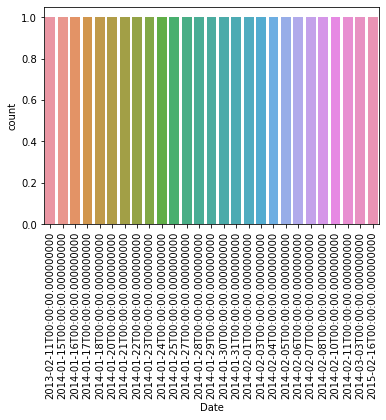

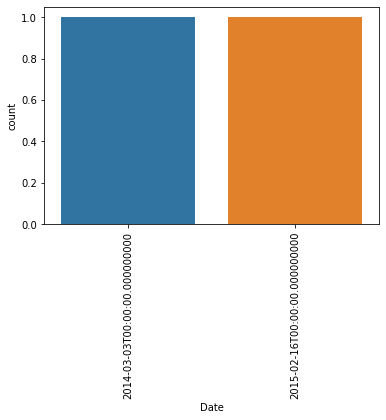

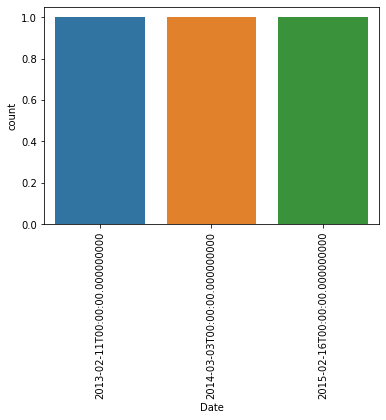

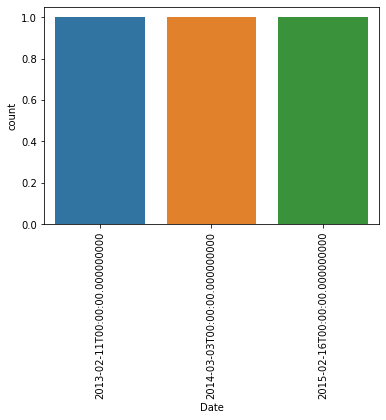

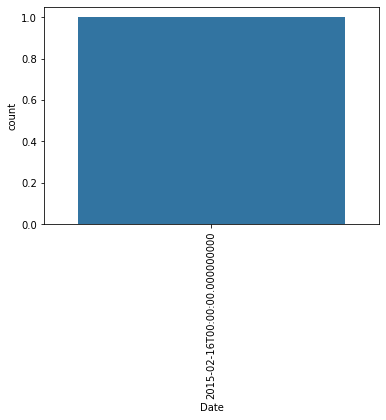

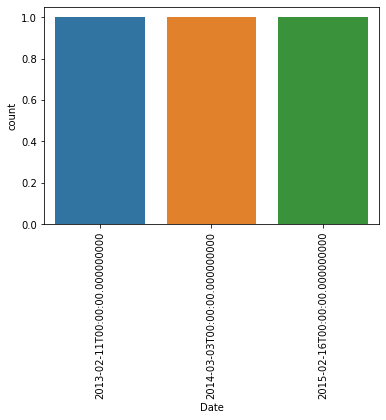

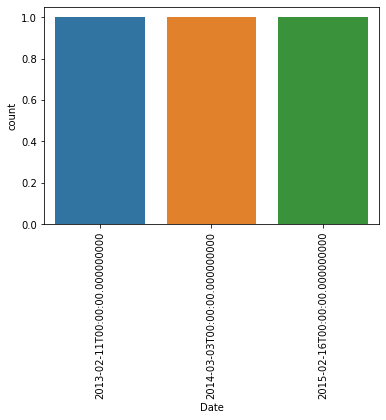

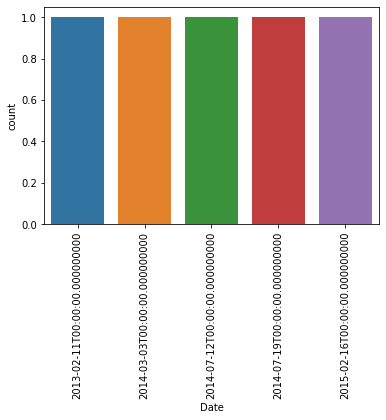

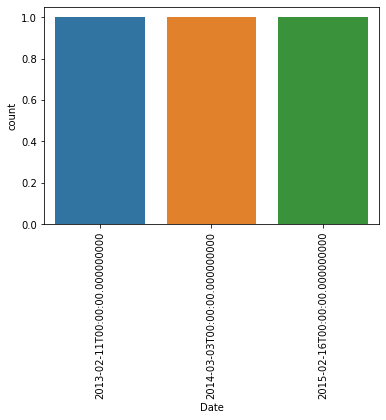

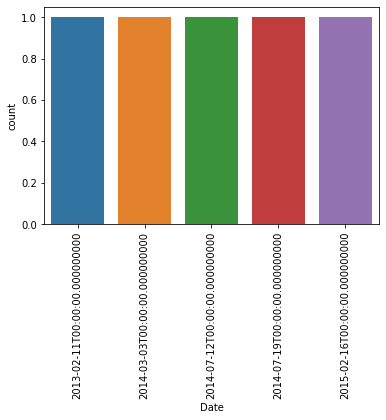

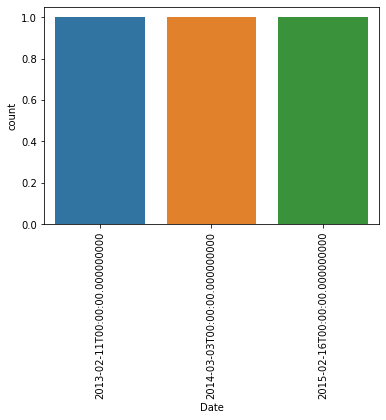

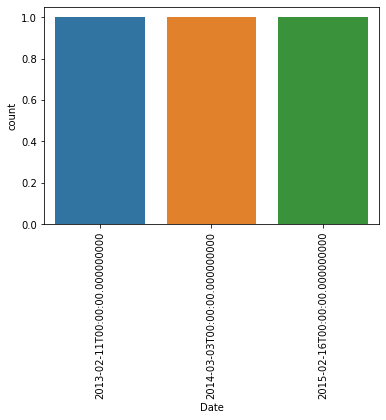

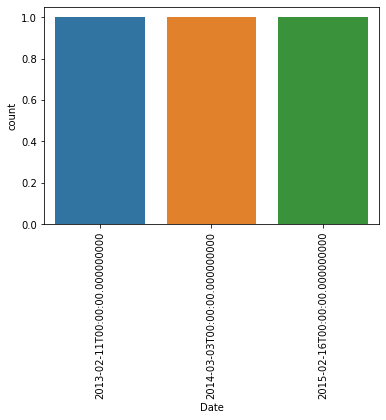

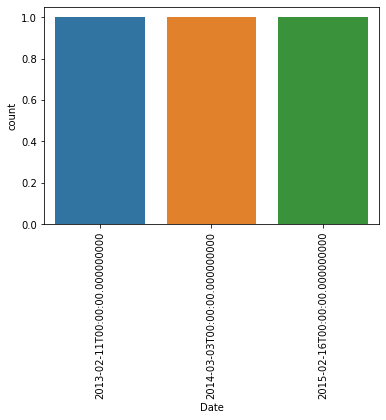

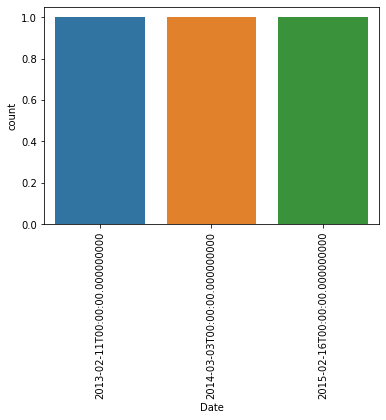

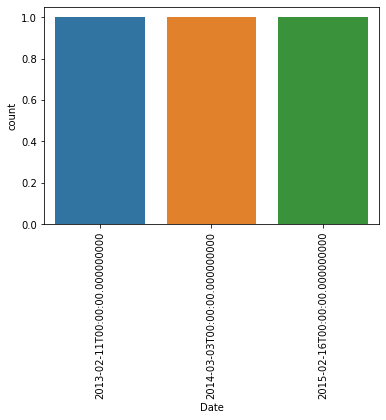

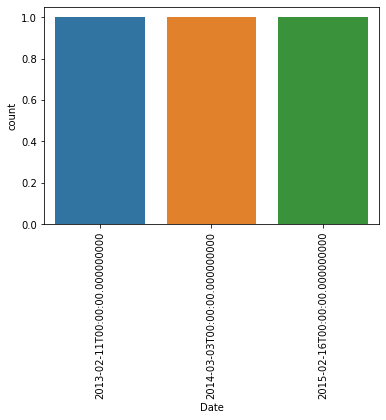

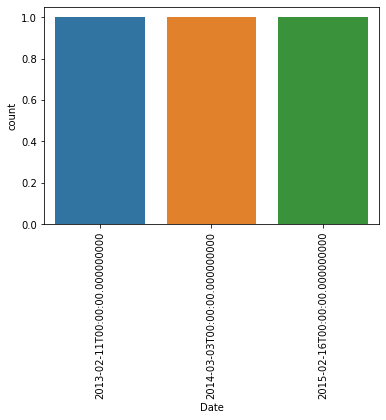

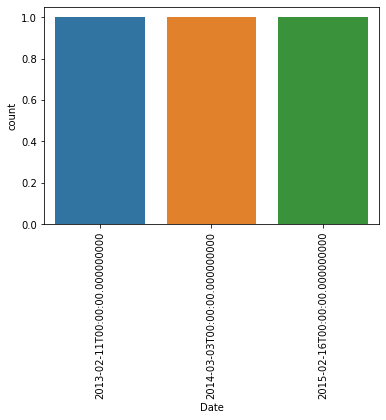

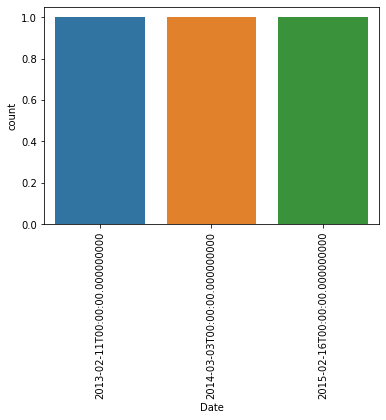

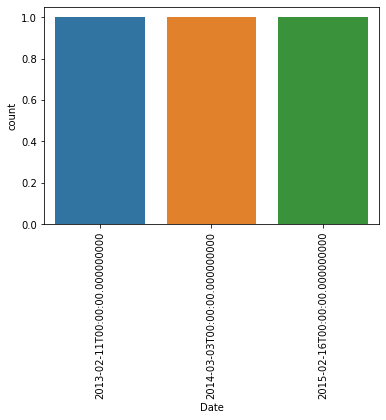

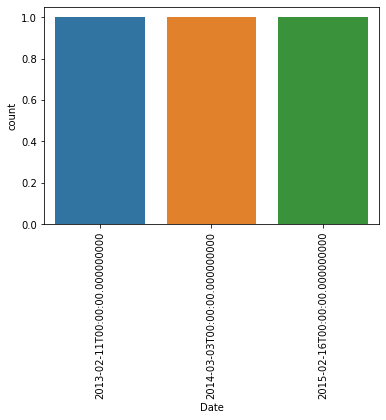

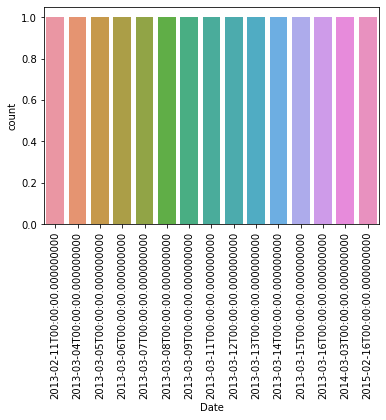

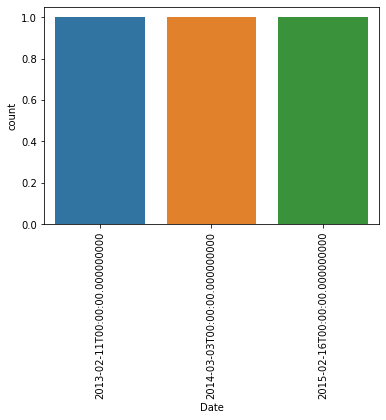

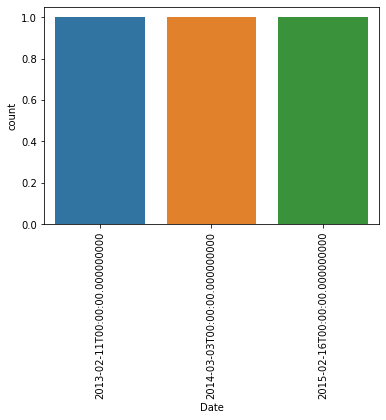

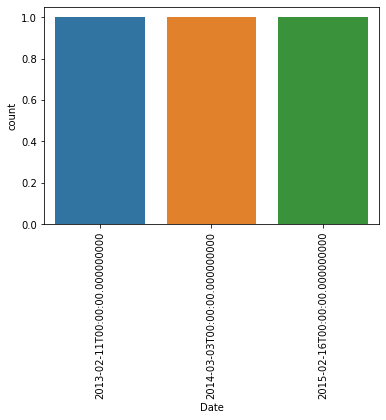

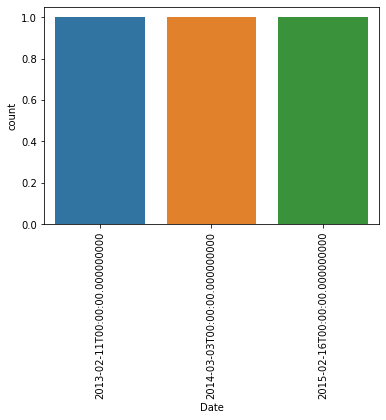

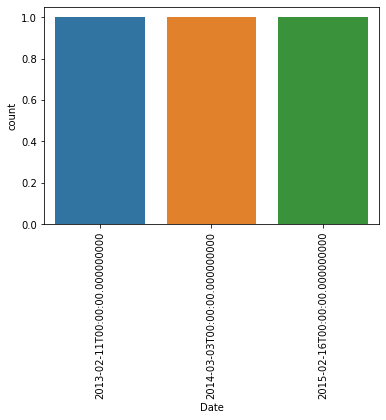

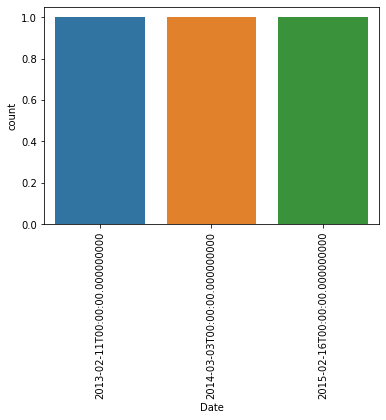

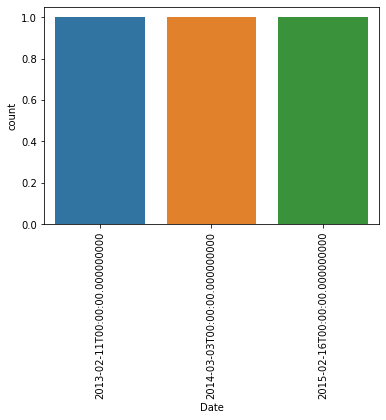

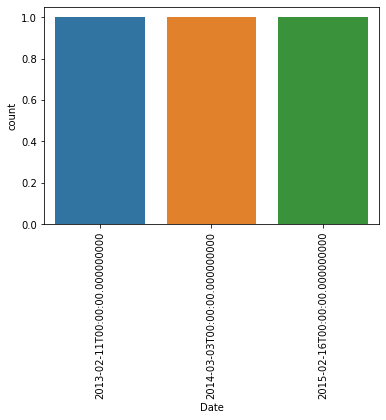

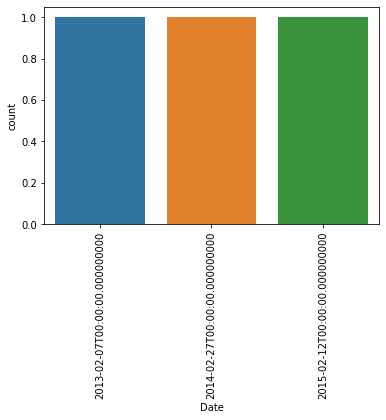

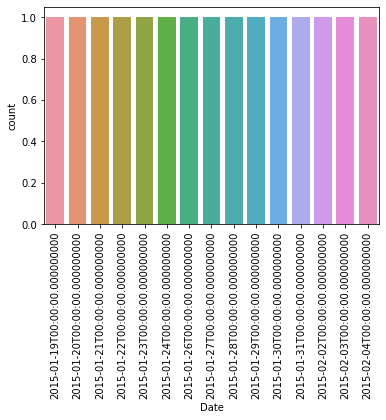

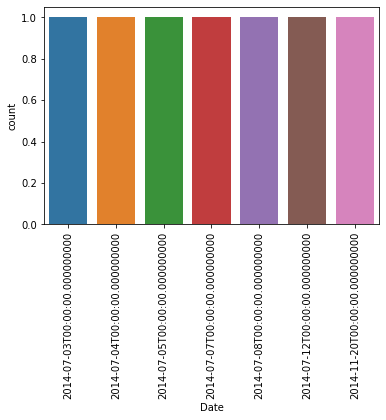

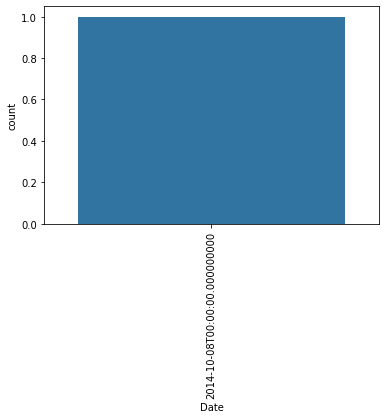

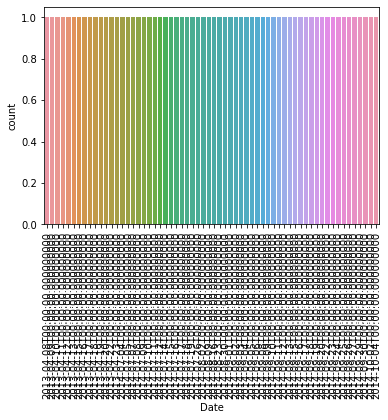

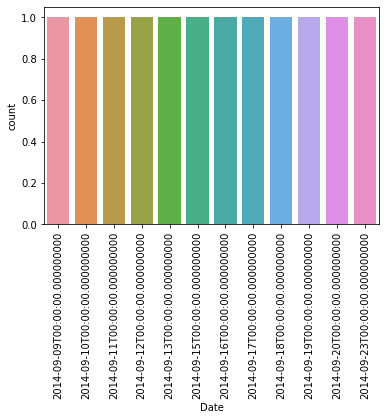

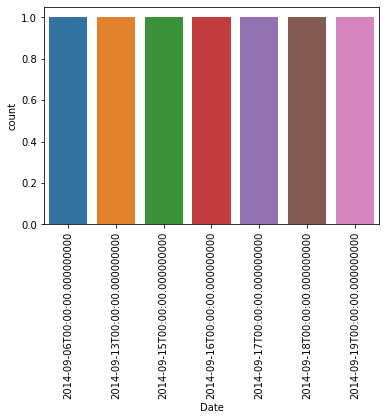

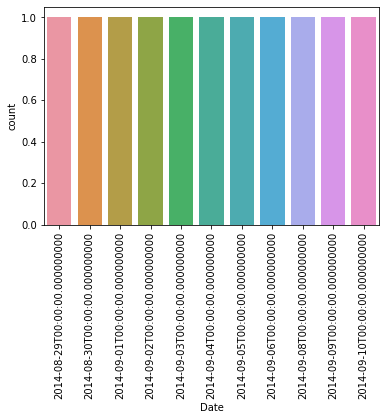

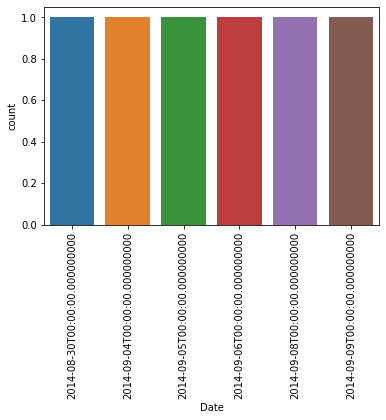

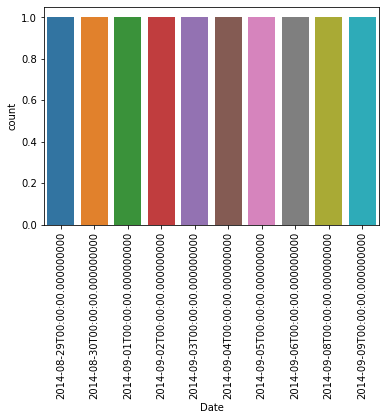

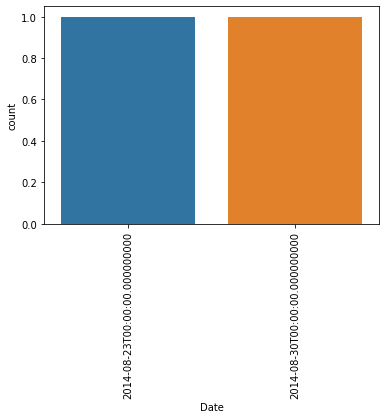

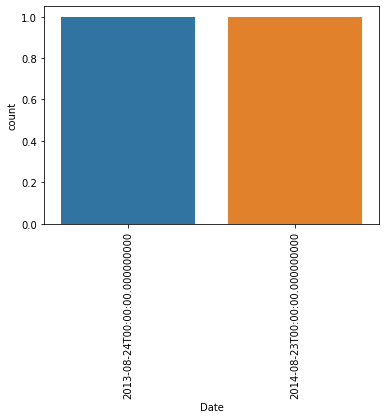

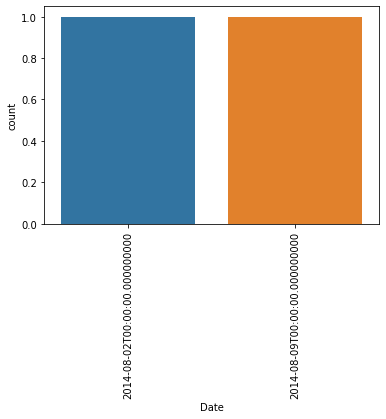

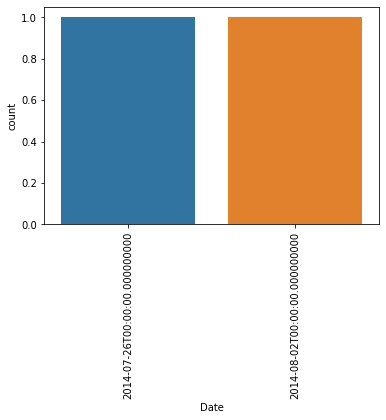

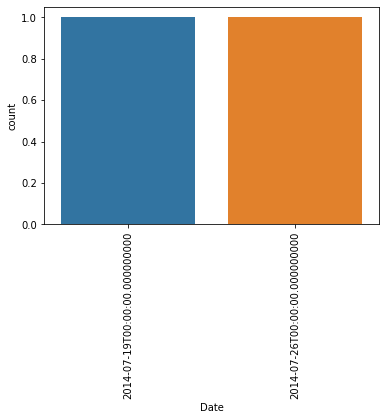

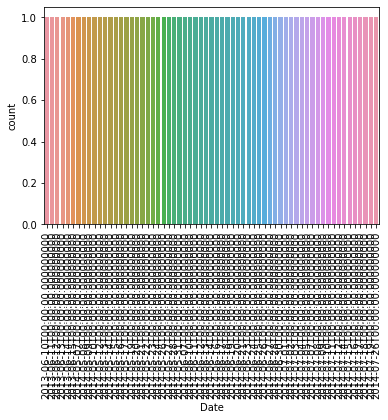

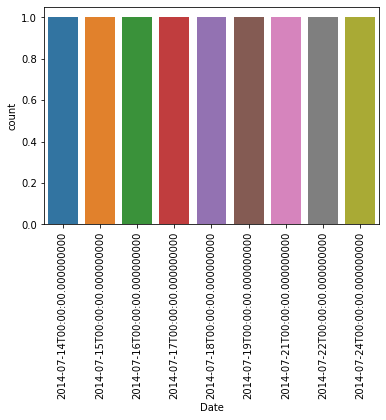

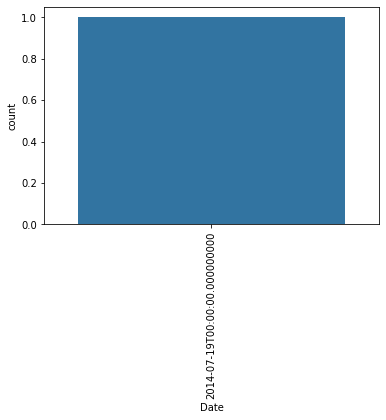

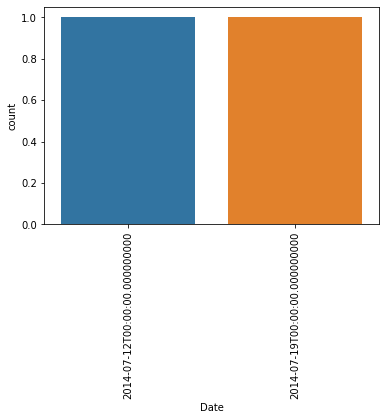

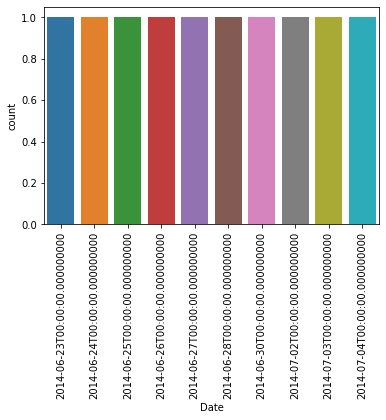

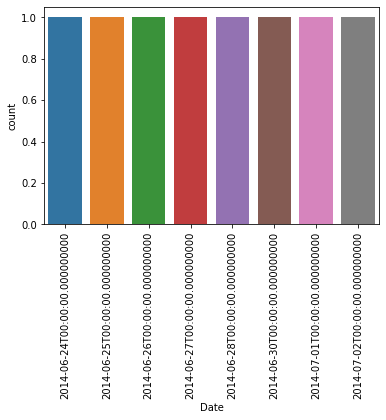

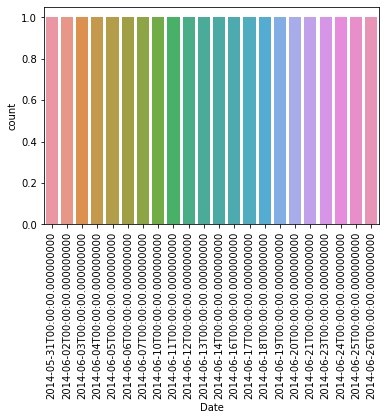

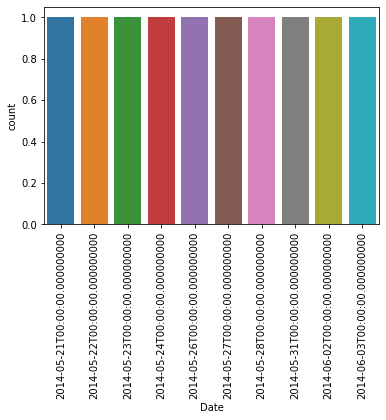

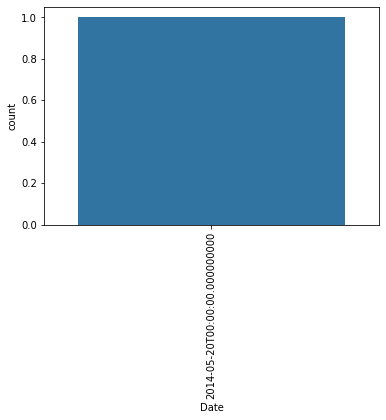

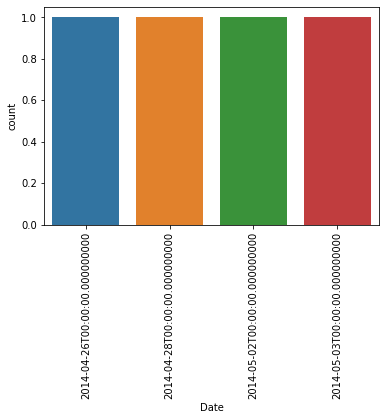

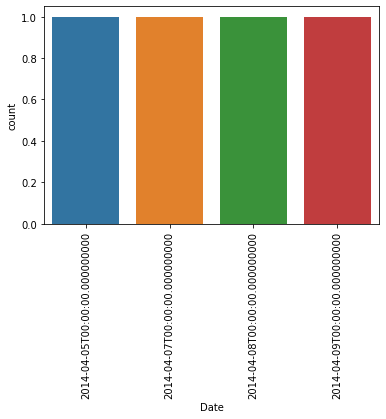

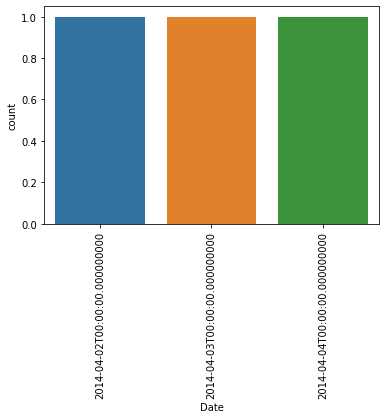

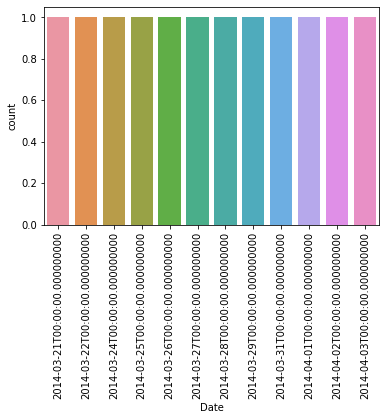

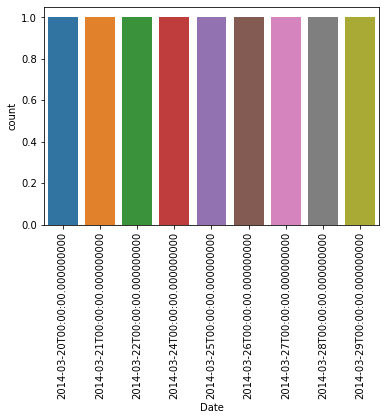

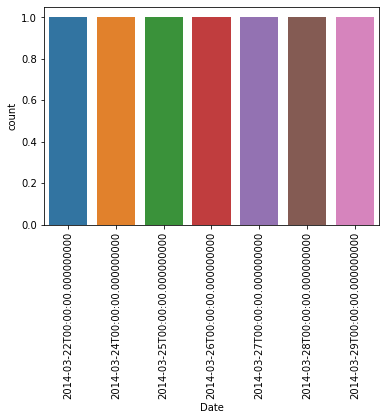

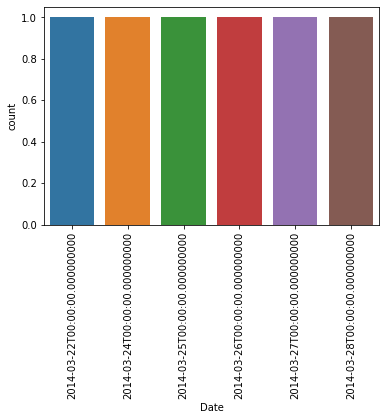

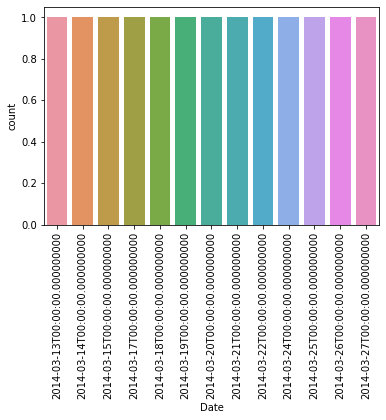

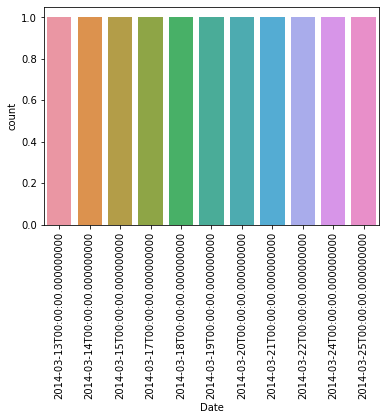

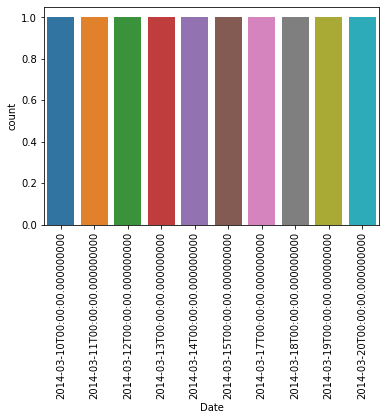

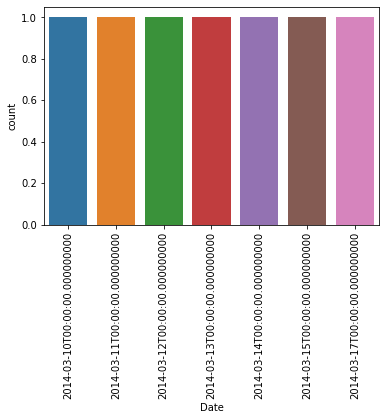

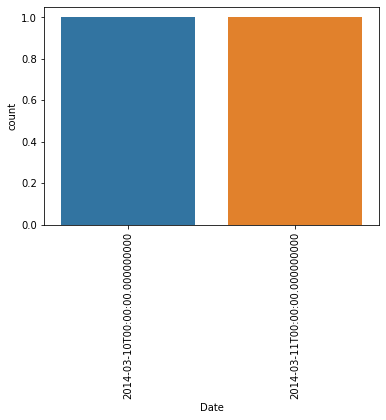

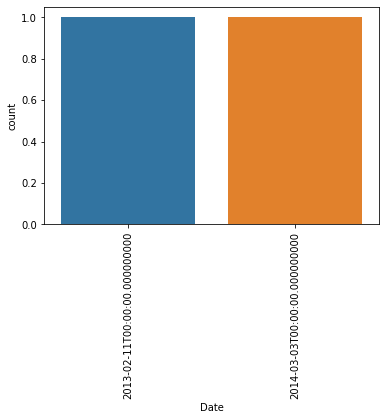

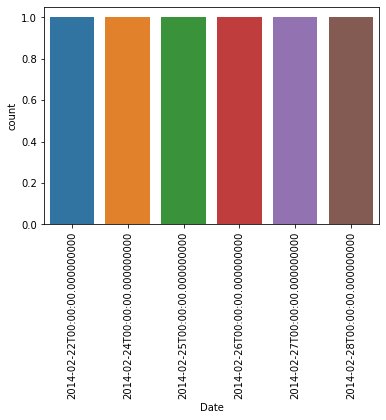

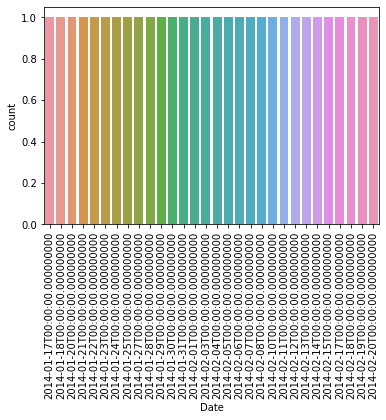

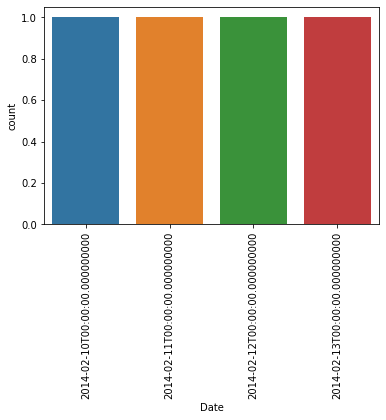

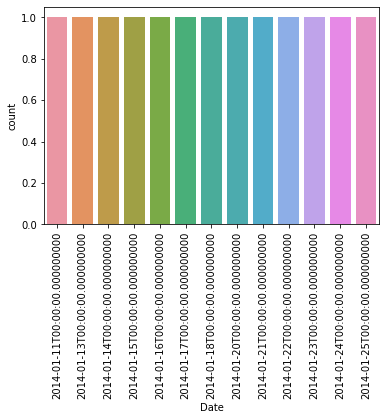

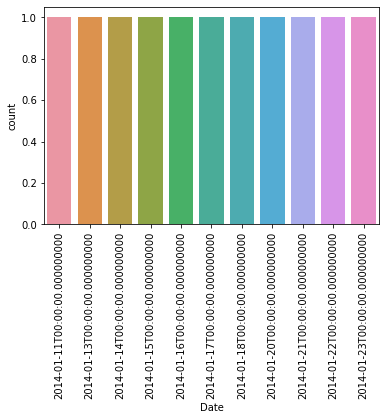

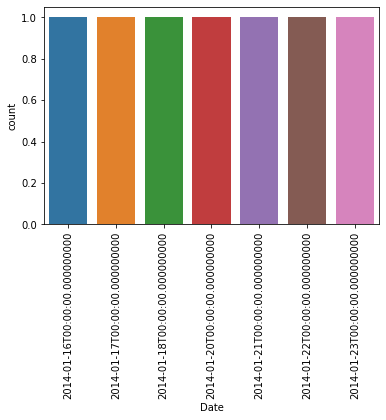

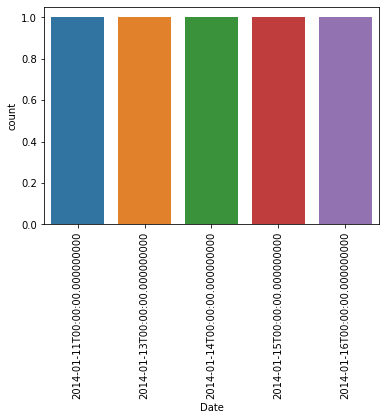

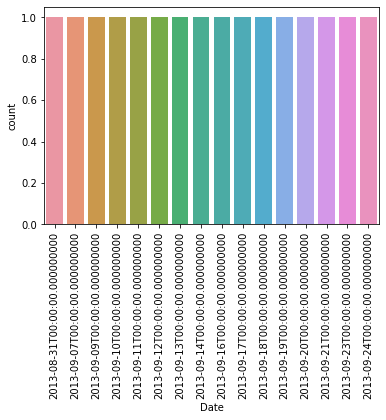

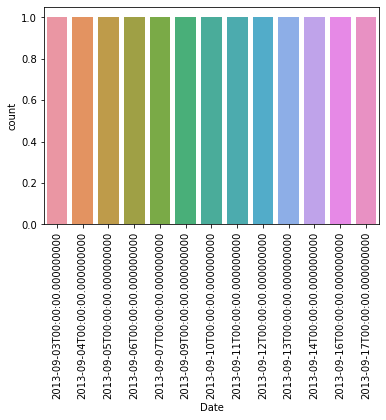

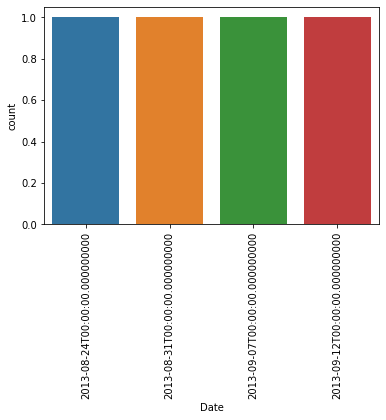

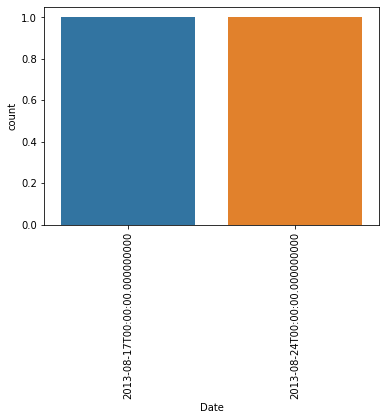

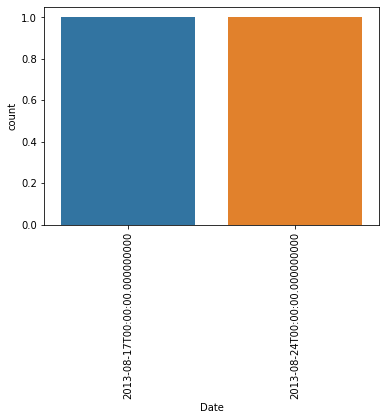

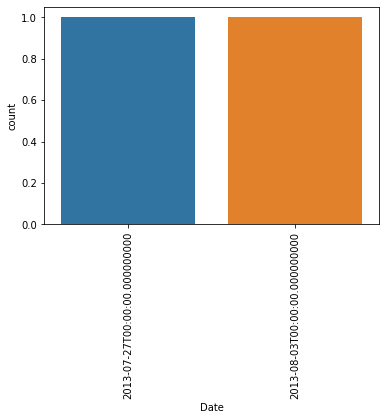

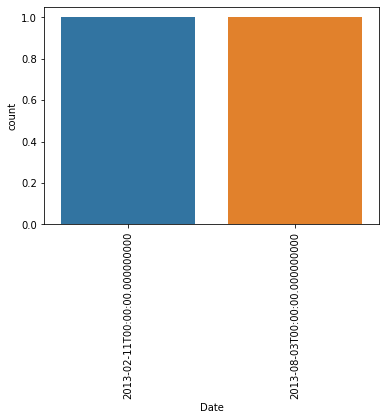

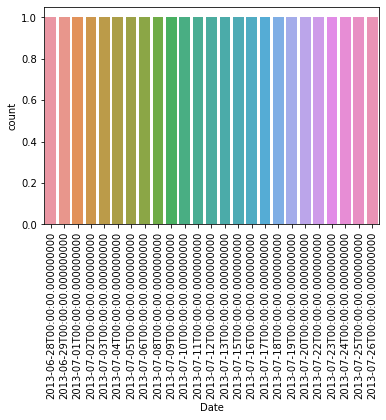

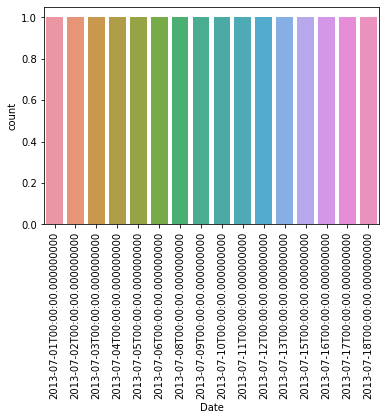

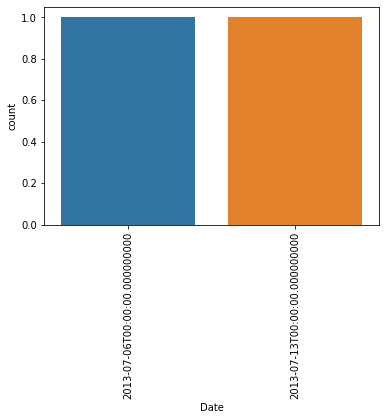

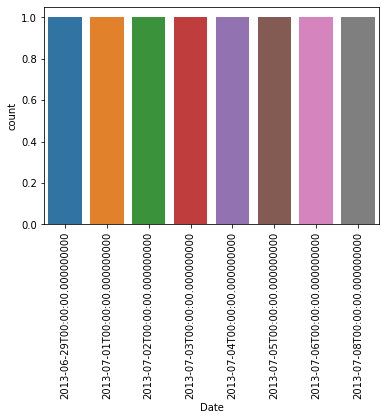

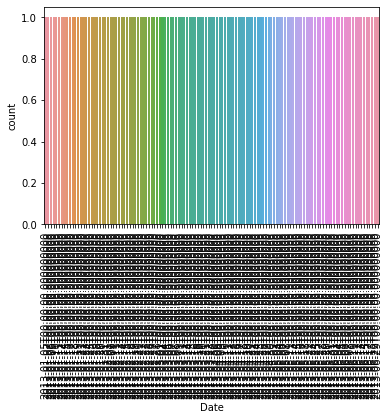

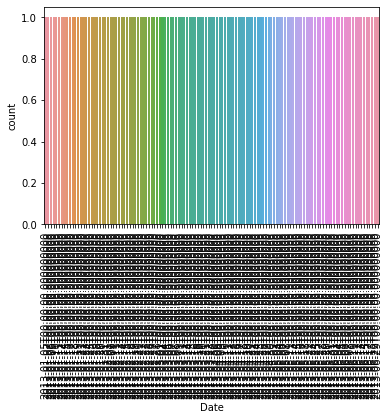

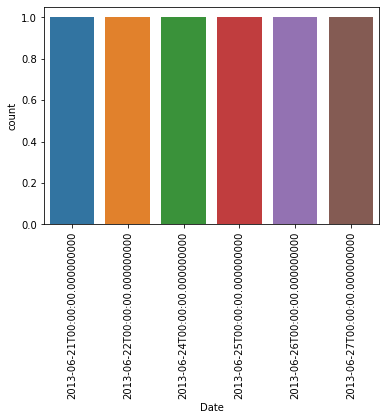

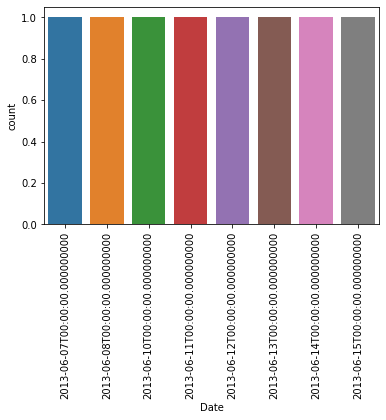

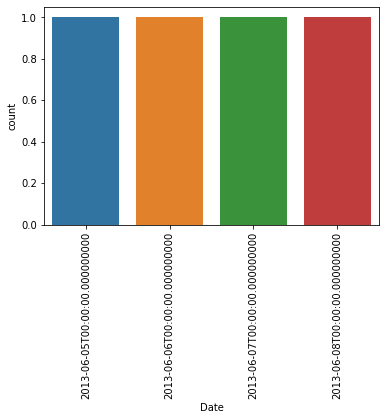

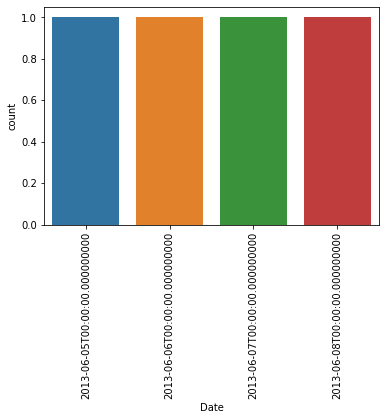

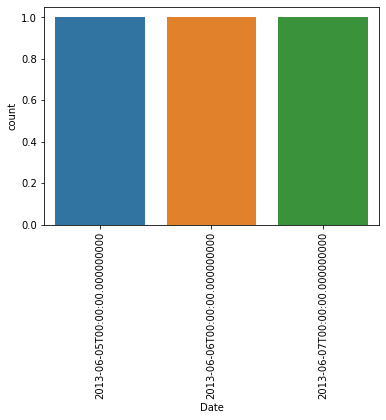

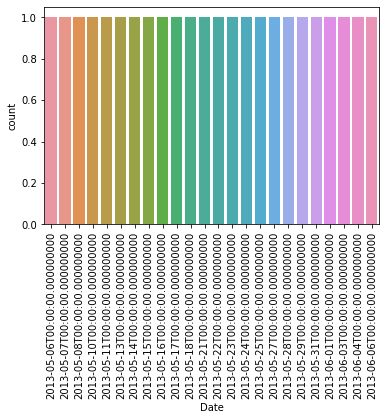

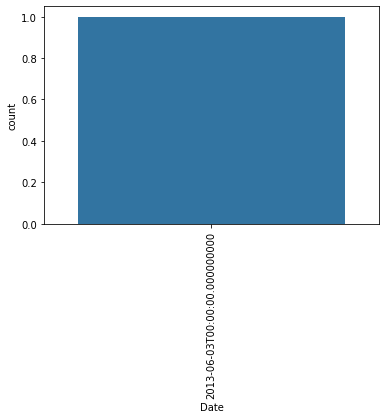

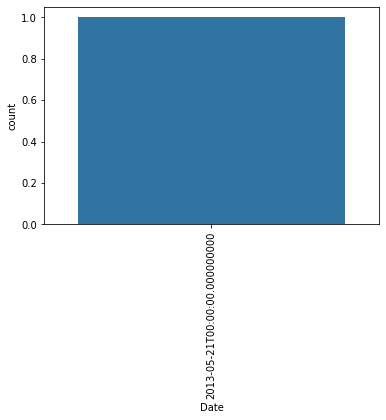

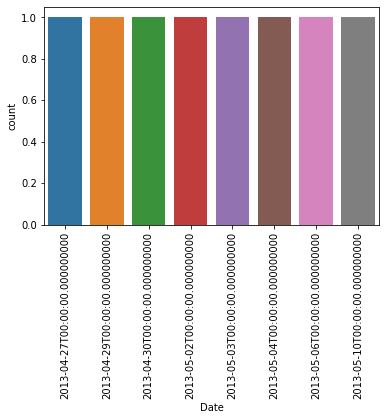

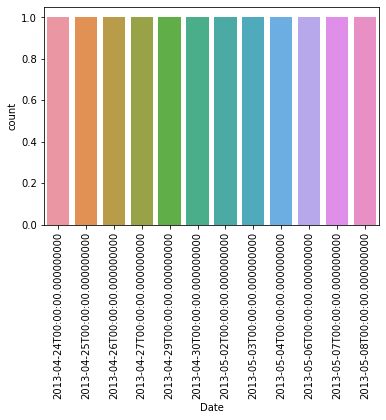

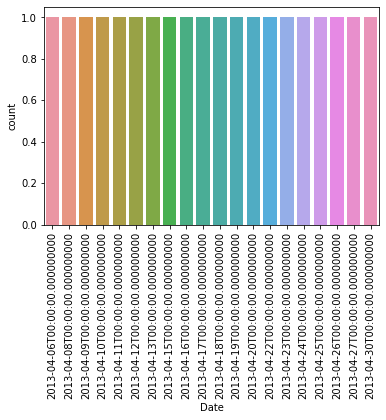

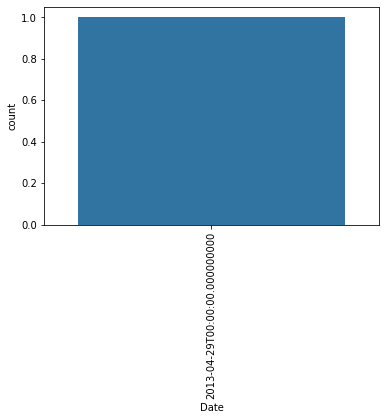

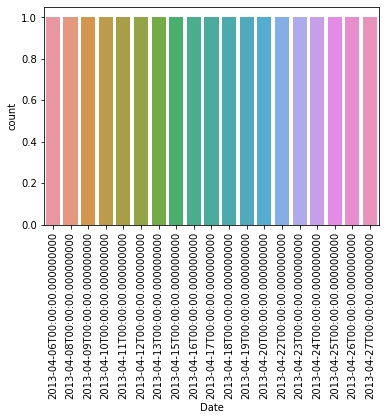

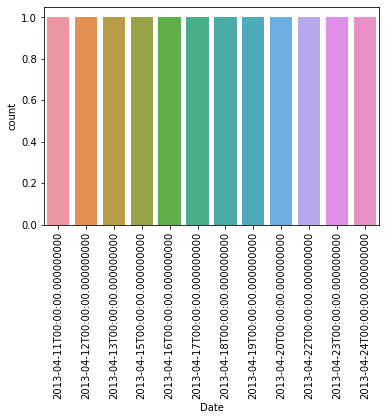

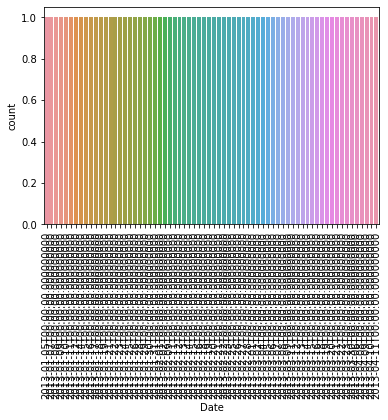

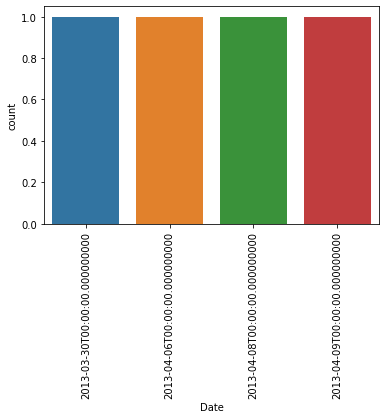

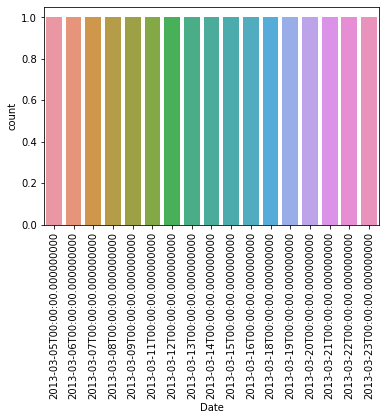

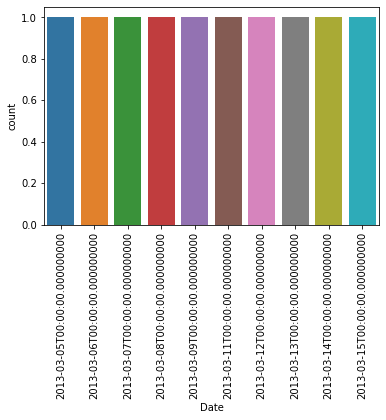

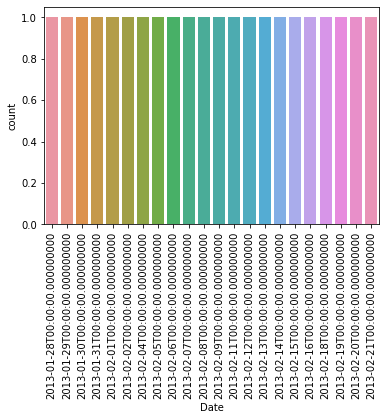

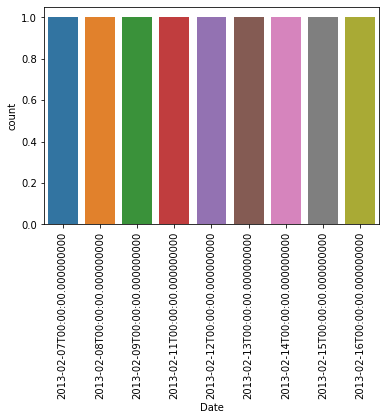

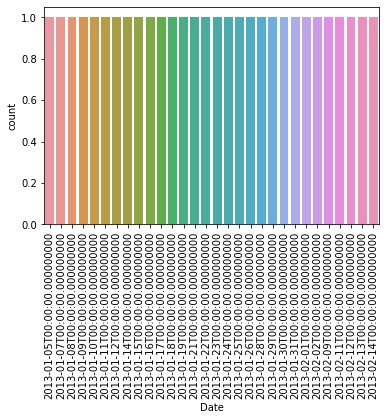

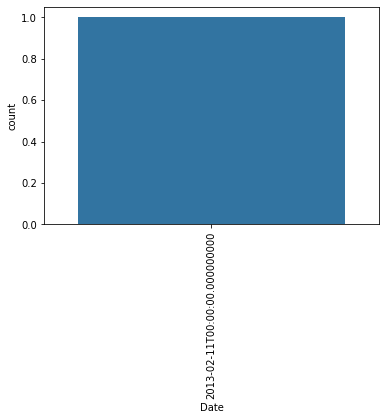

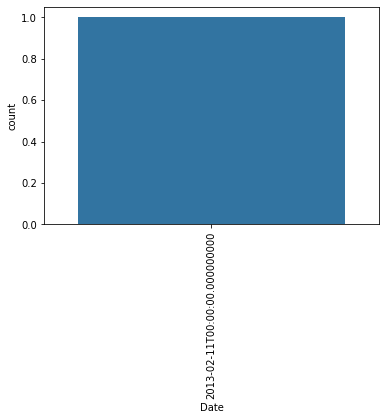

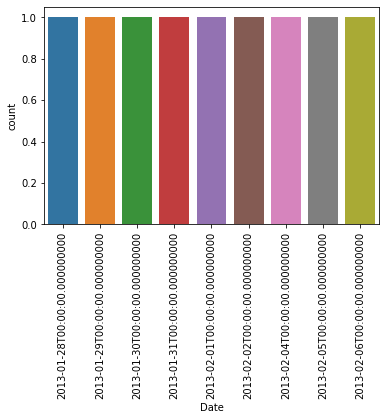

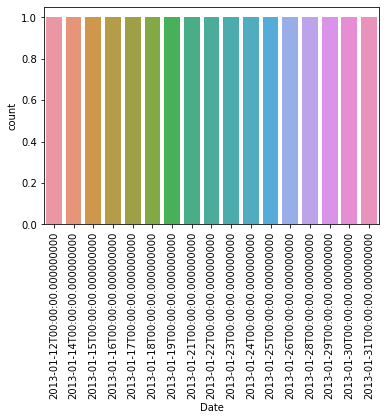

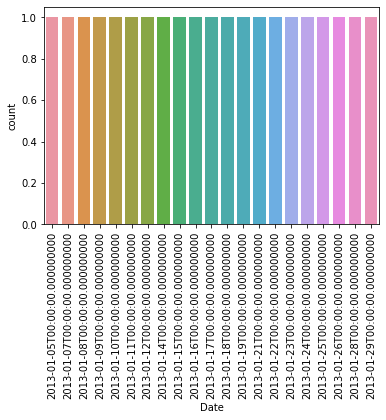

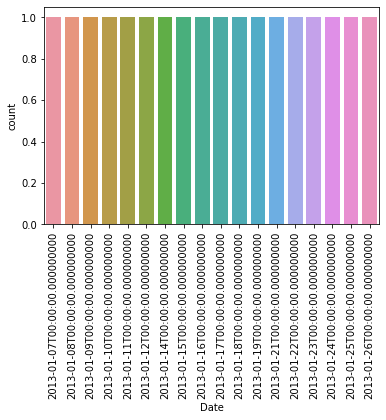

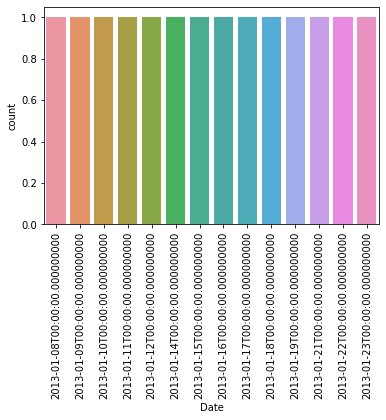

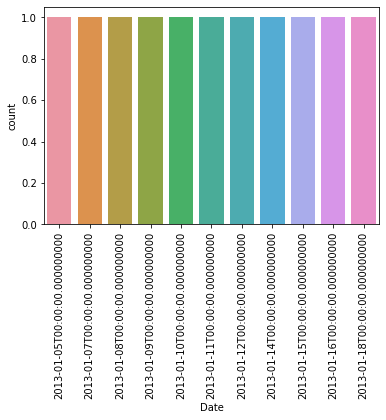

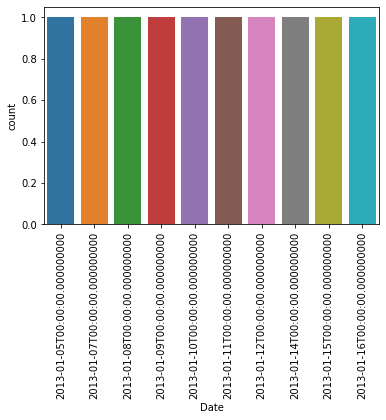

In [44]:
for store in modified_df_train['Store'].unique():
    df = modified_df_train[modified_df_train['Store'] == store]
    ax = sns.countplot(x='Date', data=df)
    # ax.set_title('Number of stores with no sales and no holidays during the working week depending on school holiday')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    plt.show()

Some of the closed stores on working days with no holidays and no sales are successive days (refurbishment) and some on single days

## Sales on sundays?

In [45]:
df_train_sales_sundays = df_train[(df_train['DayOfWeek'] == '7') & (df_train['Sales'] != 0)]

In [46]:
df_train_sales_sundays['Store'].unique()

array(['85', '122', '209', '259', '262', '274', '299', '310', '335',
       '353', '423', '433', '453', '494', '512', '524', '530', '562',
       '578', '676', '682', '732', '733', '769', '863', '867', '931',
       '948', '1045', '1081', '1097', '1099', '877'], dtype=object)

33 stores have sales on sundays

In [47]:
for store in df_train_sales_sundays['Store'].unique():
    df = df_train_sales_sundays[df_train_sales_sundays['Store'] == store]
    print('Store:', store)
    print(df['Date'].sort_values())

Store: 85
1010604   2013-01-06
1002799   2013-01-13
994994    2013-01-20
987189    2013-01-27
979384    2013-02-03
             ...    
36879     2015-06-28
29074     2015-07-05
21269     2015-07-12
13464     2015-07-19
5659      2015-07-26
Name: Date, Length: 134, dtype: datetime64[ns]
Store: 122
940396   2013-03-10
932591   2013-03-17
924786   2013-03-24
916981   2013-03-31
909176   2013-04-07
            ...    
36916    2015-06-28
29111    2015-07-05
21306    2015-07-12
13501    2015-07-19
5696     2015-07-26
Name: Date, Length: 90, dtype: datetime64[ns]
Store: 209
940483   2013-03-10
909263   2013-04-07
901458   2013-04-14
893653   2013-04-21
885848   2013-04-28
            ...    
37003    2015-06-28
29198    2015-07-05
21393    2015-07-12
13588    2015-07-19
5783     2015-07-26
Name: Date, Length: 87, dtype: datetime64[ns]
Store: 259
1010778   2013-01-06
1002973   2013-01-13
995168    2013-01-20
987363    2013-01-27
971753    2013-02-10
             ...    
37053     2015-06-28


Some stores open only once or twice a month on sunday and a lot of the stores open on every sunday. These are stores in train stations for example.

## Open stores with no sales

In [48]:
open_no_sales_df_train = df_train[(df_train['Open'] == '1') & (df_train['Sales'] == 0)]

In [49]:
open_no_sales_df_train.head()

Store DayOfWeek       Date  Sales  Customers Open Promo StateHoliday  \
86825    971         5 2015-05-15      0          0    1     0            0   
142278   674         4 2015-03-26      0          0    1     0            0   
196938   699         4 2015-02-05      0          0    1     1            0   
322053   708         3 2014-10-01      0          0    1     1            0   
330176   357         1 2014-09-22      0          0    1     0            0   

       SchoolHoliday  
86825              1  
142278             0  
196938             0  
322053             0  
330176             0

In [50]:
open_no_sales_df_train['Store'].unique()

array(['971', '674', '699', '708', '357', '227', '835', '548', '28',
       '102', '238', '303', '387', '882', '887', '925', '57', '1017',
       '1100', '661', '850', '986', '327', '25', '623', '983', '663',
       '391', '927', '1039', '665', '700', '681', '364', '589', '948',
       '353', '259', '339', '232', '762'], dtype=object)

41 stores have been open but did not make any sales

In [51]:
open_no_sales_df_train['Date'].value_counts().sort_index()

2013-01-17    1
2013-01-24    1
2013-01-30    1
2013-01-31    1
2013-02-07    1
2013-03-16    1
2013-04-25    1
2013-04-29    1
2013-05-07    1
2013-05-08    1
2013-05-10    1
2013-06-05    1
2013-06-28    1
2013-06-29    1
2013-07-09    1
2013-07-10    1
2013-08-08    1
2013-08-28    1
2013-09-02    1
2014-01-17    1
2014-01-18    1
2014-01-24    1
2014-01-25    1
2014-02-12    1
2014-02-13    1
2014-03-12    1
2014-03-18    1
2014-03-29    1
2014-04-04    1
2014-04-29    1
2014-04-30    1
2014-06-04    1
2014-06-05    1
2014-07-01    1
2014-07-03    1
2014-07-12    1
2014-07-23    2
2014-07-24    4
2014-09-02    1
2014-09-03    1
2014-09-04    1
2014-09-05    1
2014-09-10    1
2014-09-11    2
2014-09-22    1
2014-10-01    1
2015-02-05    1
2015-03-26    1
2015-05-15    1
Name: Date, dtype: int64

In [52]:
pd.crosstab(open_no_sales_df_train['Date'],open_no_sales_df_train['SchoolHoliday'], margins=True, margins_name="Total")

SchoolHoliday         0   1  Total
Date                              
2013-01-17 00:00:00   1   0      1
2013-01-24 00:00:00   1   0      1
2013-01-30 00:00:00   1   0      1
2013-01-31 00:00:00   1   0      1
2013-02-07 00:00:00   1   0      1
2013-03-16 00:00:00   1   0      1
2013-04-25 00:00:00   1   0      1
2013-04-29 00:00:00   1   0      1
2013-05-07 00:00:00   1   0      1
2013-05-08 00:00:00   1   0      1
2013-05-10 00:00:00   1   0      1
2013-06-05 00:00:00   1   0      1
2013-06-28 00:00:00   1   0      1
2013-06-29 00:00:00   1   0      1
2013-07-09 00:00:00   1   0      1
2013-07-10 00:00:00   1   0      1
2013-08-08 00:00:00   0   1      1
2013-08-28 00:00:00   0   1      1
2013-09-02 00:00:00   0   1      1
2014-01-17 00:00:00   1   0      1
2014-01-18 00:00:00   1   0      1
2014-01-24 00:00:00   1   0      1
2014-01-25 00:00:00   1   0      1
2014-02-12 00:00:00   1   0      1
2014-02-13 00:00:00   1   0      1
2014-03-12 00:00:00   1   0      1
2014-03-18 00:00:00   1   0      1
2014-03-29 00:00:00   1   0      1
2014-04-04 00:00:00   1   0      1
2014-04-29 00:00:00   1   0      1
2014-04-30 00:00:00   1   0      1
2014-06-04 00:00:00   1   0      1
2014-06-05 00:00:00   1   0      1
2014-07-01 00:00:00   1   0      1
2014-07-03 00:00:00   1   0      1
2014-07-12 00:00:00   1   0      1
2014-07-23 00:00:00   1   1      2
2014-07-24 00:00:00   0   4      4
2014-09-02 00:00:00   0   1      1
2014-09-03 00:00:00   0   1      1
2014-09-04 00:00:00   1   0      1
2014-09-05 00:00:00   0   1      1
2014-09-10 00:00:00   1   0      1
2014-09-11 00:00:00   2   0      2
2014-09-22 00:00:00   1   0      1
2014-10-01 00:00:00   1   0      1
2015-02-05 00:00:00   1   0      1
2015-03-26 00:00:00   1   0      1
2015-05-15 00:00:00   0   1      1
Total                42  12     54

In [53]:
pd.crosstab(open_no_sales_df_train['Date'],open_no_sales_df_train['Customers'], margins=True, margins_name="Total")

Customers             0  3  5  Total
Date                                
2013-01-17 00:00:00   1  0  0      1
2013-01-24 00:00:00   1  0  0      1
2013-01-30 00:00:00   1  0  0      1
2013-01-31 00:00:00   1  0  0      1
2013-02-07 00:00:00   1  0  0      1
2013-03-16 00:00:00   1  0  0      1
2013-04-25 00:00:00   0  0  1      1
2013-04-29 00:00:00   1  0  0      1
2013-05-07 00:00:00   1  0  0      1
2013-05-08 00:00:00   1  0  0      1
2013-05-10 00:00:00   1  0  0      1
2013-06-05 00:00:00   1  0  0      1
2013-06-28 00:00:00   1  0  0      1
2013-06-29 00:00:00   1  0  0      1
2013-07-09 00:00:00   1  0  0      1
2013-07-10 00:00:00   1  0  0      1
2013-08-08 00:00:00   1  0  0      1
2013-08-28 00:00:00   1  0  0      1
2013-09-02 00:00:00   1  0  0      1
2014-01-17 00:00:00   1  0  0      1
2014-01-18 00:00:00   1  0  0      1
2014-01-24 00:00:00   1  0  0      1
2014-01-25 00:00:00   1  0  0      1
2014-02-12 00:00:00   1  0  0      1
2014-02-13 00:00:00   1  0  0      1
2014-03-12 00:00:00   1  0  0      1
2014-03-18 00:00:00   1  0  0      1
2014-03-29 00:00:00   1  0  0      1
2014-04-04 00:00:00   1  0  0      1
2014-04-29 00:00:00   0  1  0      1
2014-04-30 00:00:00   1  0  0      1
2014-06-04 00:00:00   1  0  0      1
2014-06-05 00:00:00   1  0  0      1
2014-07-01 00:00:00   1  0  0      1
2014-07-03 00:00:00   1  0  0      1
2014-07-12 00:00:00   1  0  0      1
2014-07-23 00:00:00   2  0  0      2
2014-07-24 00:00:00   4  0  0      4
2014-09-02 00:00:00   1  0  0      1
2014-09-03 00:00:00   1  0  0      1
2014-09-04 00:00:00   1  0  0      1
2014-09-05 00:00:00   1  0  0      1
2014-09-10 00:00:00   1  0  0      1
2014-09-11 00:00:00   2  0  0      2
2014-09-22 00:00:00   1  0  0      1
2014-10-01 00:00:00   1  0  0      1
2015-02-05 00:00:00   1  0  0      1
2015-03-26 00:00:00   1  0  0      1
2015-05-15 00:00:00   1  0  0      1
Total                52  1  1     54

In [54]:
pd.crosstab(open_no_sales_df_train['Date'],open_no_sales_df_train['Store'], margins=True, margins_name="Total")

Store                1017  102  1039  1100  227  232  238  25  259  28  ...  \
Date                                                                    ...   
2013-01-17 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2013-01-24 00:00:00     0    0     0     0    0    1    0   0    0   0  ...   
2013-01-30 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2013-01-31 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2013-02-07 00:00:00     0    0     0     0    0    0    0   0    1   0  ...   
2013-03-16 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2013-04-25 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2013-04-29 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2013-05-07 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2013-05-08 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2013-05-10 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2013-06-05 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2013-06-28 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2013-06-29 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2013-07-09 00:00:00     0    0     1     0    0    0    0   0    0   0  ...   
2013-07-10 00:00:00     0    0     1     0    0    0    0   0    0   0  ...   
2013-08-08 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2013-08-28 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2013-09-02 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2014-01-17 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2014-01-18 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2014-01-24 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2014-01-25 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2014-02-12 00:00:00     0    0     0     0    0    0    0   1    0   0  ...   
2014-02-13 00:00:00     0    0     0     0    0    0    0   1    0   0  ...   
2014-03-12 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2014-03-18 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2014-03-29 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2014-04-04 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2014-04-29 00:00:00     0    0     0     1    0    0    0   0    0   0  ...   
2014-04-30 00:00:00     0    0     0     1    0    0    0   0    0   0  ...   
2014-06-04 00:00:00     1    0     0     0    0    0    0   0    0   0  ...   
2014-06-05 00:00:00     1    0     0     0    0    0    0   0    0   0  ...   
2014-07-01 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2014-07-03 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2014-07-12 00:00:00     0    1     0     0    0    0    0   0    0   0  ...   
2014-07-23 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2014-07-24 00:00:00     0    1     0     0    0    0    1   0    0   0  ...   
2014-09-02 00:00:00     0    0     0     0    0    0    0   0    0   1  ...   
2014-09-03 00:00:00     0    0     0     0    0    0    0   0    0   1  ...   
2014-09-04 00:00:00     0    0     0     0    0    0    0   0    0   1  ...   
2014-09-05 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2014-09-10 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2014-09-11 00:00:00     0    0     0     0    1    0    0   0    0   0  ...   
2014-09-22 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2014-10-01 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2015-02-05 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2015-03-26 00:00:00     0    0     0     0    0    0    0   0    0   0  ...   
2015-05-15 00:00:00     0    0     0     0    0   

Open stores with no sales in some cases on successive days

Does this depend on StoreType and Assortment?

In [56]:
df_train_store_combined.shape # join succeeded

(1017209, 18)

In [57]:
df_train_store_combined_no_sales_closed = df_train_store_combined[(df_train_store_combined['Open'] == '1') & (df_train_store_combined['Sales'] == 0)]

In [58]:
df_train_store_combined_no_sales_closed

Store DayOfWeek       Date  Sales  Customers Open Promo StateHoliday  \
22589      25         4 2014-02-13      0          0    1     0            0   
22590      25         3 2014-02-12      0          0    1     0            0   
25212      28         4 2014-09-04      0          0    1     1            0   
25213      28         3 2014-09-03      0          0    1     1            0   
25214      28         2 2014-09-02      0          0    1     1            0   
51491      57         2 2014-07-01      0          0    1     1            0   
92570     102         4 2014-07-24      0          0    1     0            0   
92582     102         6 2014-07-12      0          0    1     0            0   
205303    227         4 2014-09-11      0          0    1     0            0   
210424    232         4 2013-01-24      0          0    1     1            0   
215530    238         4 2014-07-24      0          0    1     0            0   
235476    259         4 2013-02-07      0          0    1     1            0   
274736    303         4 2014-07-24      0          0    1     0            0   
297110    327         3 2014-03-12      0          0    1     0            0   
308819    339         4 2013-01-31      0          0    1     0            0   
308820    339         3 2013-01-30      0          0    1     0            0   
321411    353         6 2013-03-16      0          0    1     0            0   
324624    357         1 2014-09-22      0          0    1     0            0   
331720    364         3 2013-05-08      0          0    1     0            0   
331721    364         2 2013-05-07      0          0    1     0            0   
352576    387         4 2014-07-24      0          0    1     0            0   
356674    391         3 2013-08-28      0          0    1     1            0   
499043    548         5 2014-09-05      0          0    1     1            0   
537239    589         1 2013-04-29      0          0    1     1            0   
567892    623         6 2014-01-25      0          0    1     0            0   
567893    623         5 2014-01-24      0          0    1     1            0   
601963    661         5 2014-04-04      0          0    1     1            0   
604061    663         1 2013-09-02      0          0    1     0            0   
606010    665         6 2013-06-29      0          0    1     0            0   
606011    665         5 2013-06-28      0          0    1     0            0   
613301    674         4 2015-03-26      0          0    1     0            0   
620396    681         5 2013-05-10      0          0    1     0            0   
636348    699         4 2015-02-05      0          0    1     1            0   
637900    700         3 2013-06-05      0          0    1     1            0   
644401    708         3 2014-10-01      0          0    1     1            0   
694235    762         4 2013-01-17      0          0    1     0            0   
760375    835         4 2014-09-11      0          0    1     0            0   
760376    835         3 2014-09-10      0          0    1     0            0   
774487    850         6 2014-03-29      0          0    1     0            0   
803779    882         3 2014-07-23      0          0    1     0            0   
808305    887         3 2014-07-23      0          0    1     0            0   
842281    925         4 2014-07-03      0          0    1     1            0   
844494    927         4 2013-08-08      0          0    1     0            0   
864013    948         4 2013-04-25      0          5    1     1            0   
884745    971         5 2015-05-15      0          0    1     0            0   
896163    983         6 2014-01-18      0          0    1     0            0   
896164    983         5 2014-01-17      0          0    1     0            0   
898930    986         2 2014-03-18      0          0    1     1            0   
927132   1017         4 2014-06-05      0          0    1     1            0   
927133  

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

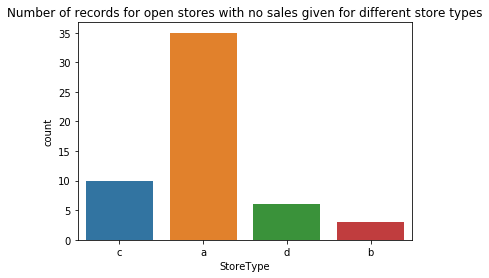

In [59]:
ax = sns.countplot(x='StoreType', data=df_train_store_combined_no_sales_closed)
ax.set_title('Number of records for open stores with no sales given for different store types')
plt.plot

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

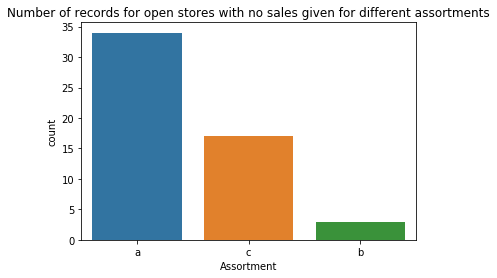

In [60]:
ax = sns.countplot(x='Assortment', data=df_train_store_combined_no_sales_closed)
ax.set_title('Number of records for open stores with no sales given for different assortments')
plt.plot

Most of the store types when store is closed and no sales is from store type a and most of the data belongs to assortment a

## Further investigation of target column 

In [9]:
df_train_store_combined['Year'] = df_train_store_combined['Date'].dt.year.astype('object')
df_train_store_combined['Month'] = df_train_store_combined['Date'].dt.month.astype('object')
df_train_store_combined['Day'] = df_train_store_combined['Date'].dt.day.astype('object')

In [64]:
df_train_store_combined[['Year', 'Month', 'Day']].describe()

Year    Month      Day
count   1017209  1017209  1017209
unique        3       12       31
top        2013        5       16
freq     406974   103695    33485

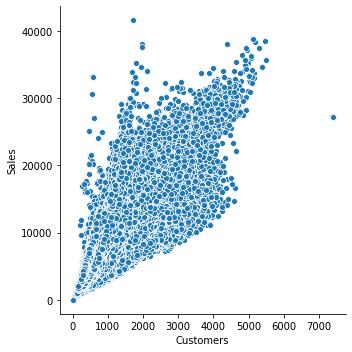

In [65]:
sns.relplot(x="Customers", y="Sales", data=df_train_store_combined)


looks like a positive correlation between customers and sales

When do we have the highest number of customers?

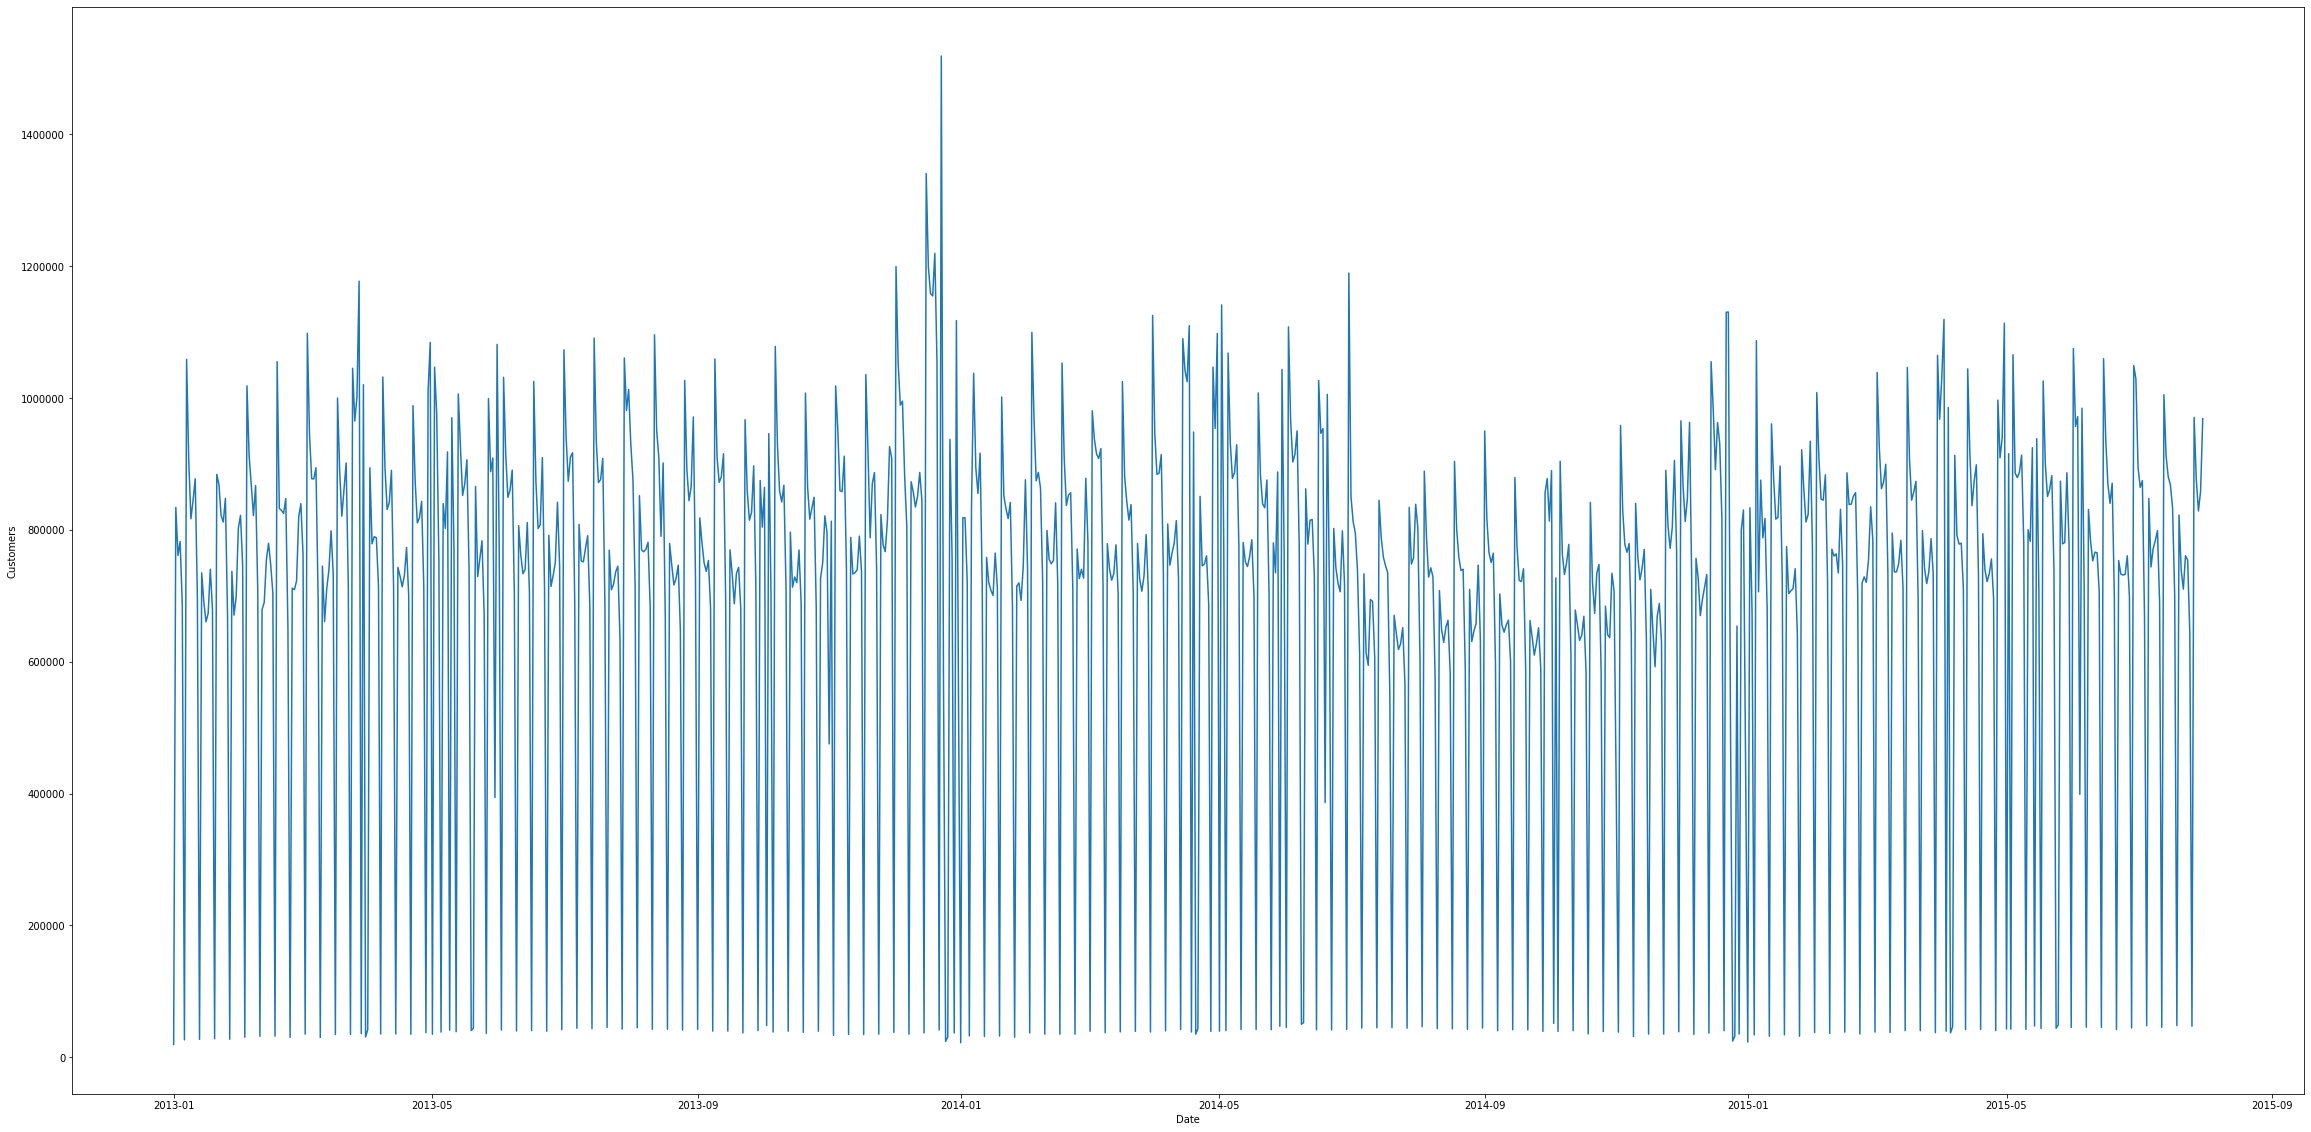

In [35]:
plt.figure(figsize=(40,20))
sns.lineplot(x='Date',y='Customers',data=df_train_store_combined.groupby('Date')['Customers'].agg('sum').reset_index())
plt.show()

The highest number of customers is in December 2013. The strage thing is that the average sales increase (see below) but the sum of customers decreases over the years. This must mean that the average sales per customers must increase over the years.

In [84]:
df_avg_sales_per_cust_year_month = df_train_store_combined.groupby(['Year','Month'])['Sales'].agg('sum').reset_index().merge(df_train_store_combined.groupby(['Year','Month'])['Customers'].agg('sum').reset_index(),on=['Year','Month'])

In [85]:
df_avg_sales_per_cust_year_month['Avg_sales_per_customer_month'] = df_avg_sales_per_cust_year_month['Sales'] / df_avg_sales_per_cust_year_month['Customers']
df_avg_sales_per_cust_year_month['Month'] = df_avg_sales_per_cust_year_month['Month'].astype('str')
df_avg_sales_per_cust_year_month['Year'] = df_avg_sales_per_cust_year_month['Year'].astype('str')
df_avg_sales_per_cust_year_month['Year-Month'] = pd.to_datetime(df_avg_sales_per_cust_year_month['Year'] + '-' + df_avg_sales_per_cust_year_month['Month'])

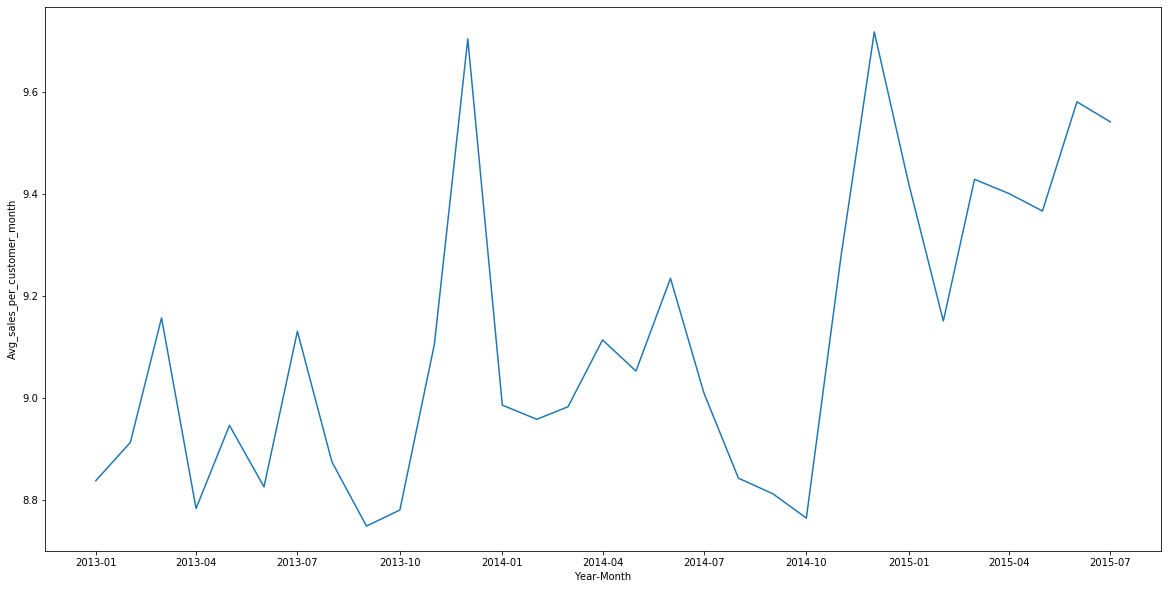

In [86]:
plt.figure(figsize=(20,10))
fig = sns.lineplot(x='Year-Month',y='Avg_sales_per_customer_month',data=df_avg_sales_per_cust_year_month)
plt.show()

The highest average sales per month are in december and the trend for month is increasing.

In [54]:
df_avg_sales_per_cust_year_month

Year  Month      Sales  Customers  Avg_sales_per_customer
0   2013      1  180132207   20380423                8.838492
1   2013      2  171534275   19244468                8.913433
2   2013      3  201180369   21969462                9.157273
3   2013      4  183431432   20882365                8.784035
4   2013      5  185411063   20723886                8.946732
5   2013      6  180702351   20473046                8.826354
6   2013      7  208843882   22872045                9.130967
7   2013      8  198042727   22314232                8.875176
8   2013      9  178053963   20350031                8.749567
9   2013     10  187662330   21371258                8.781061
10  2013     11  196170924   21543868                9.105650
11  2013     12  231710561   23879341                9.703390
12  2014      1  187752787   20893187                8.986316
13  2014      2  178924677   19972290                8.958646
14  2014      3  193019854   21486733                8.983211
15  2014      4  194544977   21345653                9.114033
16  2014      5  194693257   21505750                9.053079
17  2014      6  190047051   20579912                9.234590
18  2014      7  173892707   19299298                9.010313
19  2014      8  163748475   18516451                8.843405
20  2014      9  164516168   18667949                8.812761
21  2014     10  164216398   18734892                8.765271
22  2014     11  173327953   18686232                9.275704
23  2014     12  202120592   20800624                9.717045
24  2015      1  198843730   21110481                9.419195
25  2015      2  178275458   19481381                9.151069
26  2015      3  205631683   21809641                9.428476
27  2015      4  197918886   21053991                9.400540
28  2015      5  189143897   20193848                9.366412
29  2015      6  207363373   21645129                9.580140
30  2015      7  212322616   22253888                9.540922

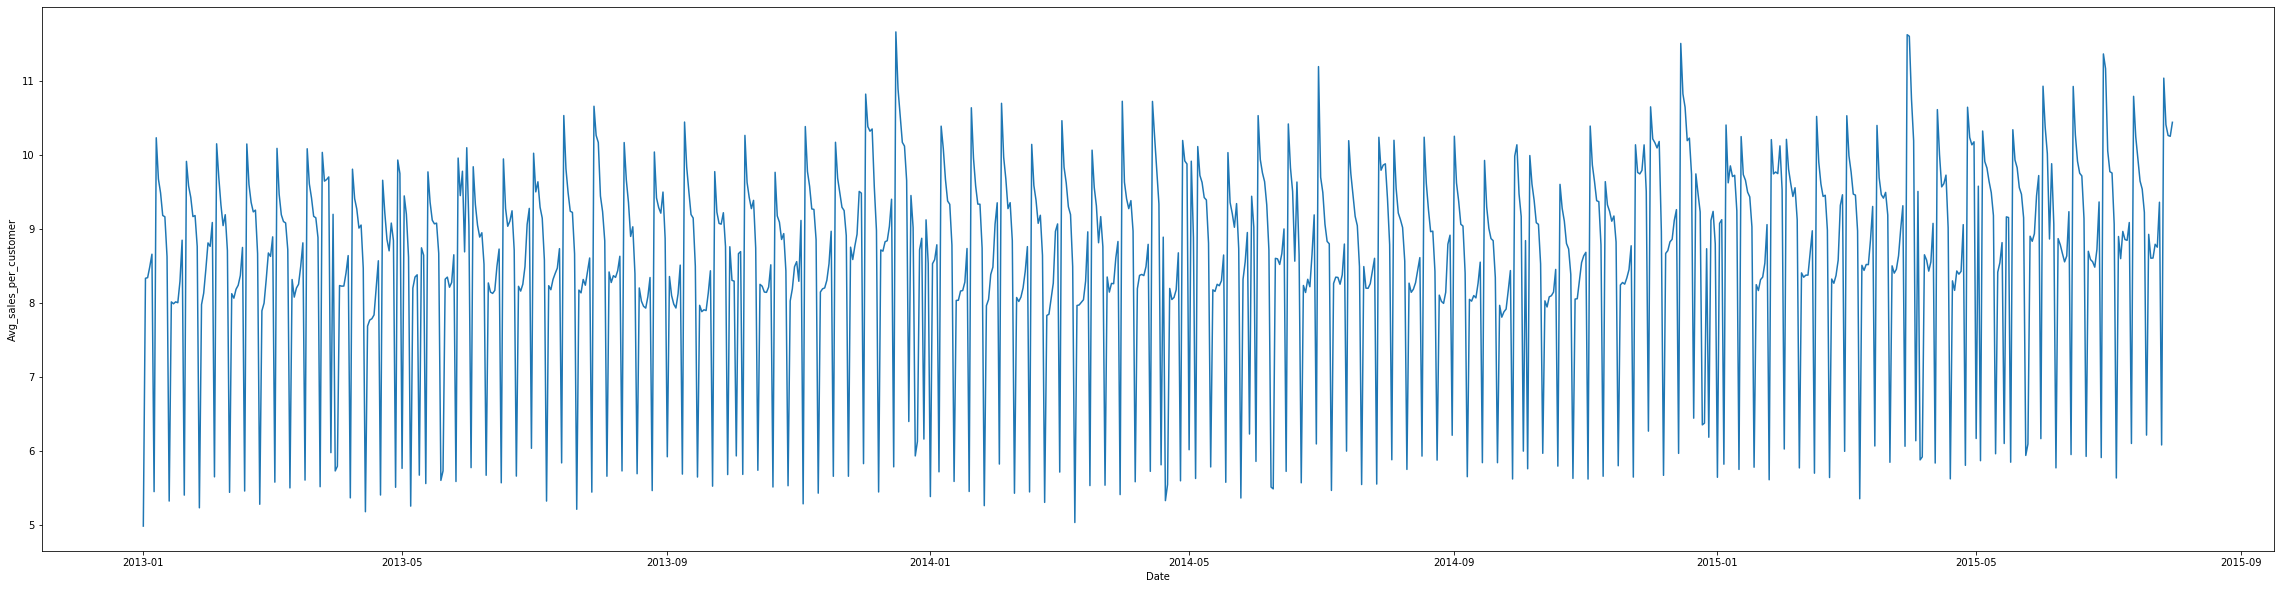

In [49]:
plt.figure(figsize=(40,10))
sns.lineplot(x='Date',y='Avg_sales_per_customer',data=df_avg_sales_per_cust)
plt.show()

looks like refurbishment is always at the same time

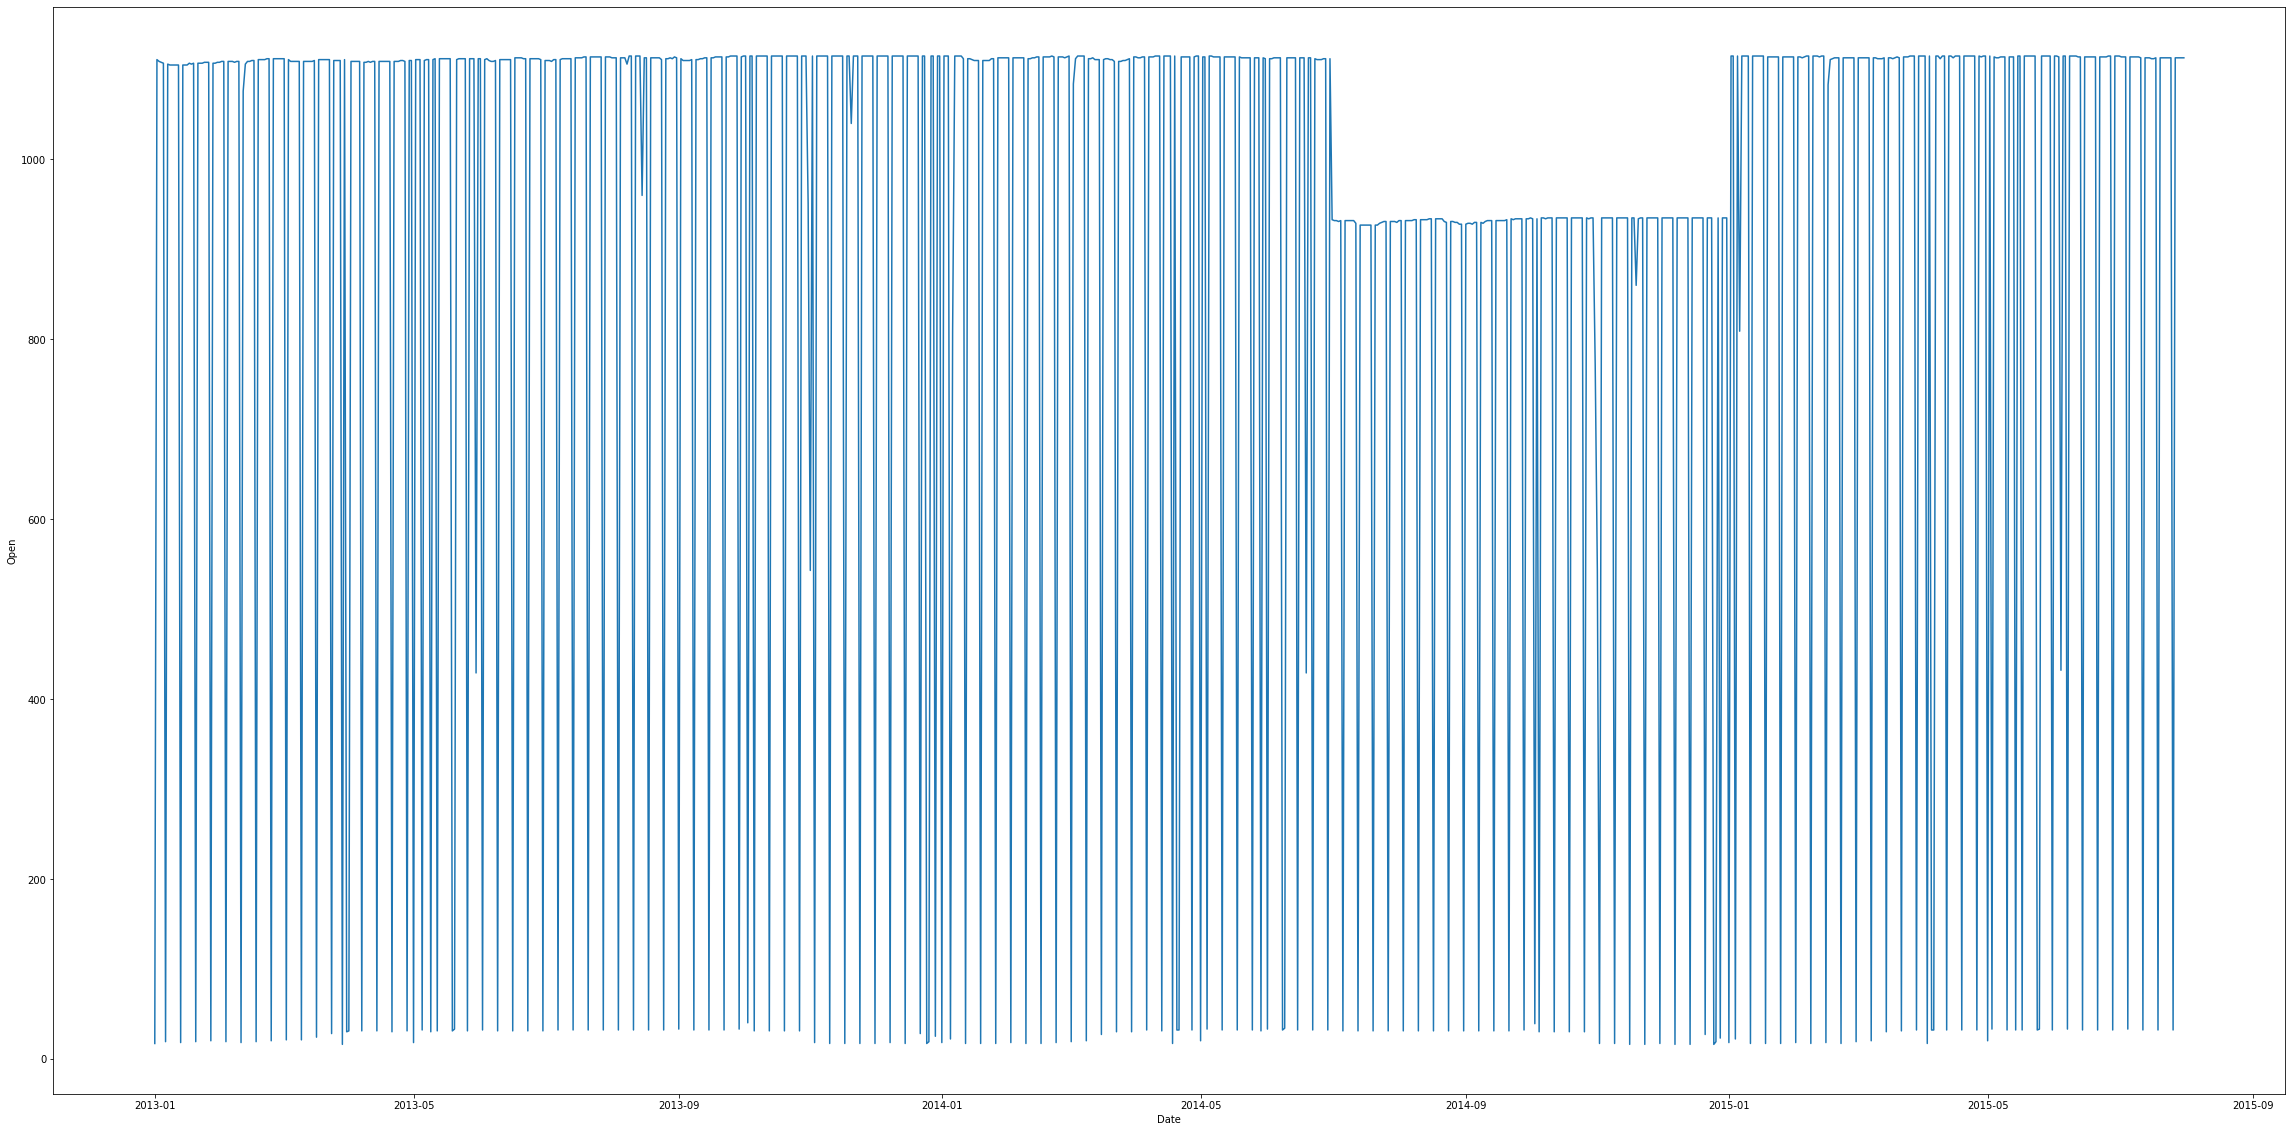

In [119]:
plt.figure(figsize=(40,20))
sns.lineplot(x='Date',y='Open',data=df_train_store_combined[df_train_store_combined['Open'] == '1'].groupby('Date')['Open'].count().reset_index())
plt.show()

/home/timbo/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # This is added back by InteractiveShellApp.init_path()


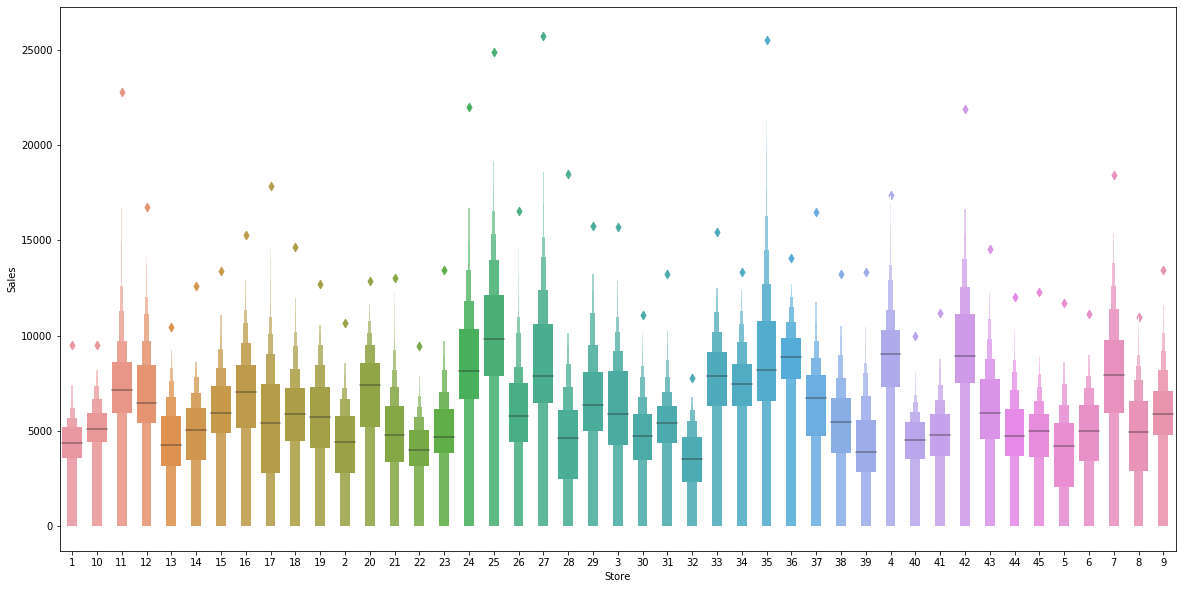

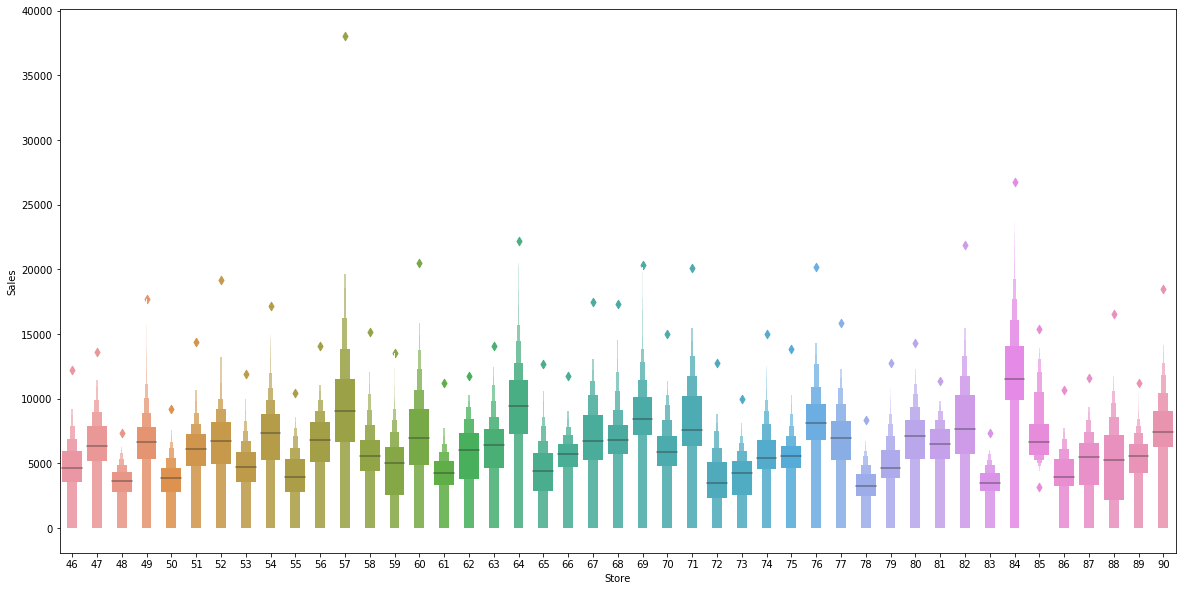

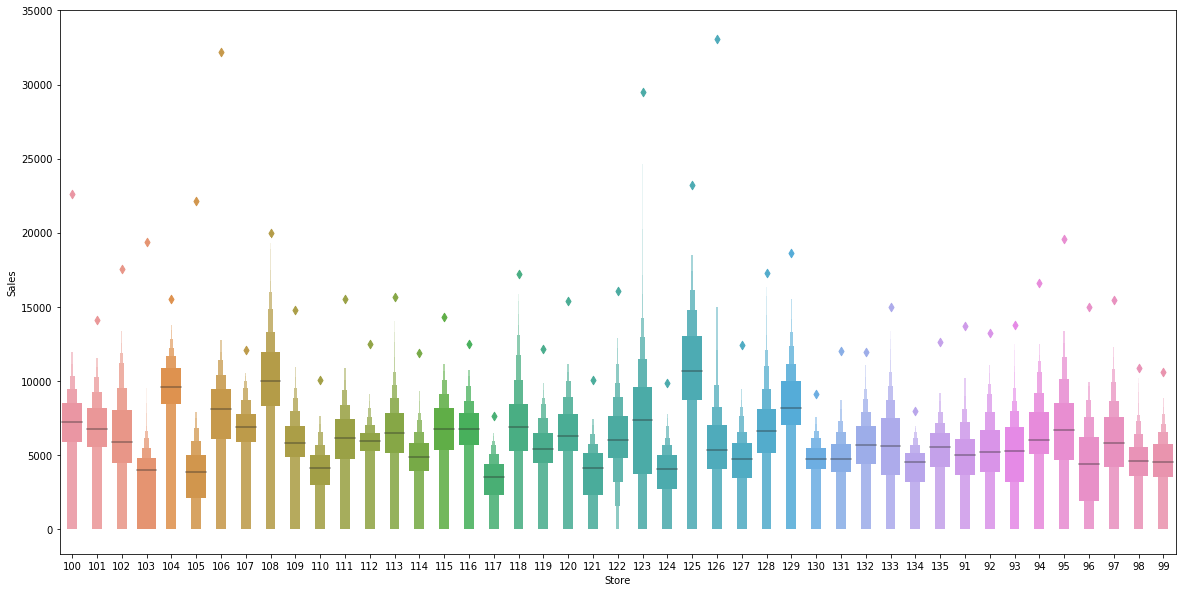

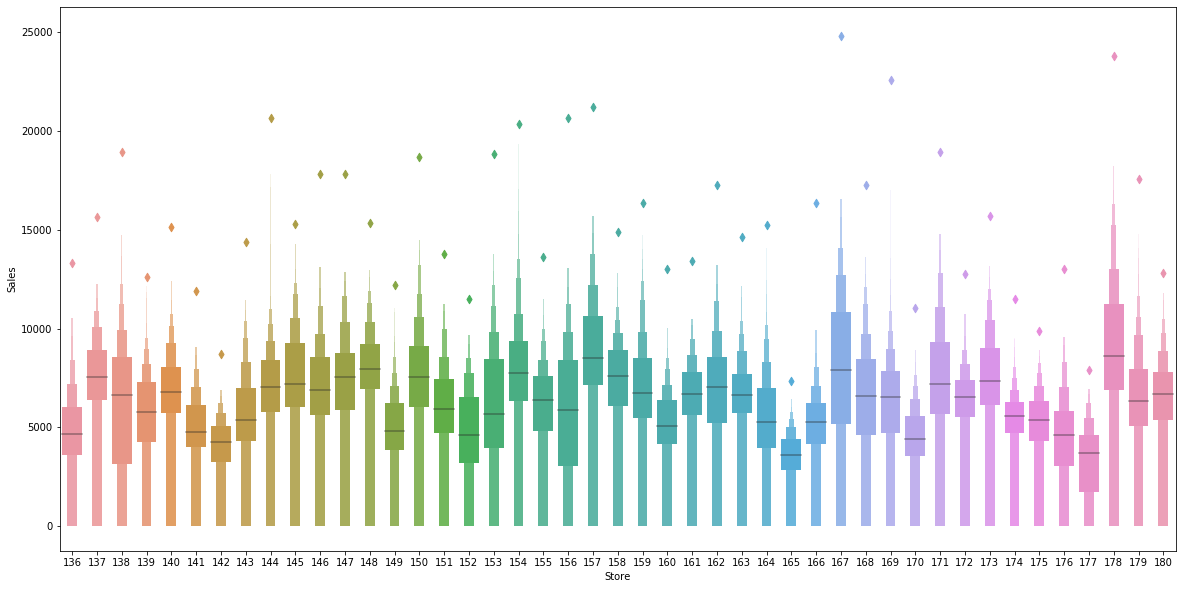

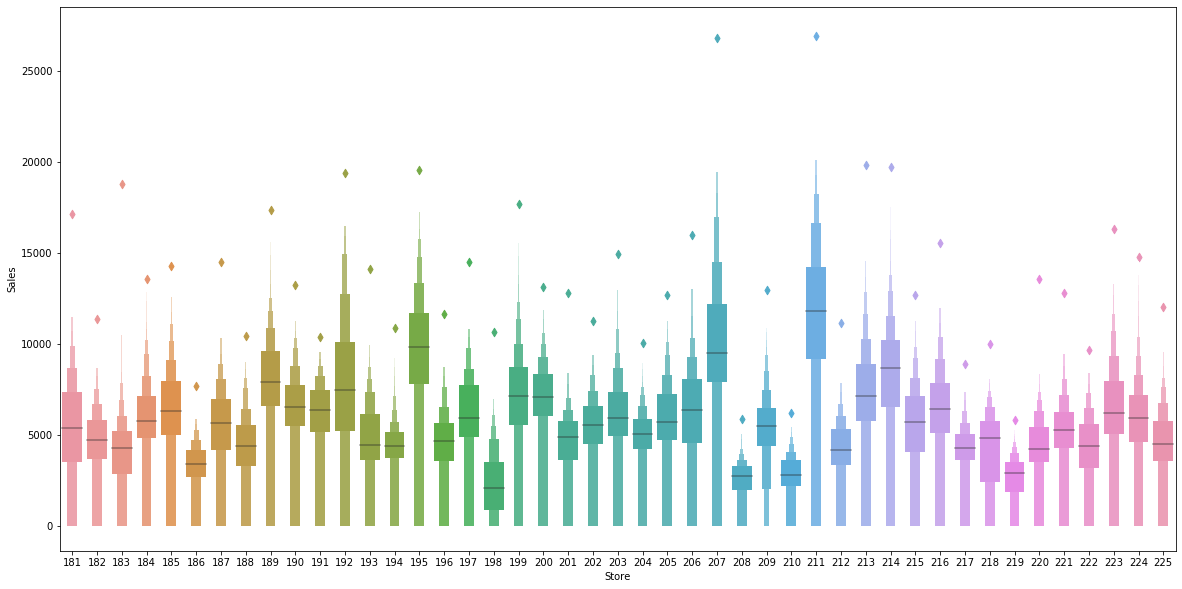

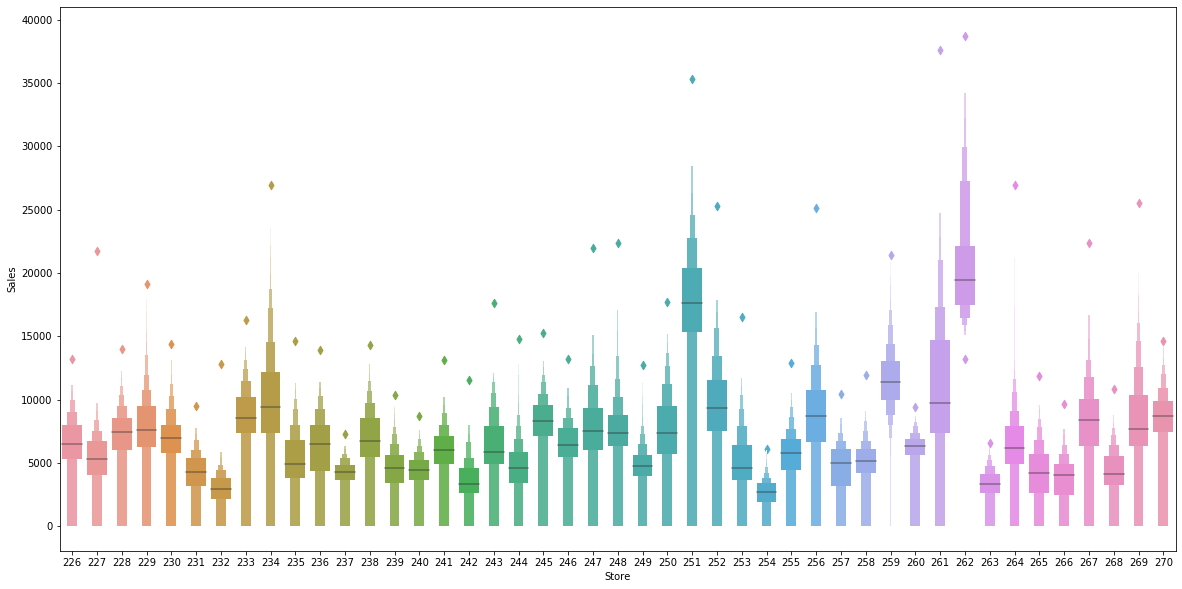

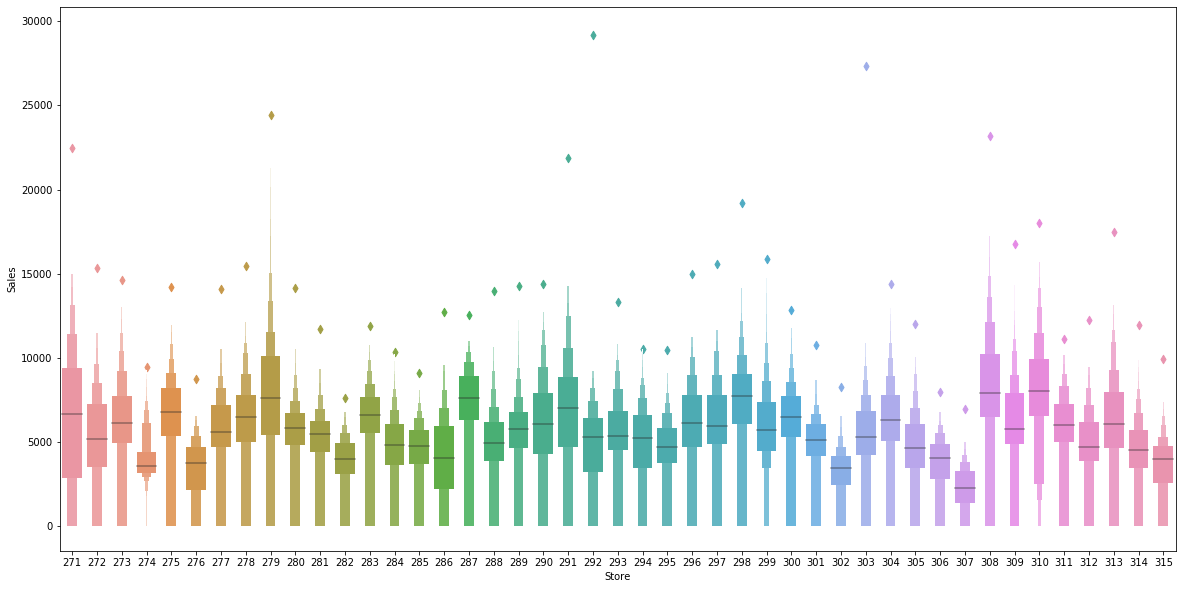

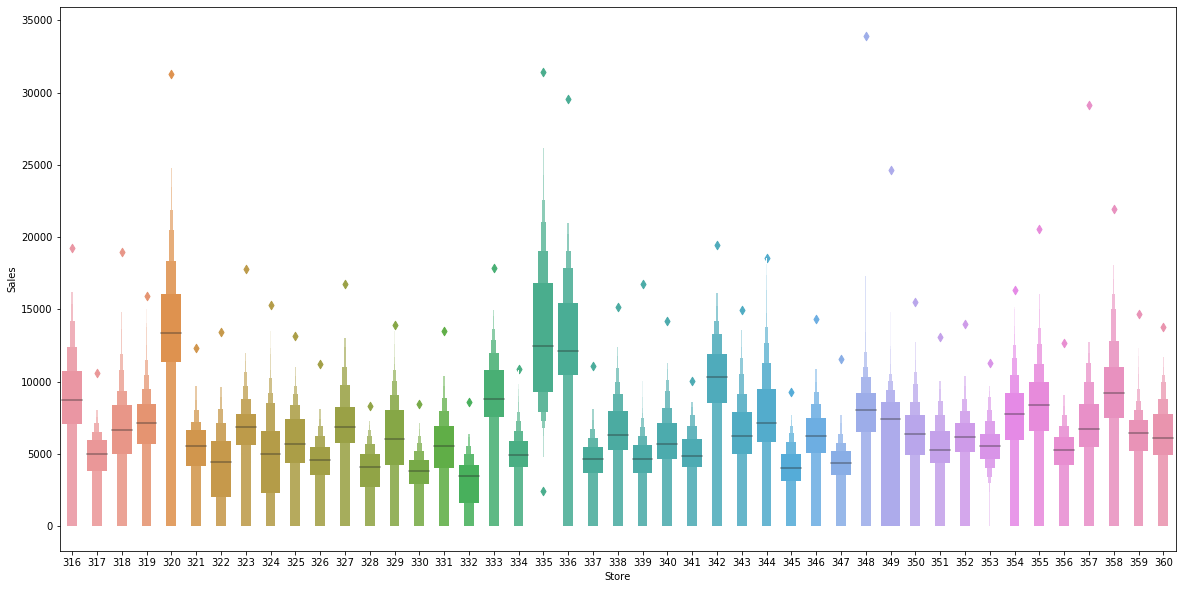

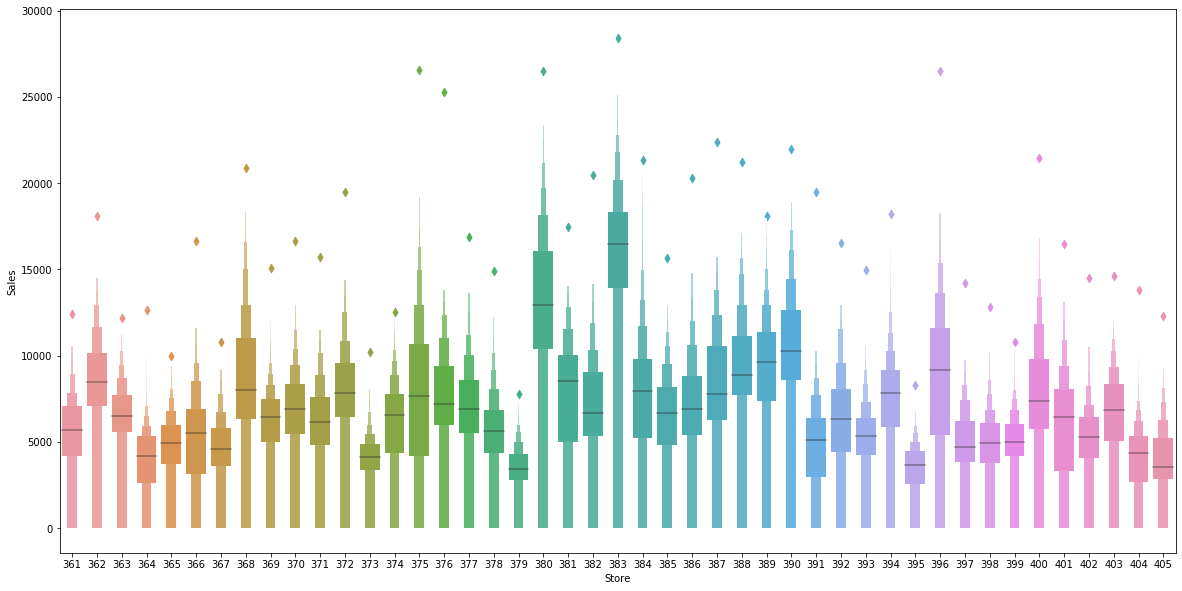

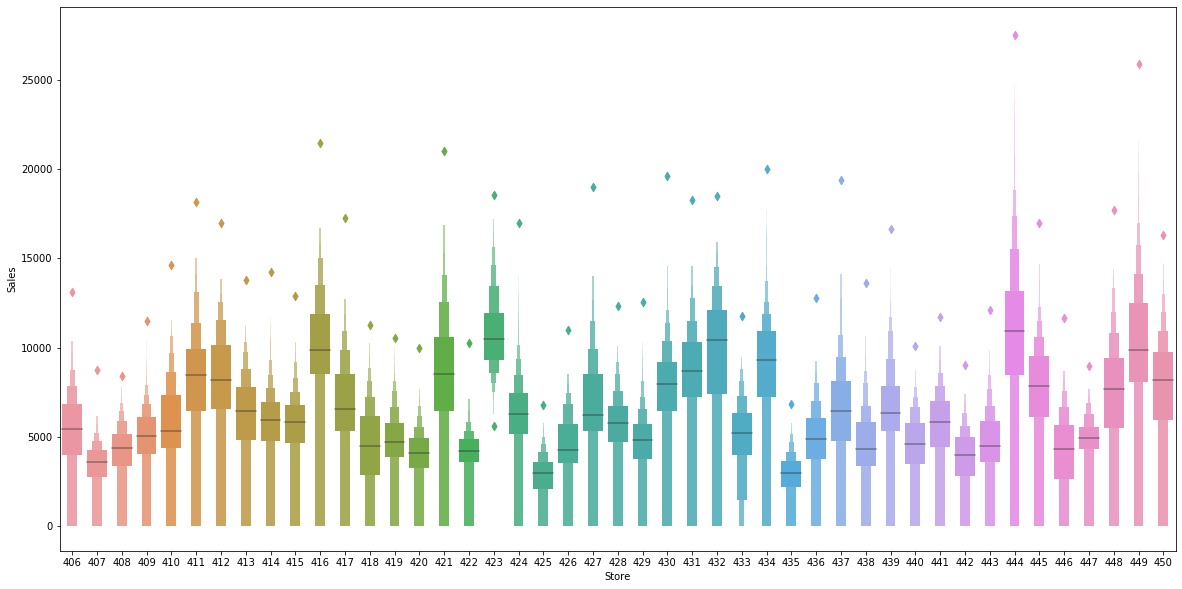

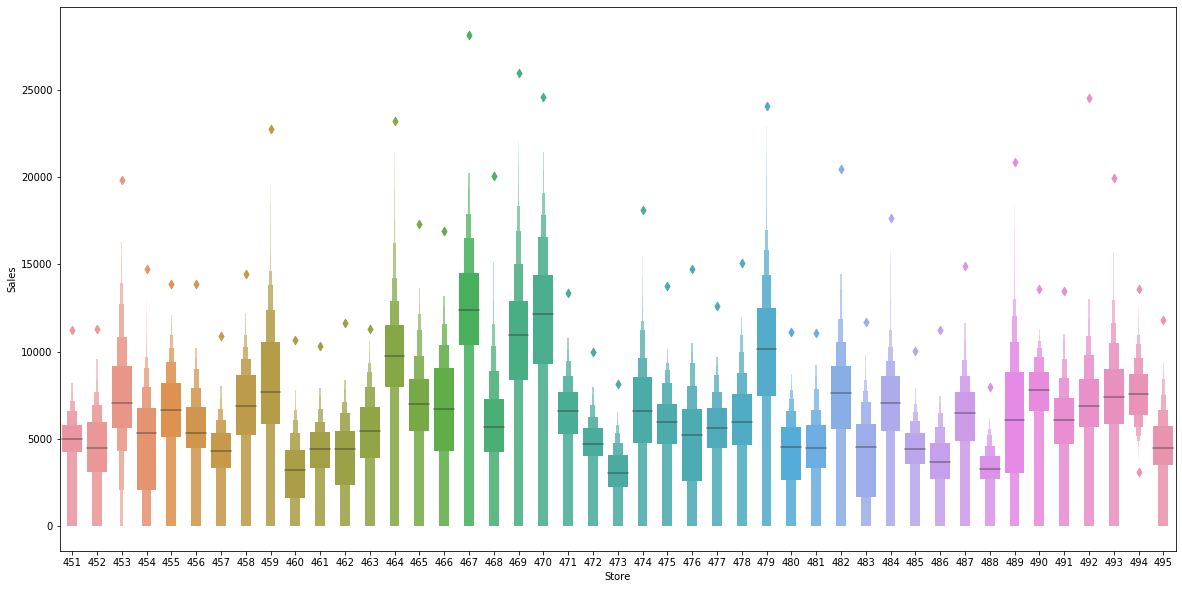

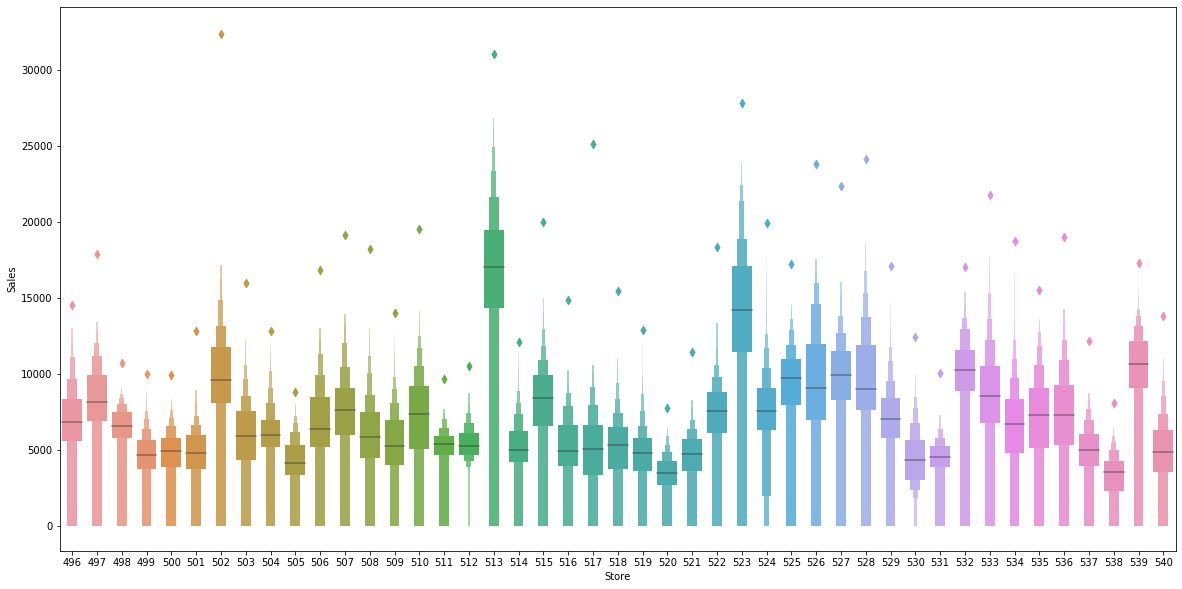

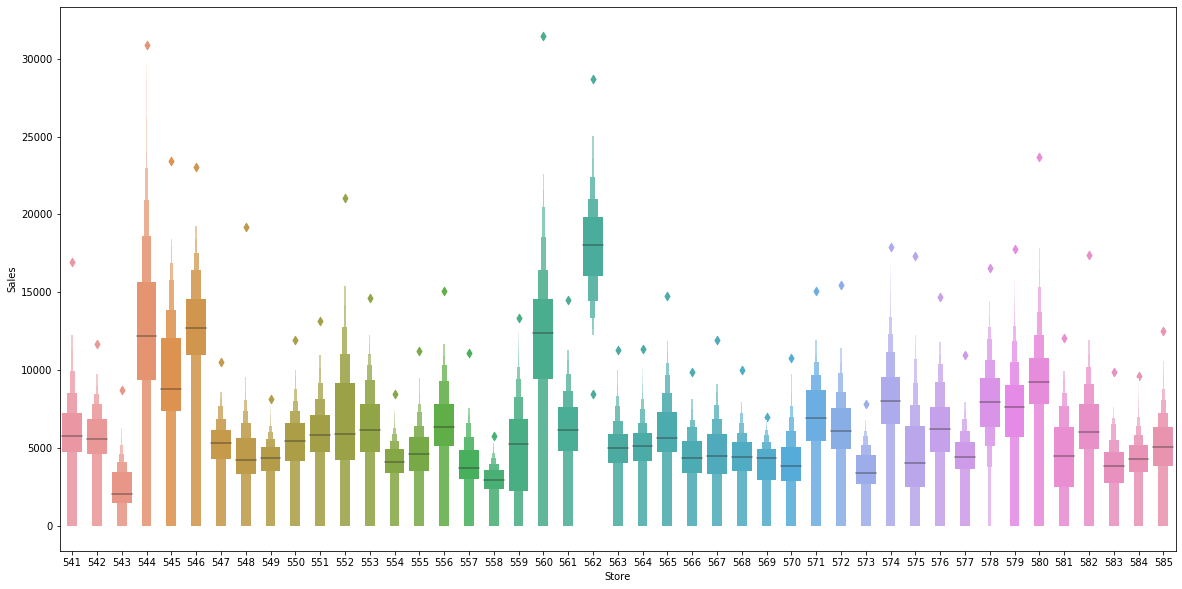

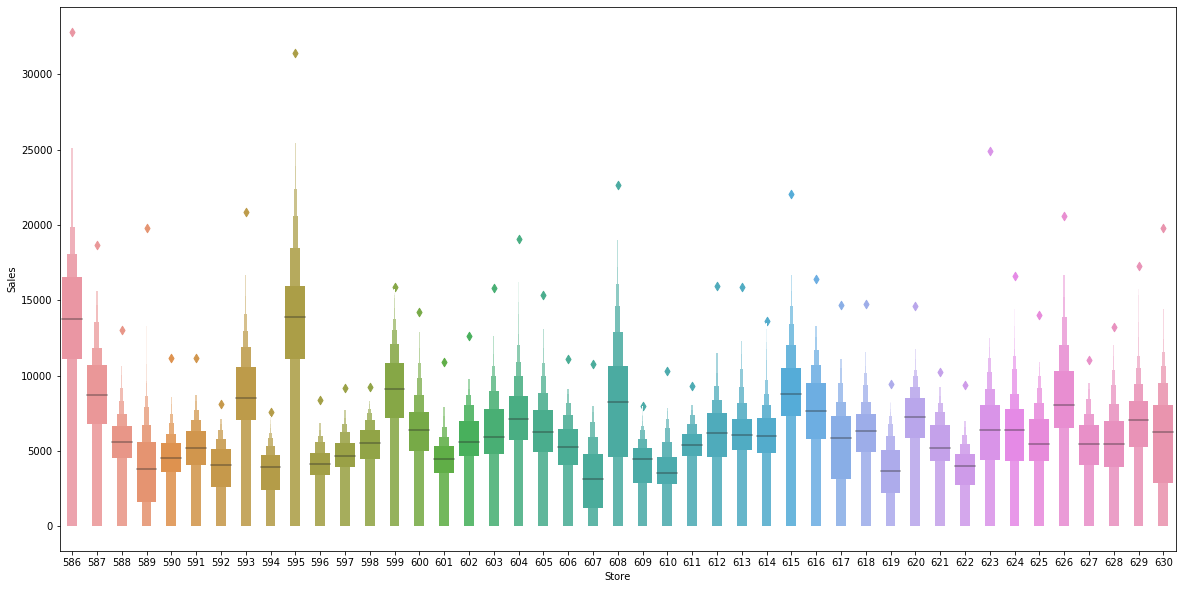

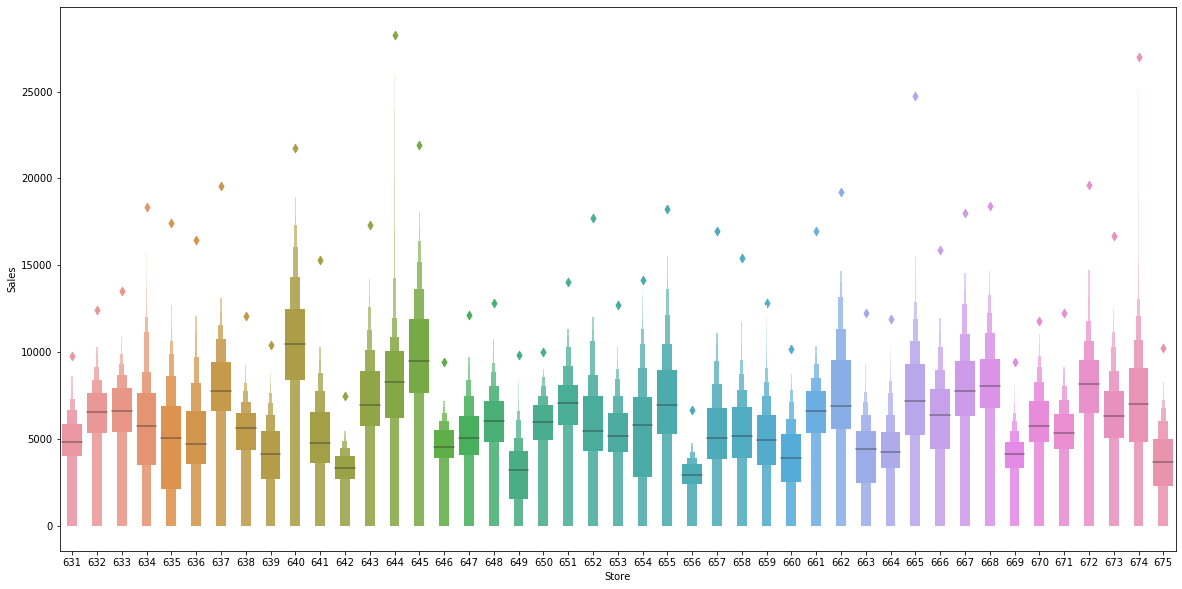

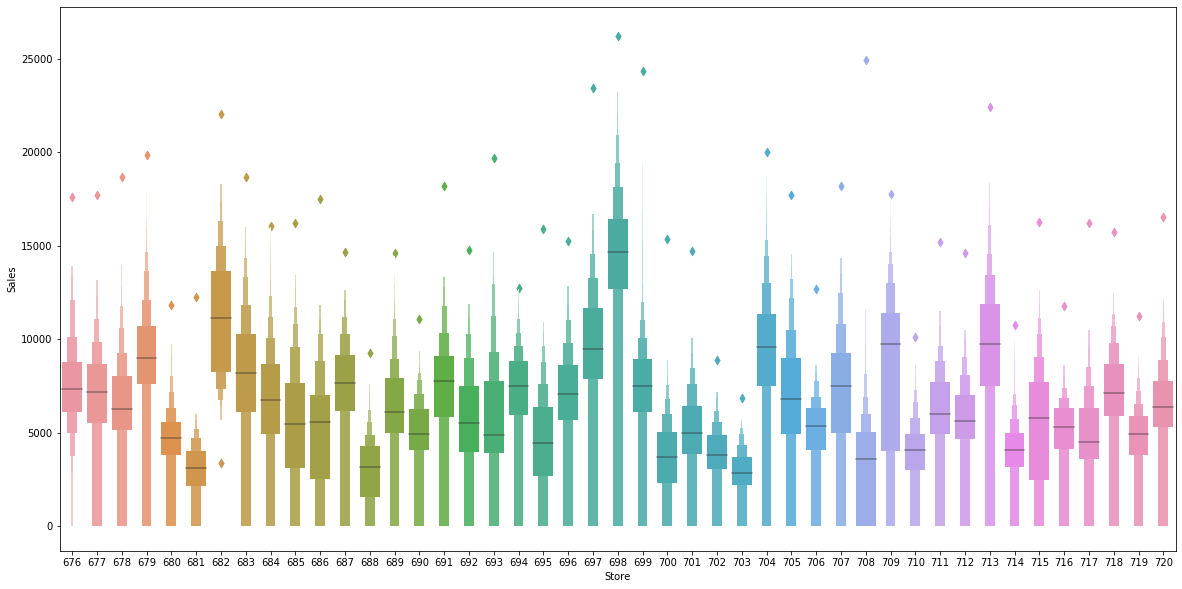

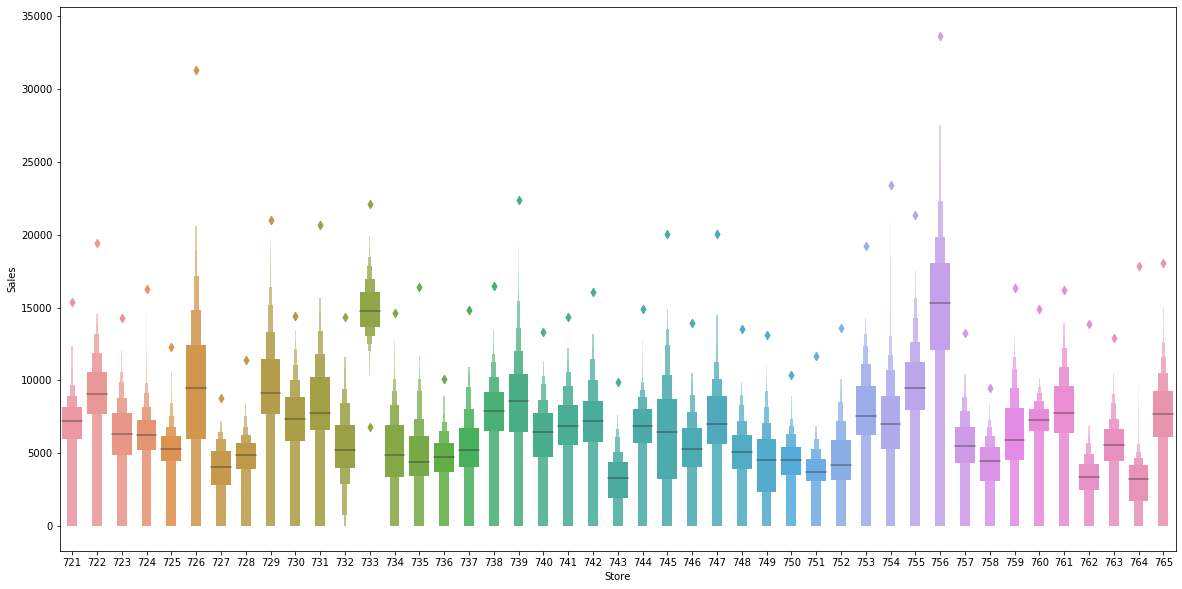

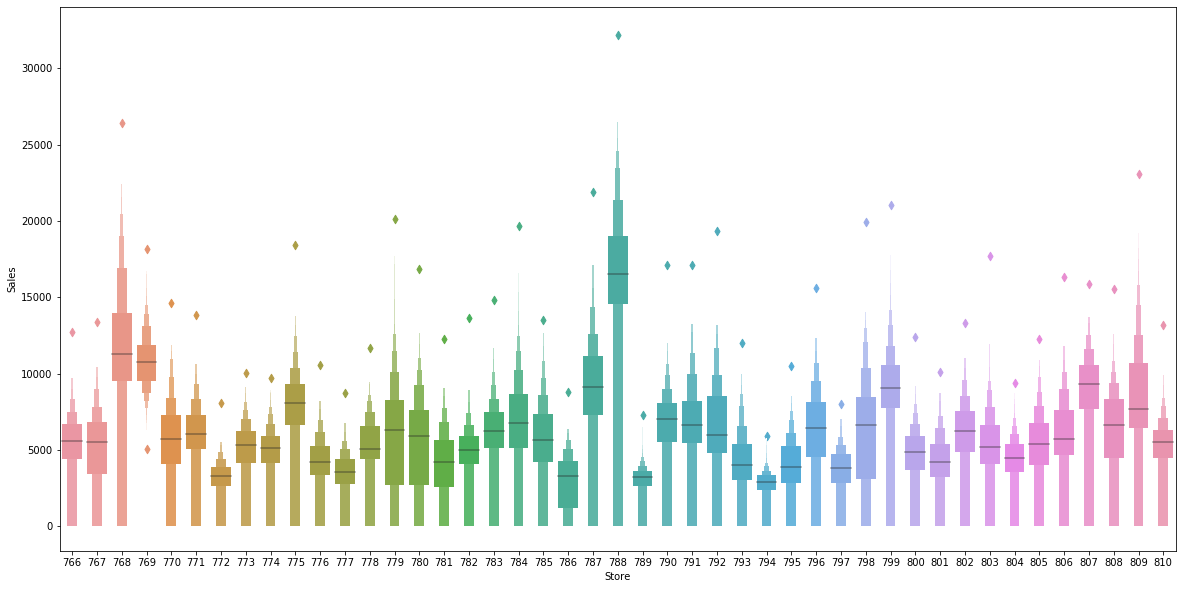

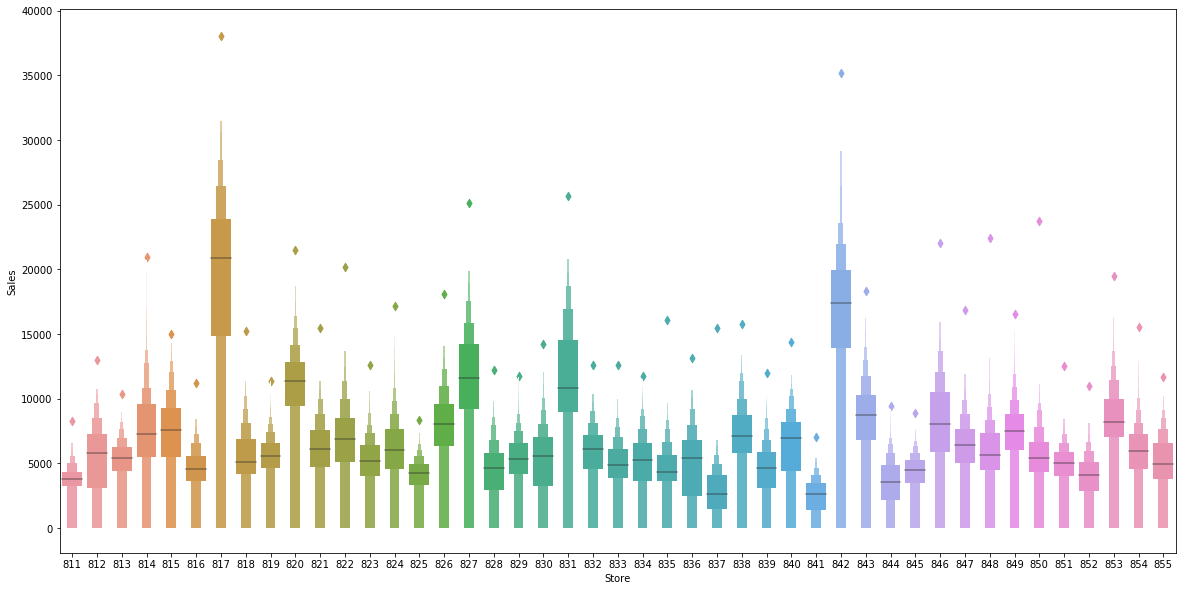

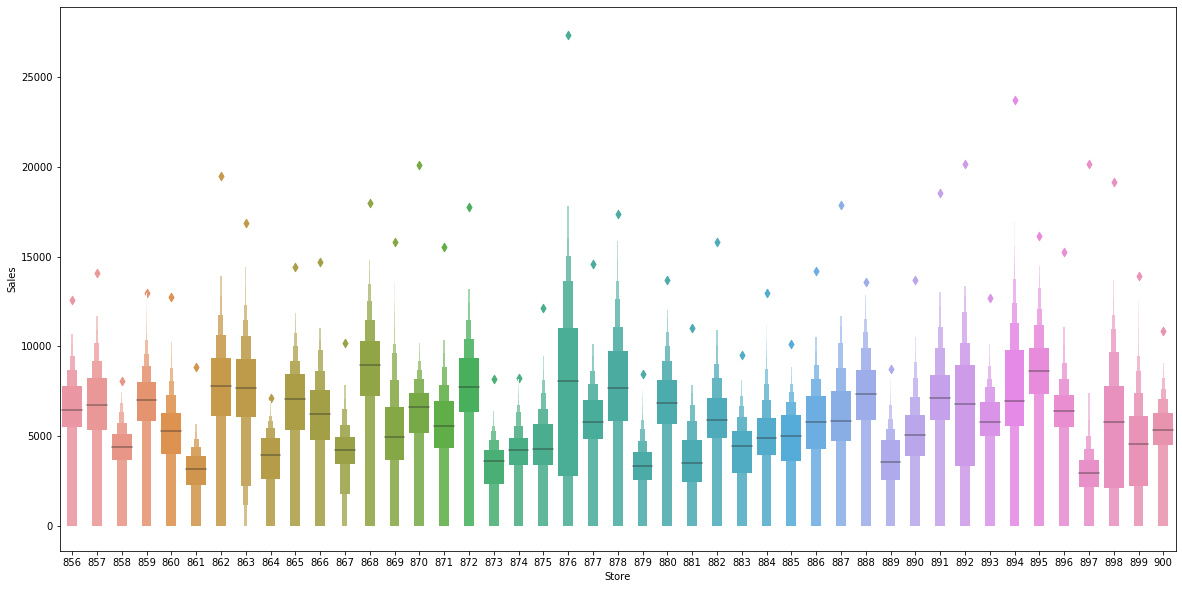

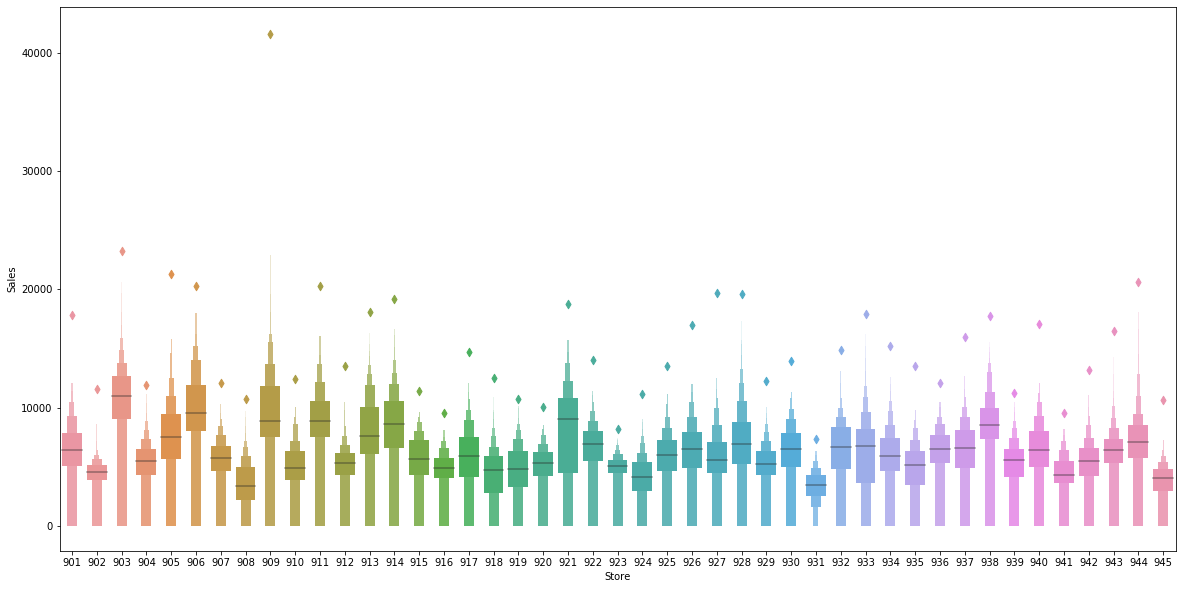

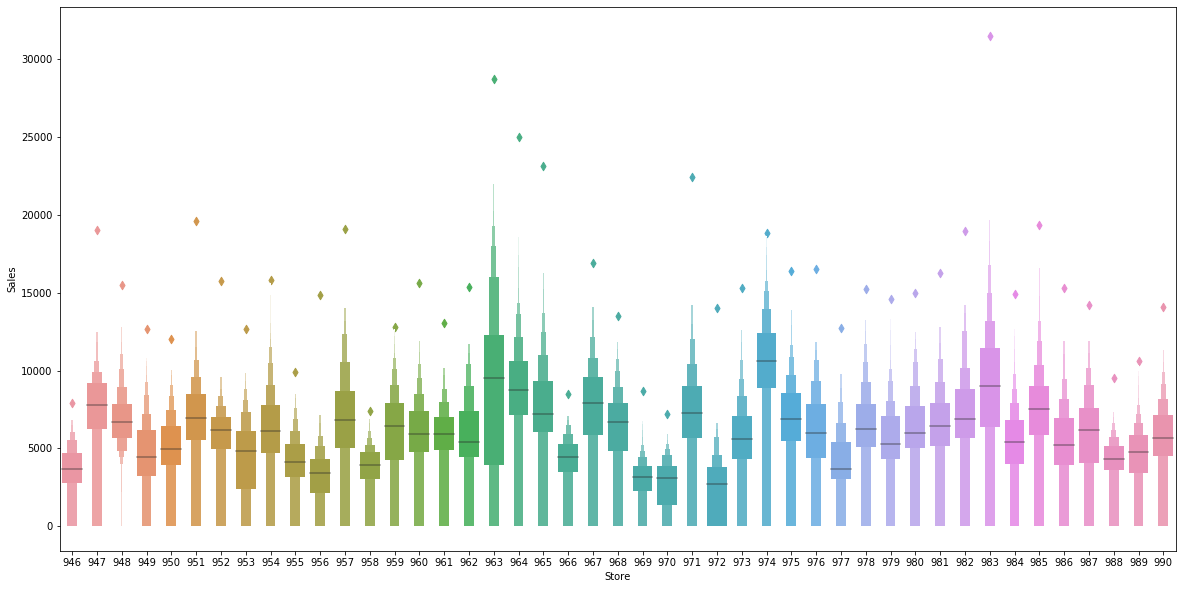

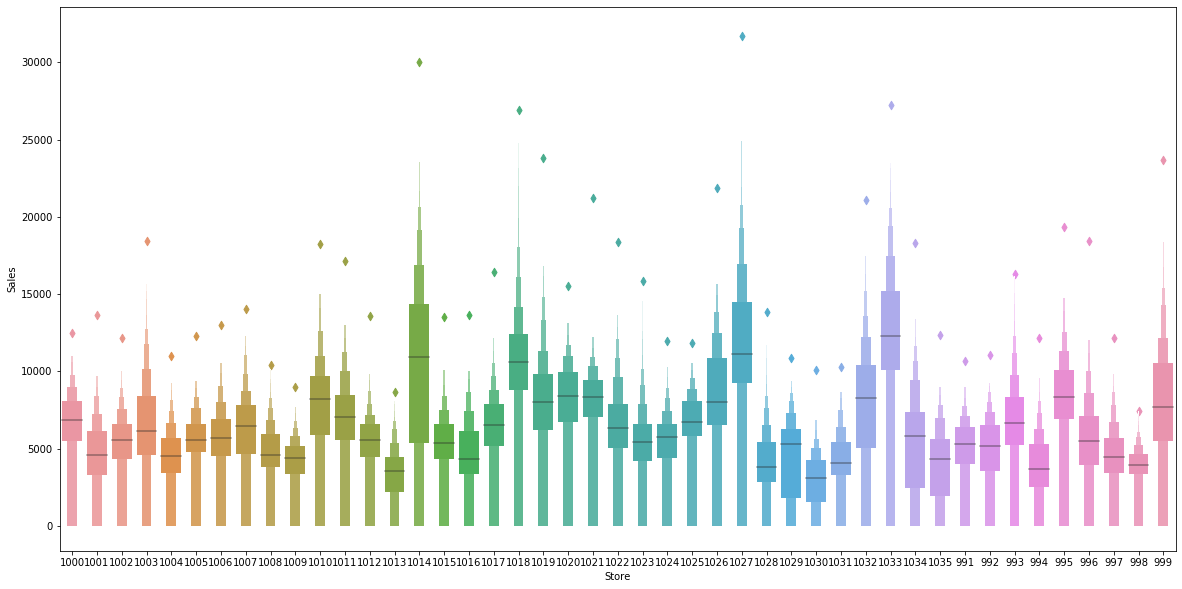

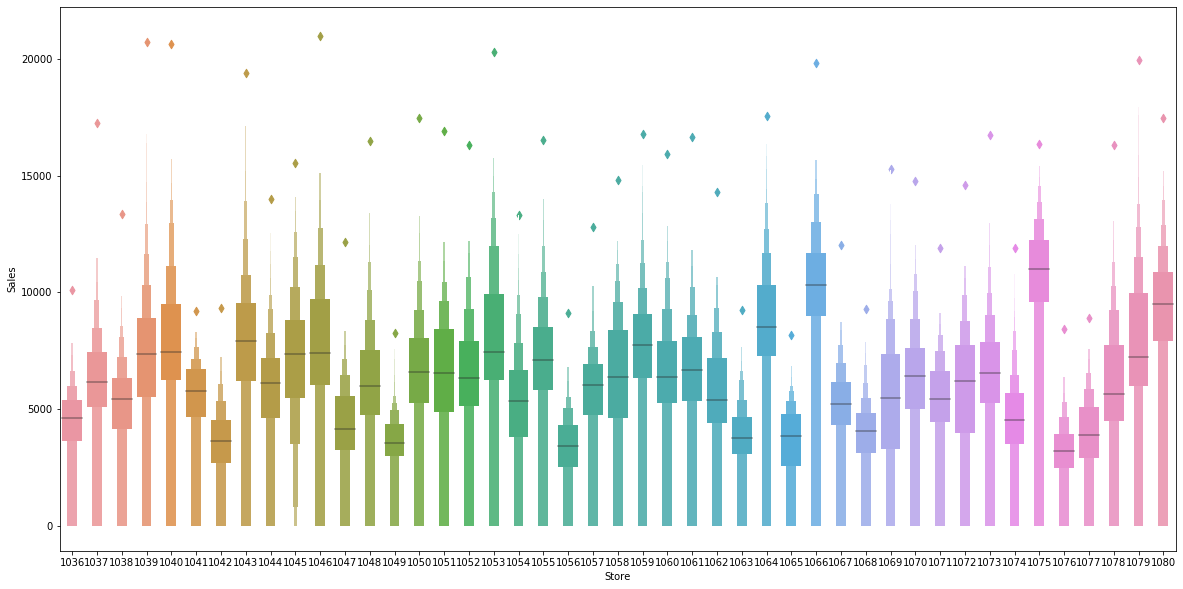

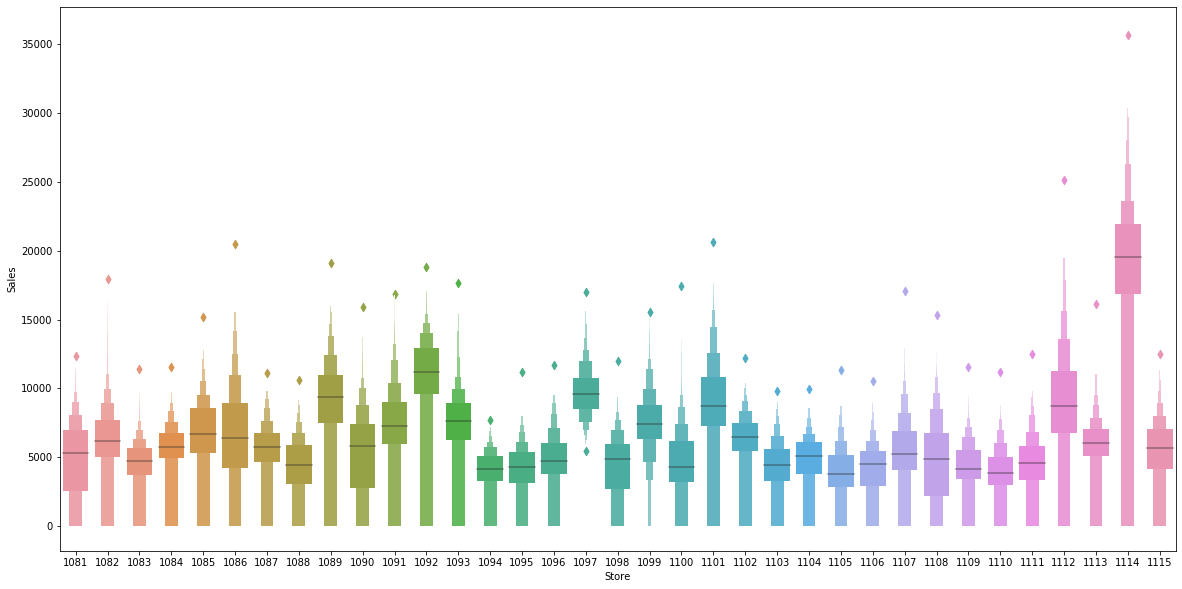

In [83]:
stores = df_train_store_combined['Store'].unique().tolist()
start = 0
steps = 45

i= 0
while start < len(stores):
    df = df_train_store_combined[df_train_store_combined['Store'].isin(stores[start:start+steps])]
    plt.figure(i,figsize=(20, 10))
    sns.boxenplot(x='Store', y='Sales', data=df)
    # print(df)
    start += steps
    i += 1
plt.show()

/home/timbo/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


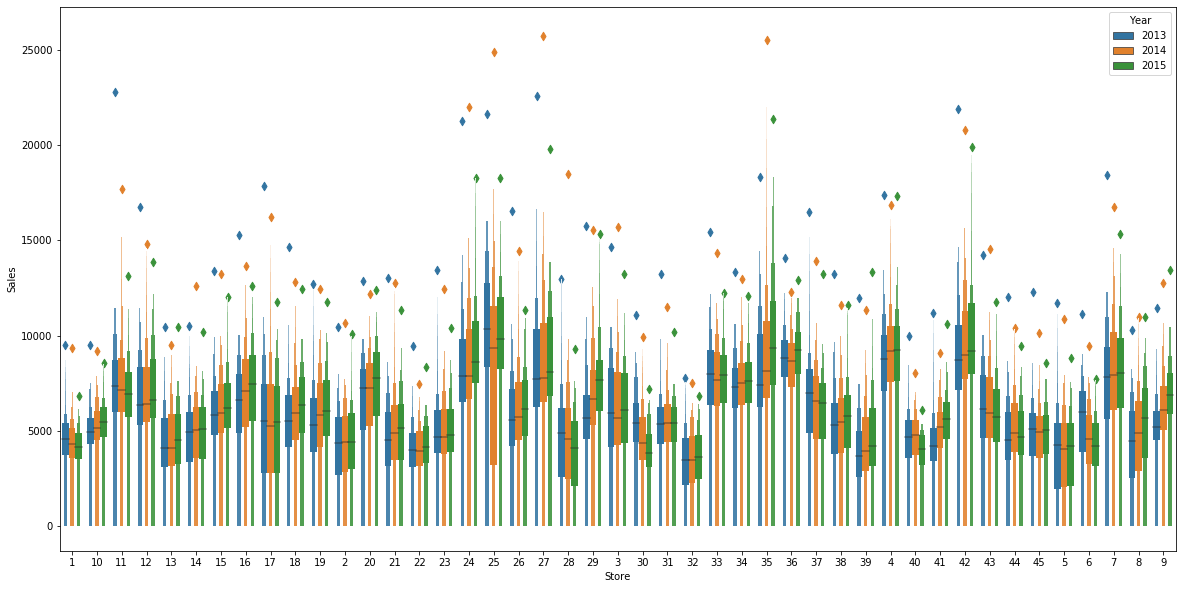

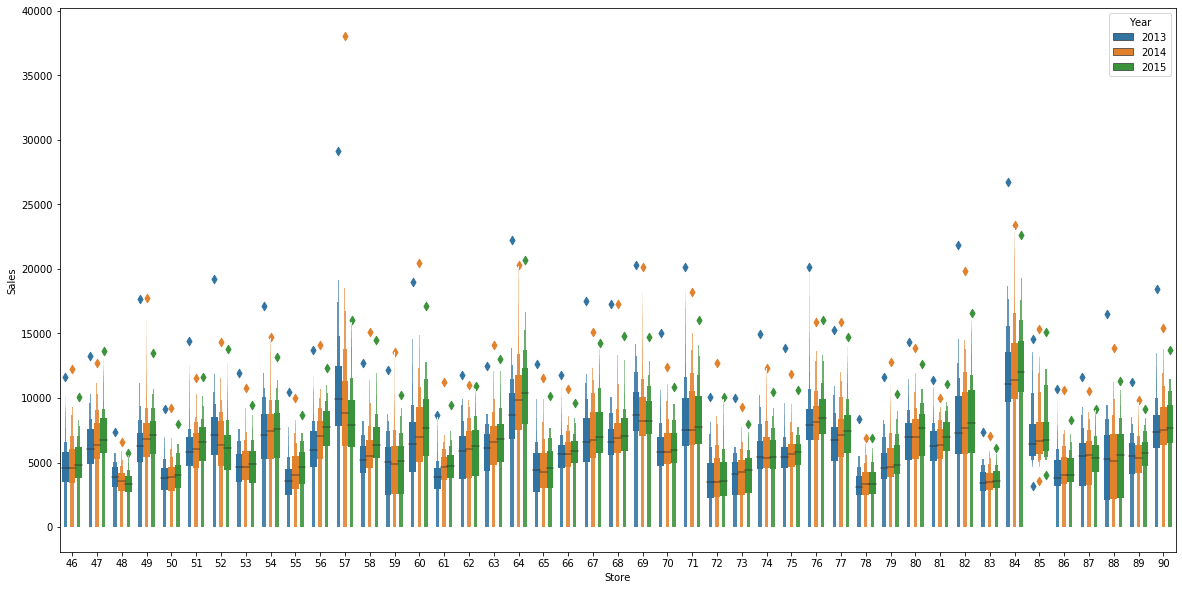

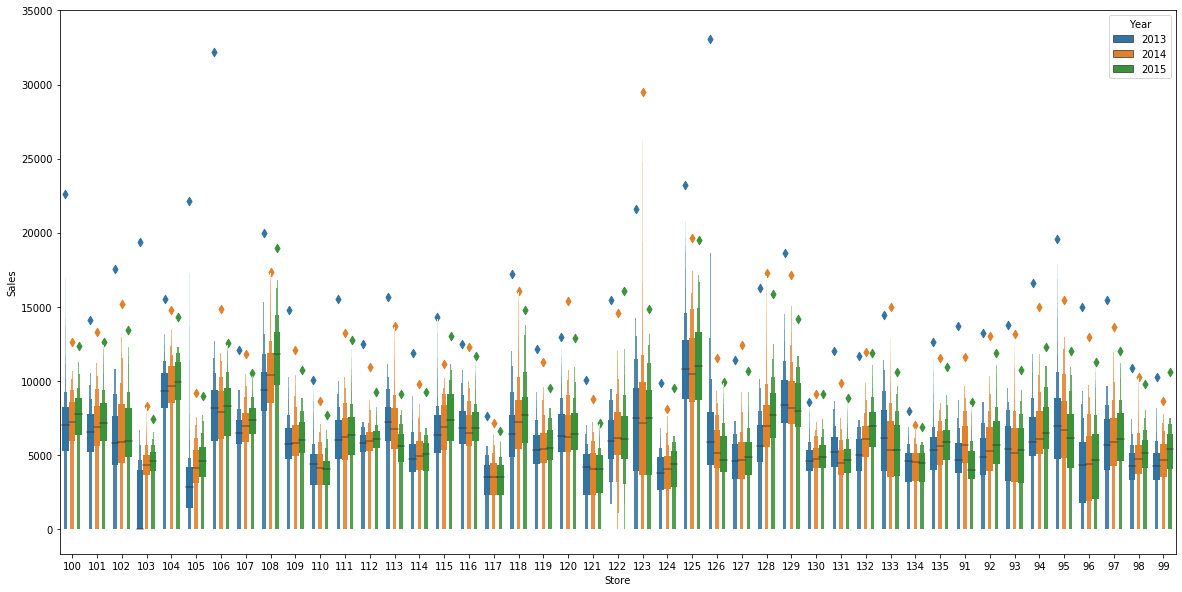

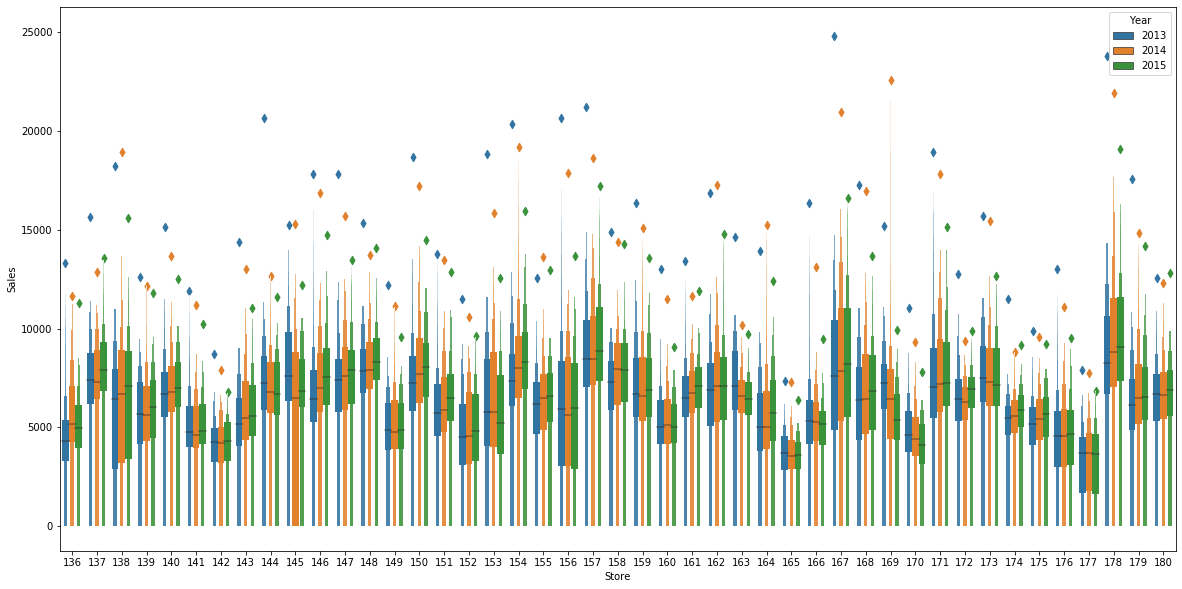

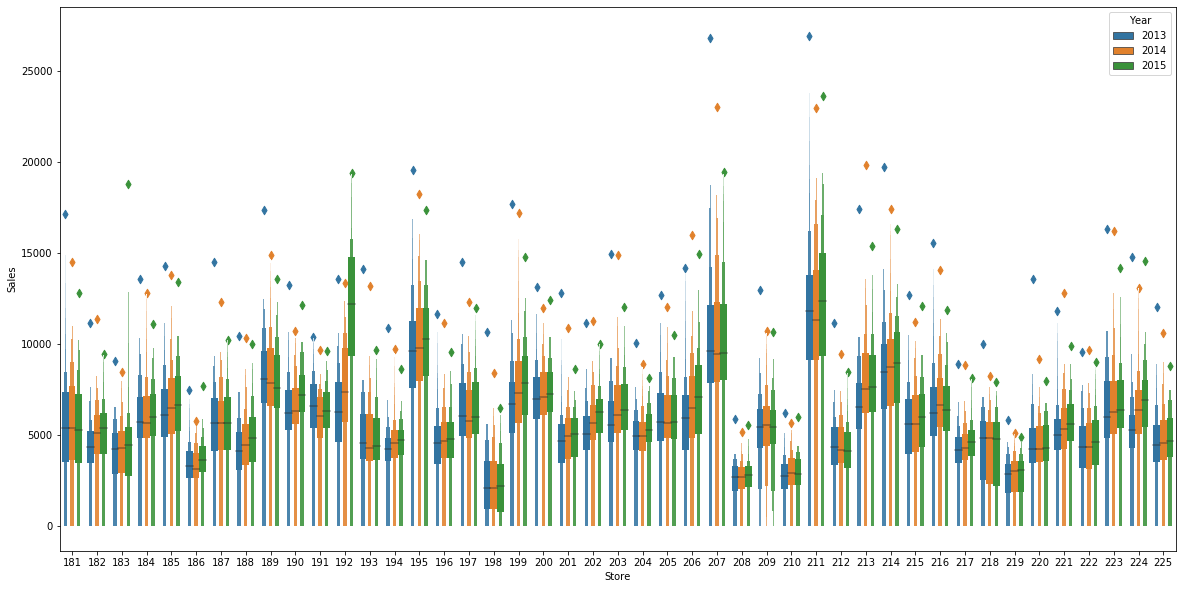

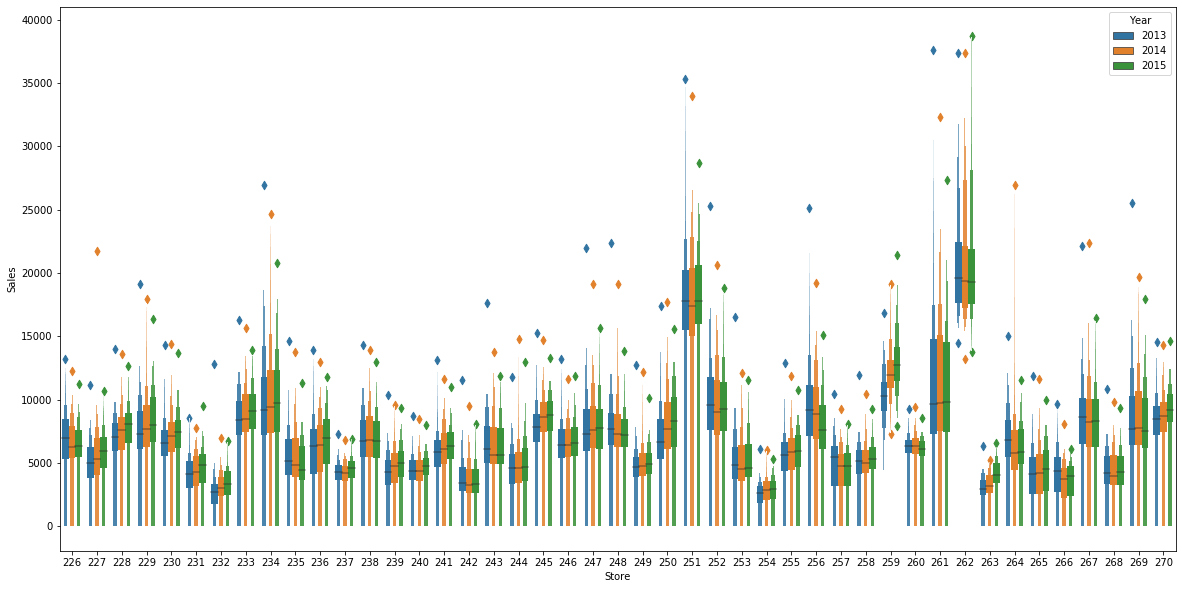

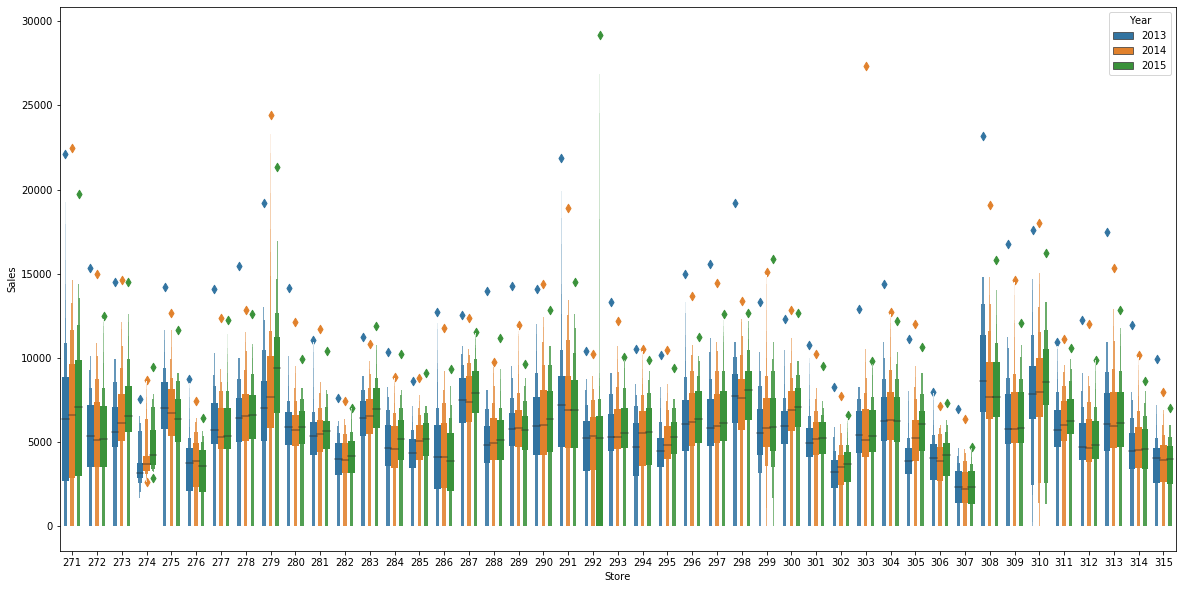

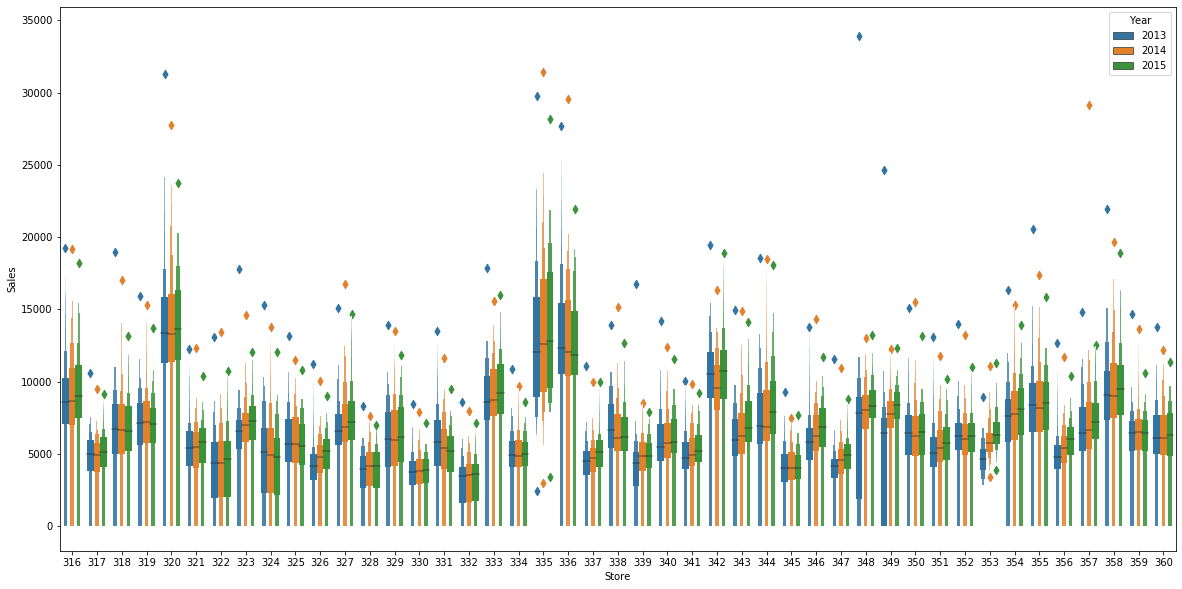

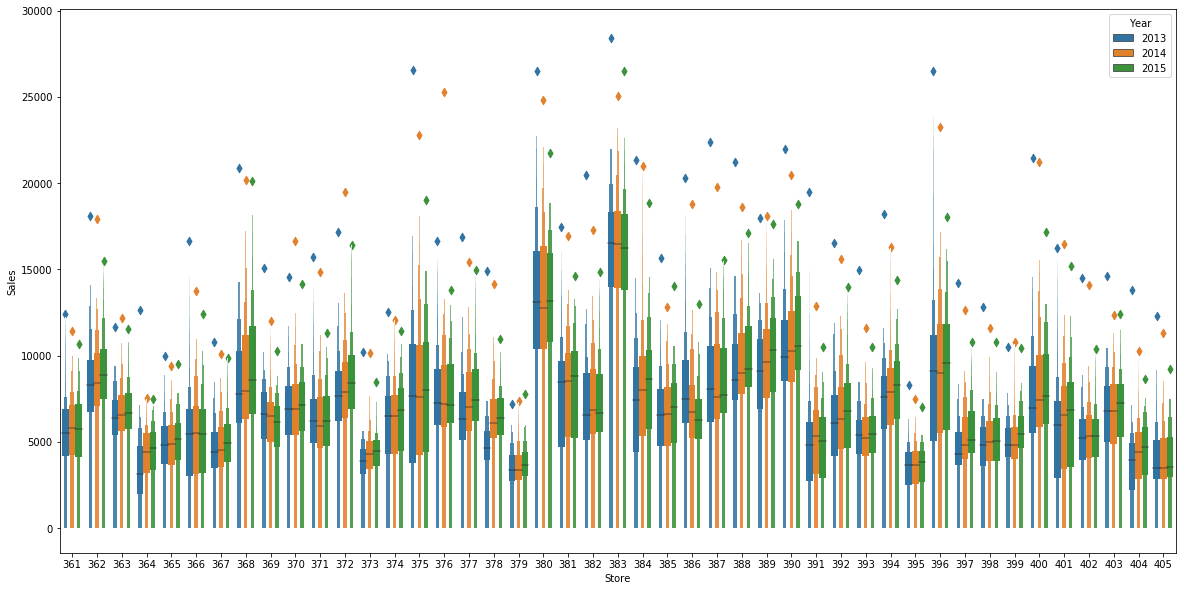

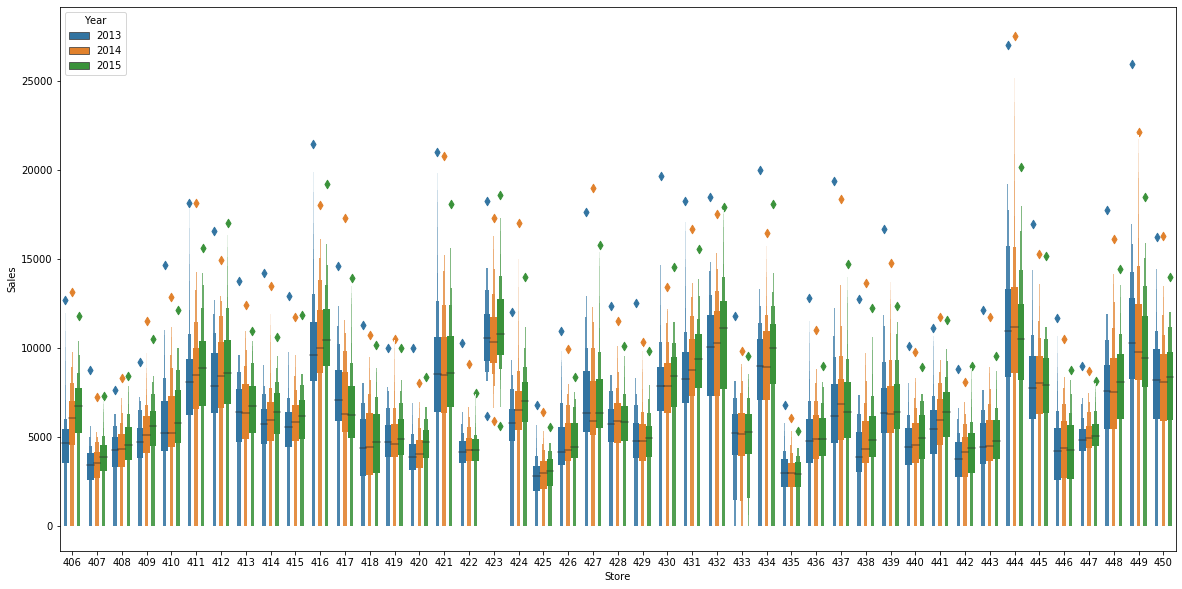

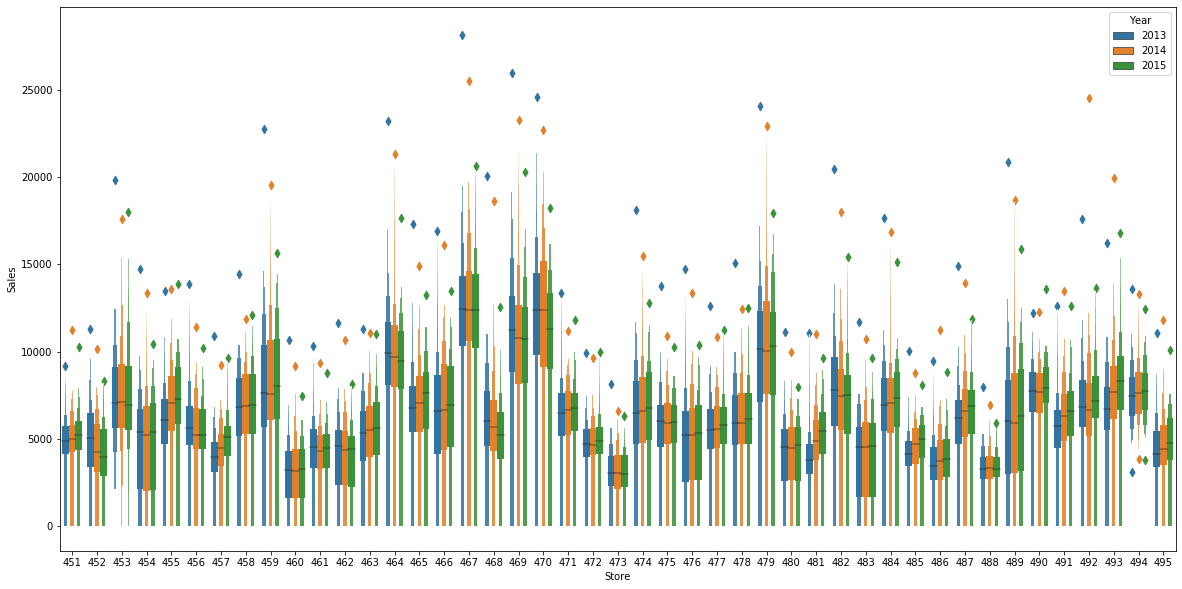

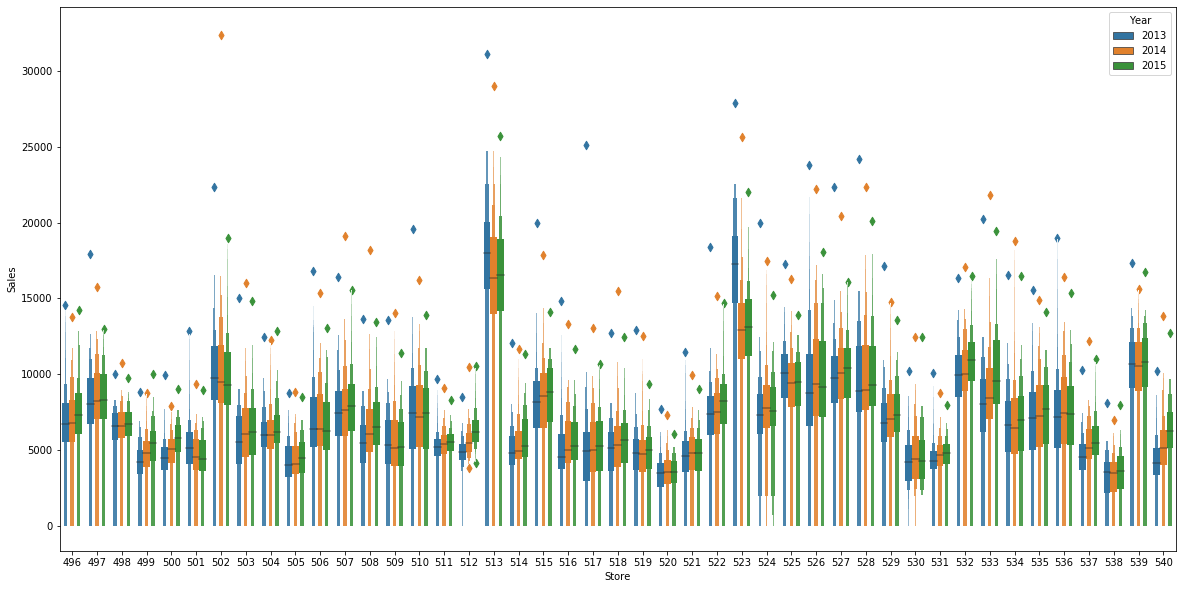

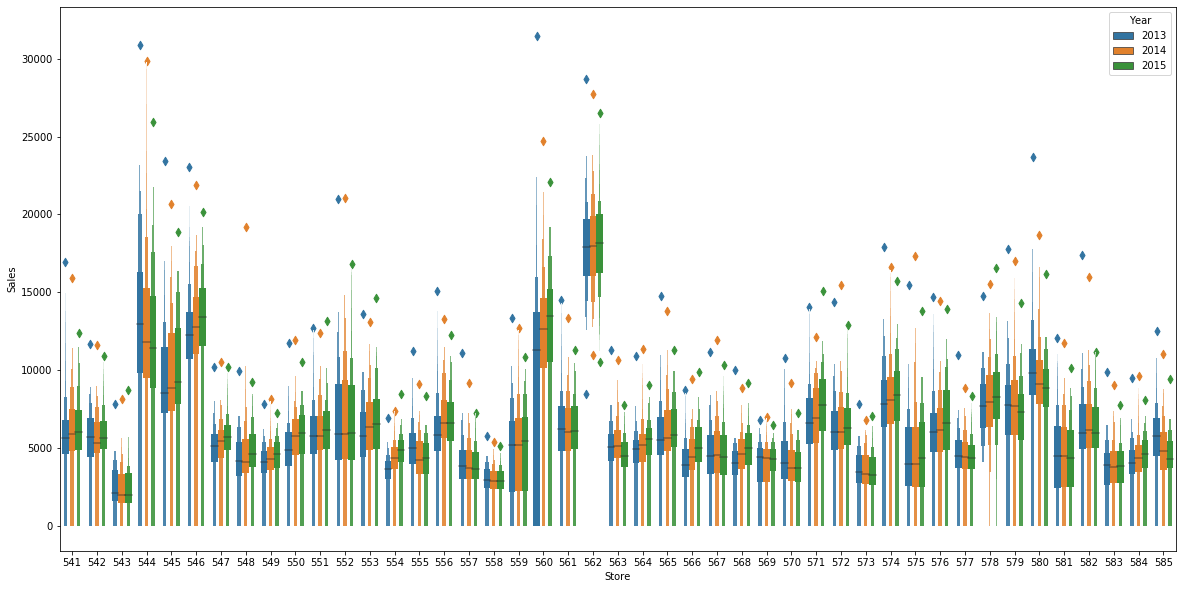

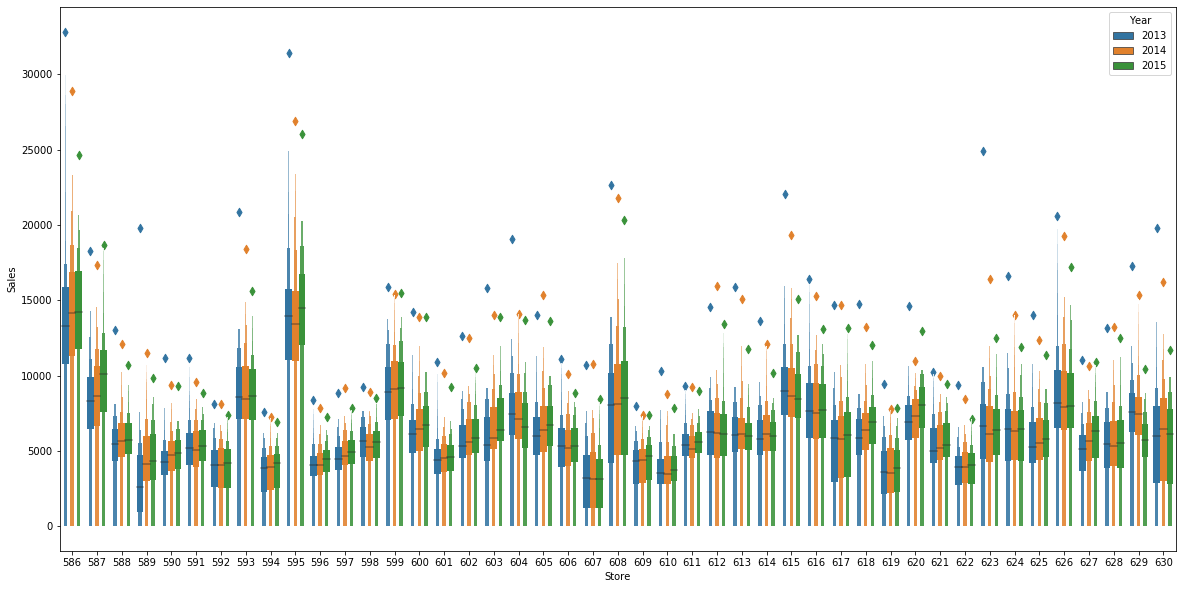

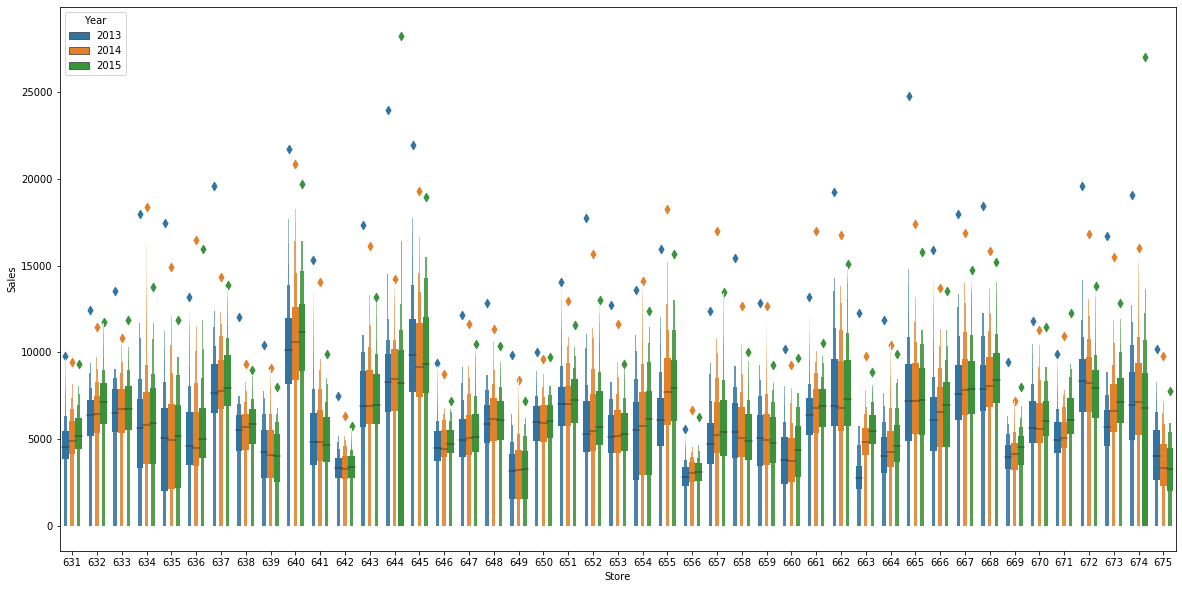

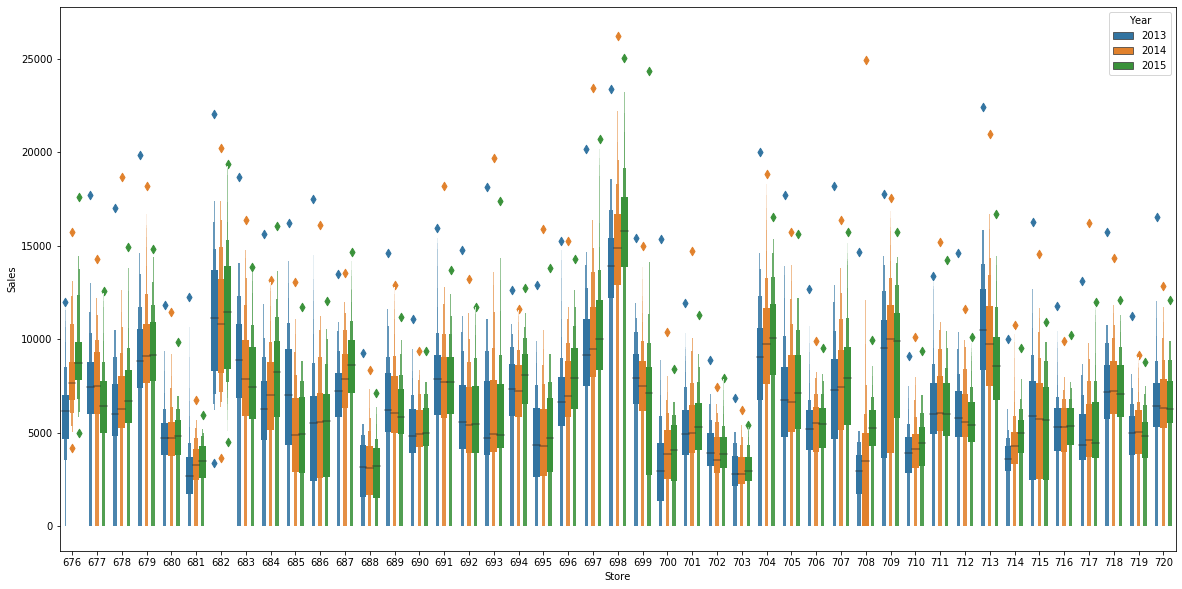

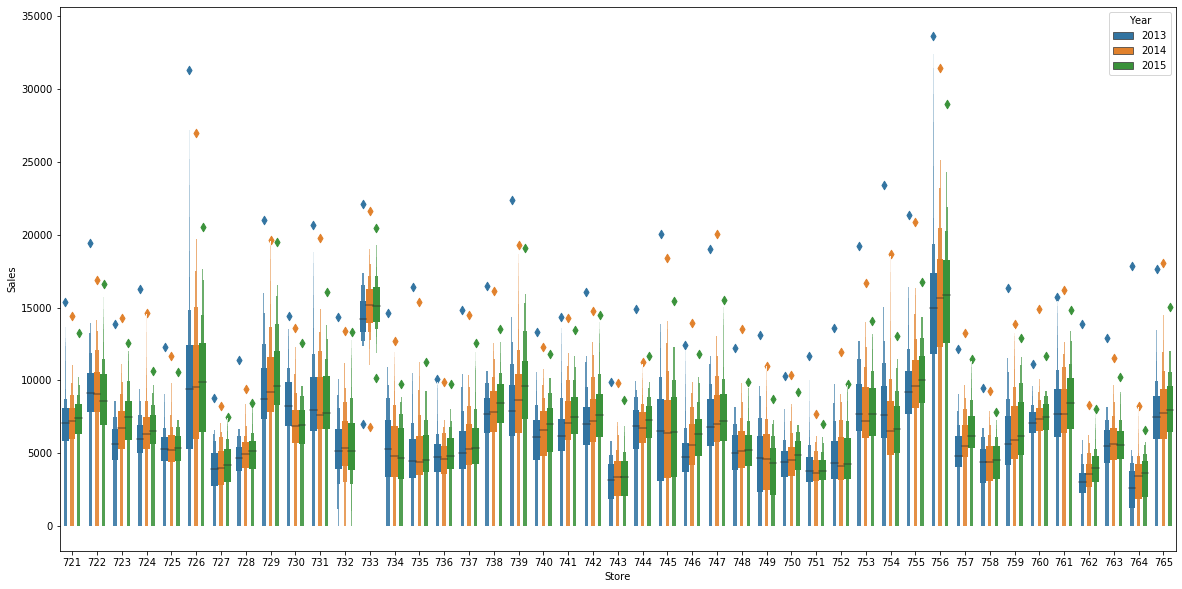

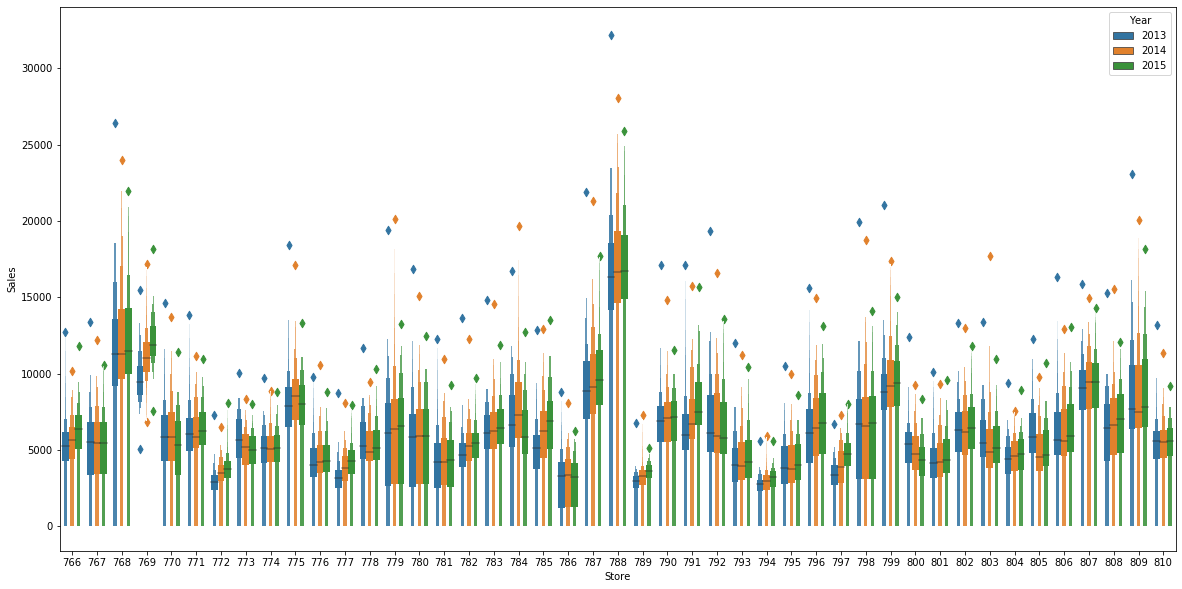

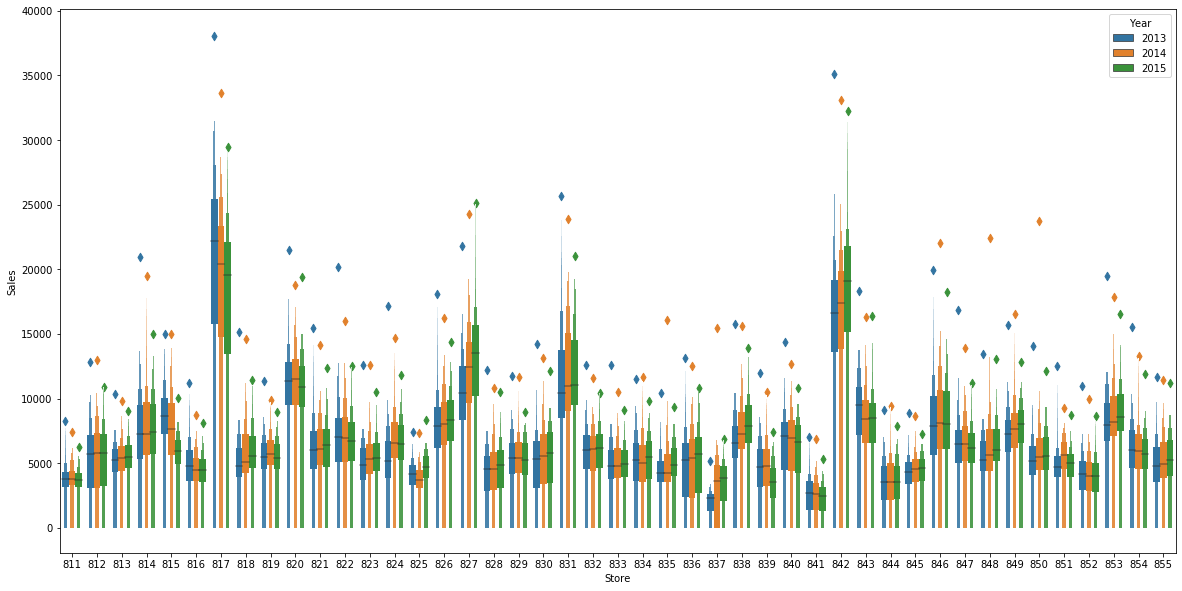

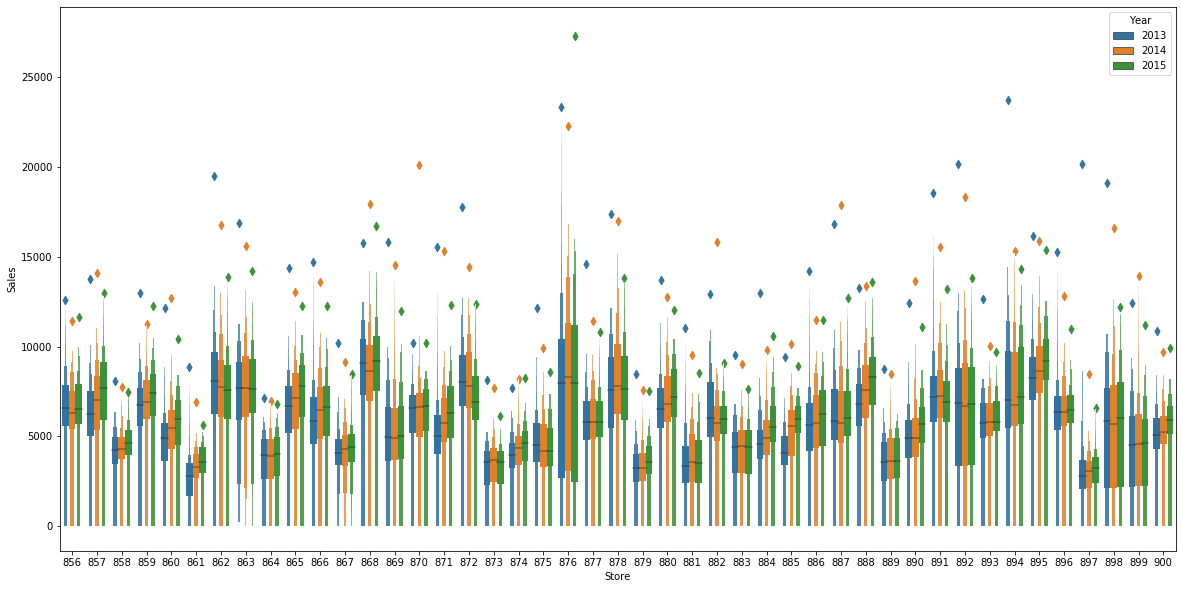

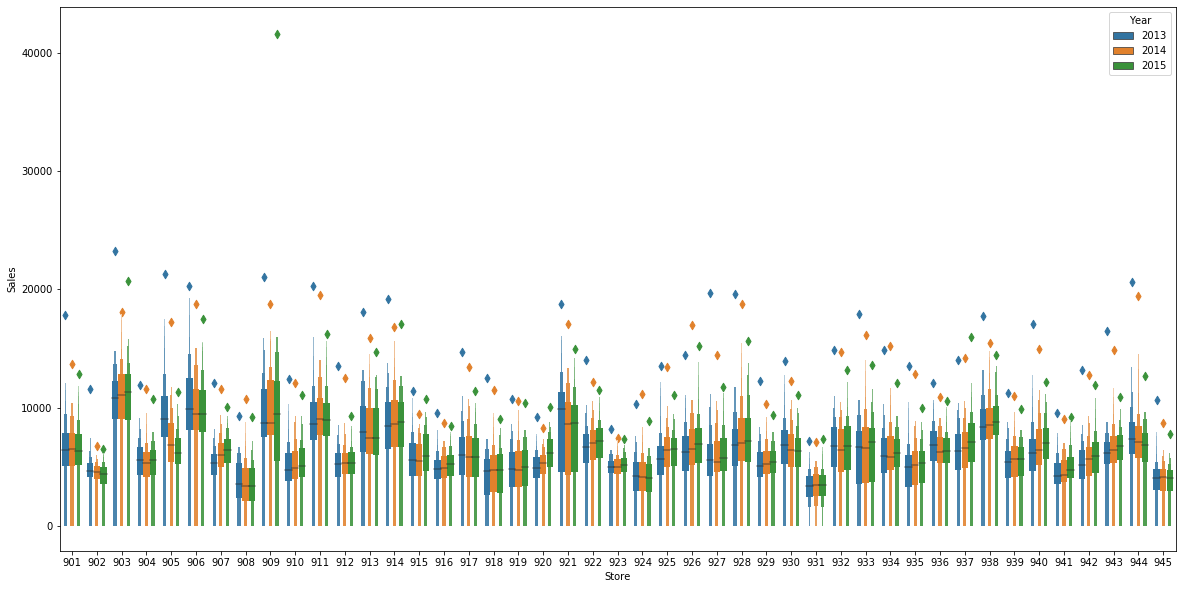

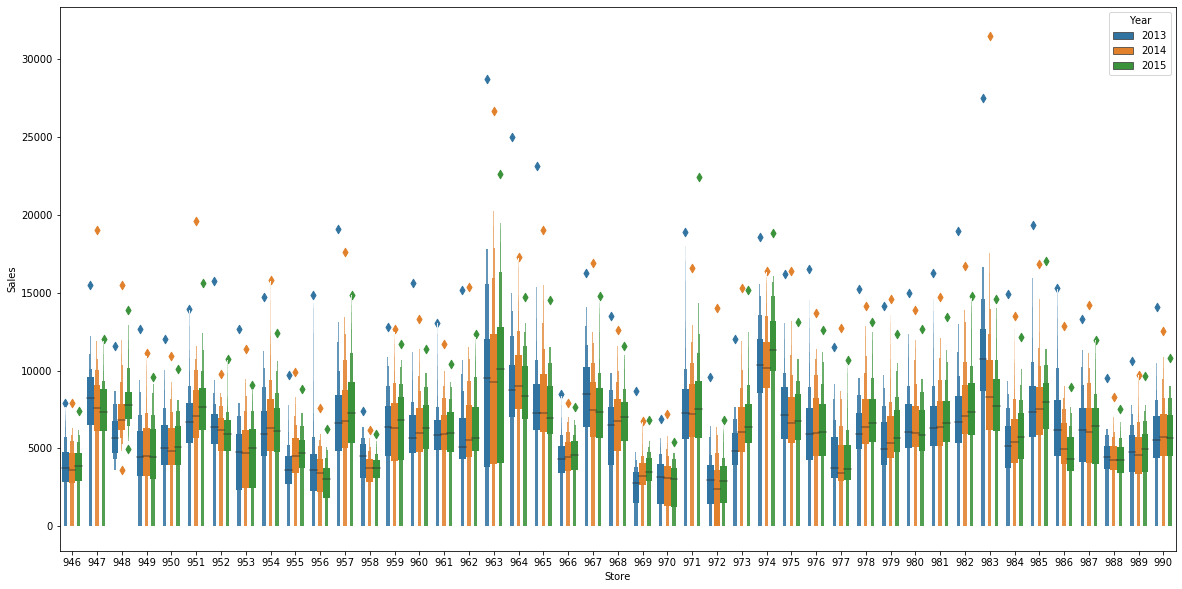

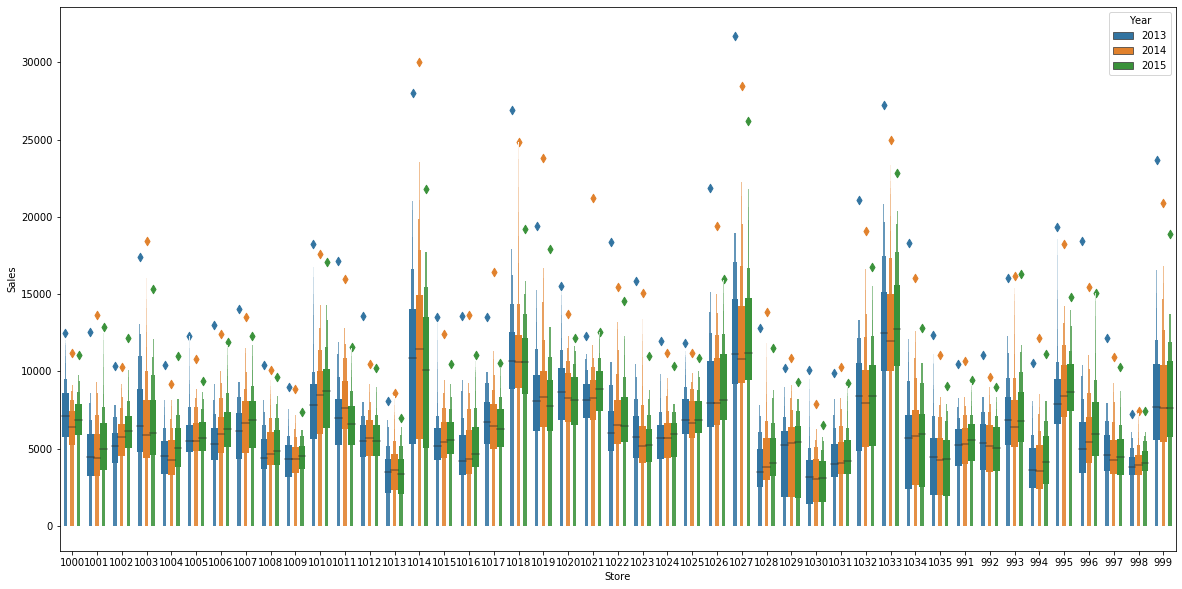

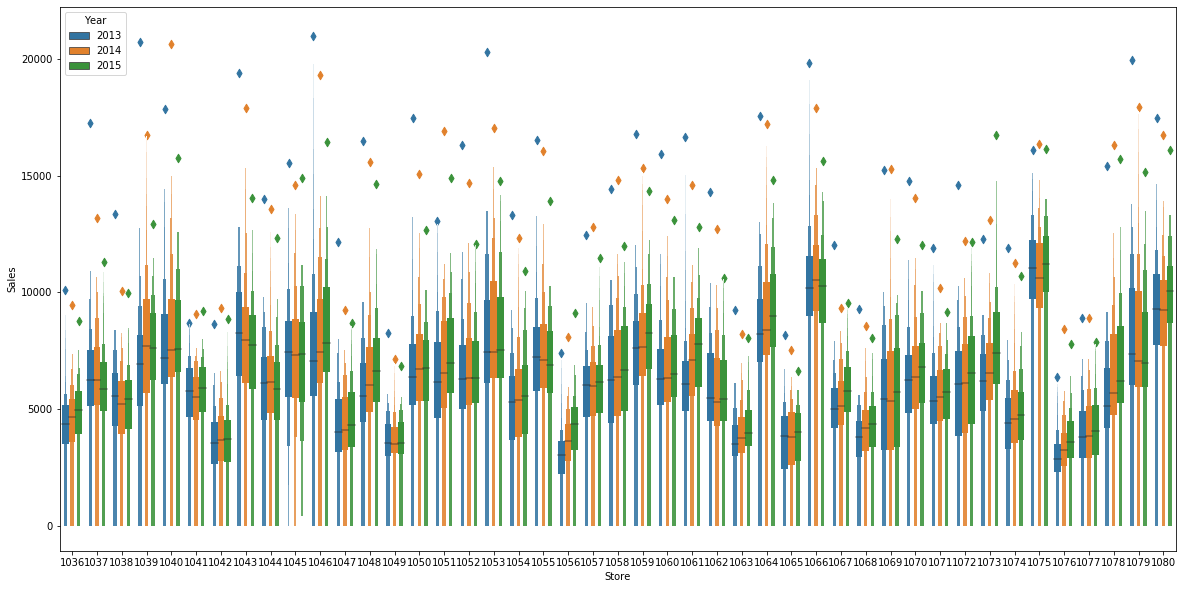

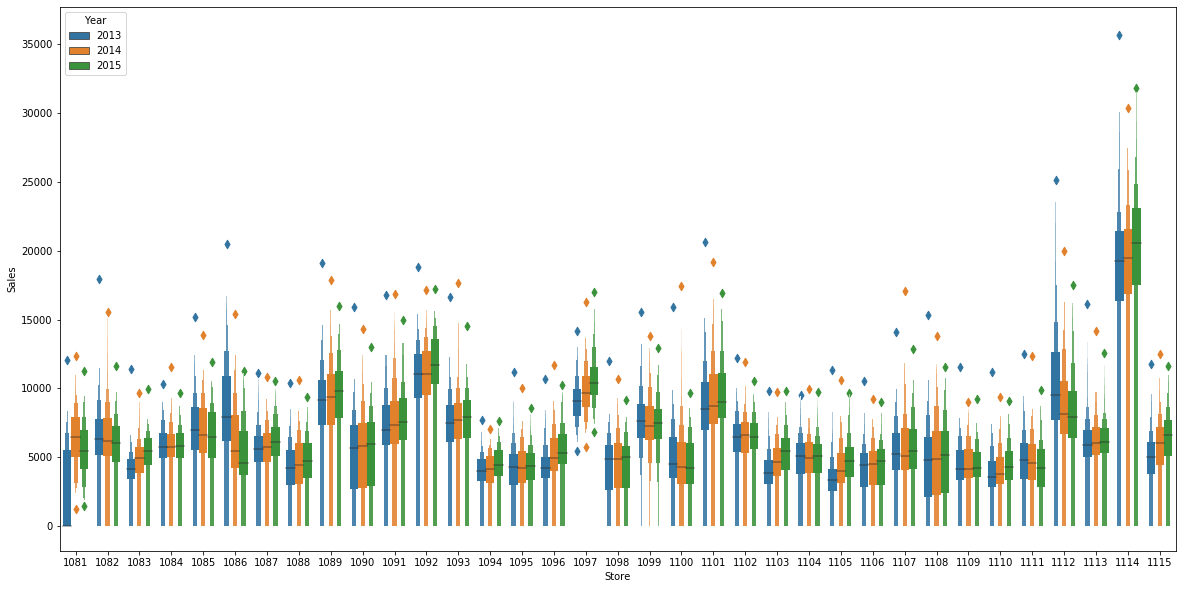

In [26]:
stores = df_train_store_combined['Store'].unique().tolist()
start = 0
steps = 45

i= 0
while start < len(stores):
    df = df_train_store_combined[df_train_store_combined['Store'].isin(stores[start:start+steps])]
    plt.figure(i,figsize=(20, 10))
    sns.boxenplot(x='Store', y='Sales', data=df, hue='Year')
    # print(df)
    start += steps
    i += 1
plt.show()

Most of the stores have increasing sales over the years. Some stores do not have zero sales at all.

In [68]:
df_train_store_combined.groupby('Date')['Sales'].agg(['count','mean','median',pd.Series.mode,'max']).reset_index()

Date  count         mean  median  \
0   2013-01-01   1114    87.284560       0   
1   2013-01-02   1115  6233.030493    5737   
2   2013-01-03   1115  5693.112108    5292   
3   2013-01-04   1115  5954.218834    5623   
4   2013-01-05   1115  5337.751570    5018   
..         ...    ...          ...     ...   
937 2015-07-27   1115  9602.952466    9125   
938 2015-07-28   1115  8174.953363    7760   
939 2015-07-29   1115  7623.284305    7193   
940 2015-07-30   1115  7891.348879    7523   
941 2015-07-31   1115  9067.033184    8568   

                                                  mode    max  
0                                                    0  17267  
1                                                 6676  25357  
2                                                    0  23303  
3                                                    0  21996  
4                                                    0  22521  
..                                                 ...    ...  
937  [0, 4638, 5925, 6045, 6211, 6431, 6805, 6856, ...  27881  
938                           [7506, 7533, 8352, 9263]  25518  
939                                       [5551, 7361]  25840  
940                                               7648  24395  
941                               [9654, 10130, 10141]  27508  

[942 rows x 6 columns]

In [69]:
df_mean_sales_per_date = df_train_store_combined.groupby('Date')['Sales'].agg(['mean']).reset_index()

/home/timbo/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


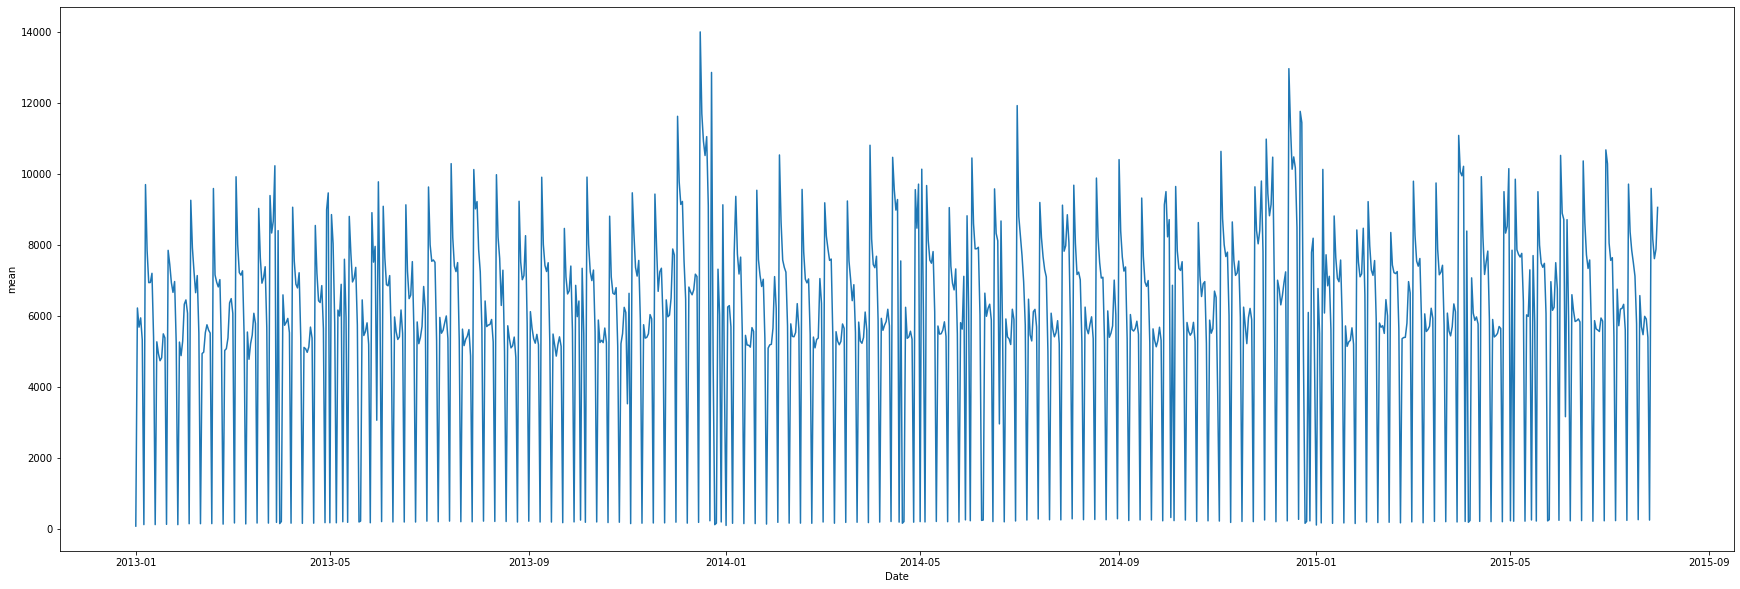

In [70]:
plt.figure(figsize=(30,10))
ax =  sns.lineplot(x='Date', y= 'mean',data=df_mean_sales_per_date)


The highest average sales are in december (christmas).But during the summer time the average sales are also high (remember rossmann is a drug store chain).

In [71]:
df_average_sales_per_month_year = df_train_store_combined.groupby(['Year','Month'])['Sales'].agg('mean').dropna().reset_index()

In [72]:
df_average_sales_per_month_year

Year  Month        Sales
0   2013      1  5211.555578
1   2013      2  5494.371397
2   2013      3  5820.349168
3   2013      4  5483.749836
4   2013      5  5364.127383
5   2013      6  5402.162960
6   2013      7  6042.062260
7   2013      8  5729.574049
8   2013      9  5322.988430
9   2013     10  5429.258788
10  2013     11  5864.601614
11  2013     12  6703.618140
12  2014      1  5431.875799
13  2014      2  5731.091512
14  2014      3  5584.257312
15  2014      4  5815.993333
16  2014      5  5632.670534
17  2014      6  5681.526188
18  2014      7  5999.403381
19  2014      8  5649.421252
20  2014      9  5865.104029
21  2014     10  5665.564878
22  2014     11  6179.249661
23  2014     12  6973.282456
24  2015      1  5752.747866
25  2015      2  5710.296541
26  2015      3  5949.130132
27  2015      4  5916.857578
28  2015      5  5472.122002
29  2015      6  6199.203976
30  2015      7  6142.705511

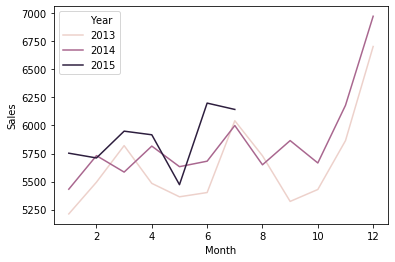

In [73]:
sns.lineplot(x='Month',y='Sales',hue='Year', data=df_average_sales_per_month_year, legend='full')

There is a positive trend on averages sales over the years.

In [74]:
df_average_sales_per_day_month_year = df_train_store_combined.groupby(['Year','Month','Day'])['Sales'].agg('mean').dropna().reset_index()

In [75]:
df_average_sales_per_day_month_year

Year  Month  Day        Sales
0    2013      1    1    87.284560
1    2013      1    2  6233.030493
2    2013      1    3  5693.112108
3    2013      1    4  5954.218834
4    2013      1    5  5337.751570
..    ...    ...  ...          ...
937  2015      7   27  9602.952466
938  2015      7   28  8174.953363
939  2015      7   29  7623.284305
940  2015      7   30  7891.348879
941  2015      7   31  9067.033184

[942 rows x 4 columns]

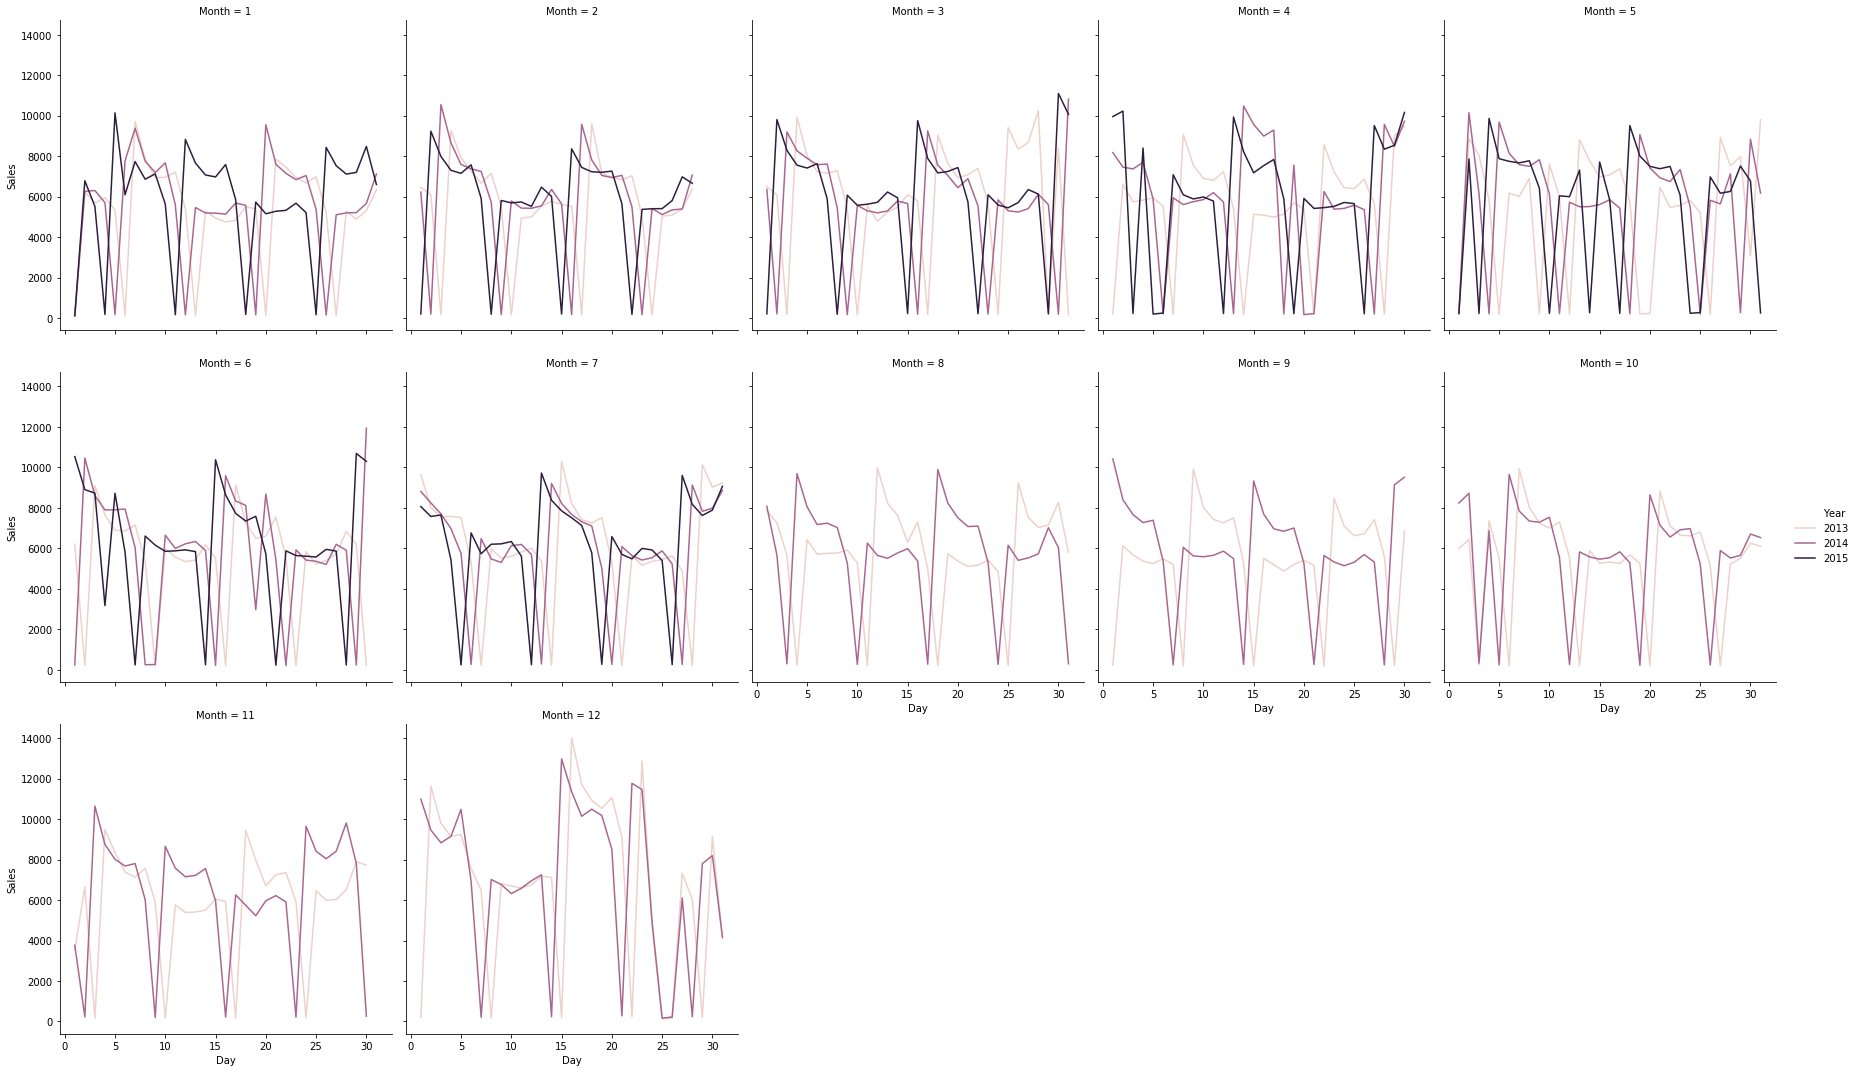

In [76]:
sns.relplot(x='Day',y='Sales',hue='Year',col='Month',data=df_average_sales_per_day_month_year,kind='line',legend='full',col_wrap=5)

The sales behavior looks very similar between the years but shifted by a few days.

In [77]:
df_average_sales_per_dayOfWeek_month_year = df_train_store_combined.groupby(['Year','Month','DayOfWeek'])['Sales'].agg('mean').dropna().reset_index()

In [78]:
df_average_sales_per_dayOfWeek_month_year

Year  Month DayOfWeek        Sales
0    2013      1         1  7029.913004
1    2013      1         2  5047.043416
2    2013      1         3  6035.120000
3    2013      1         4  6097.627265
4    2013      1         5  6411.672422
..    ...    ...       ...          ...
212  2015      7         3  7044.266188
213  2015      7         4  7039.330942
214  2015      7         5  7220.753543
215  2015      7         6  5557.611211
216  2015      7         7   253.492825

[217 rows x 4 columns]

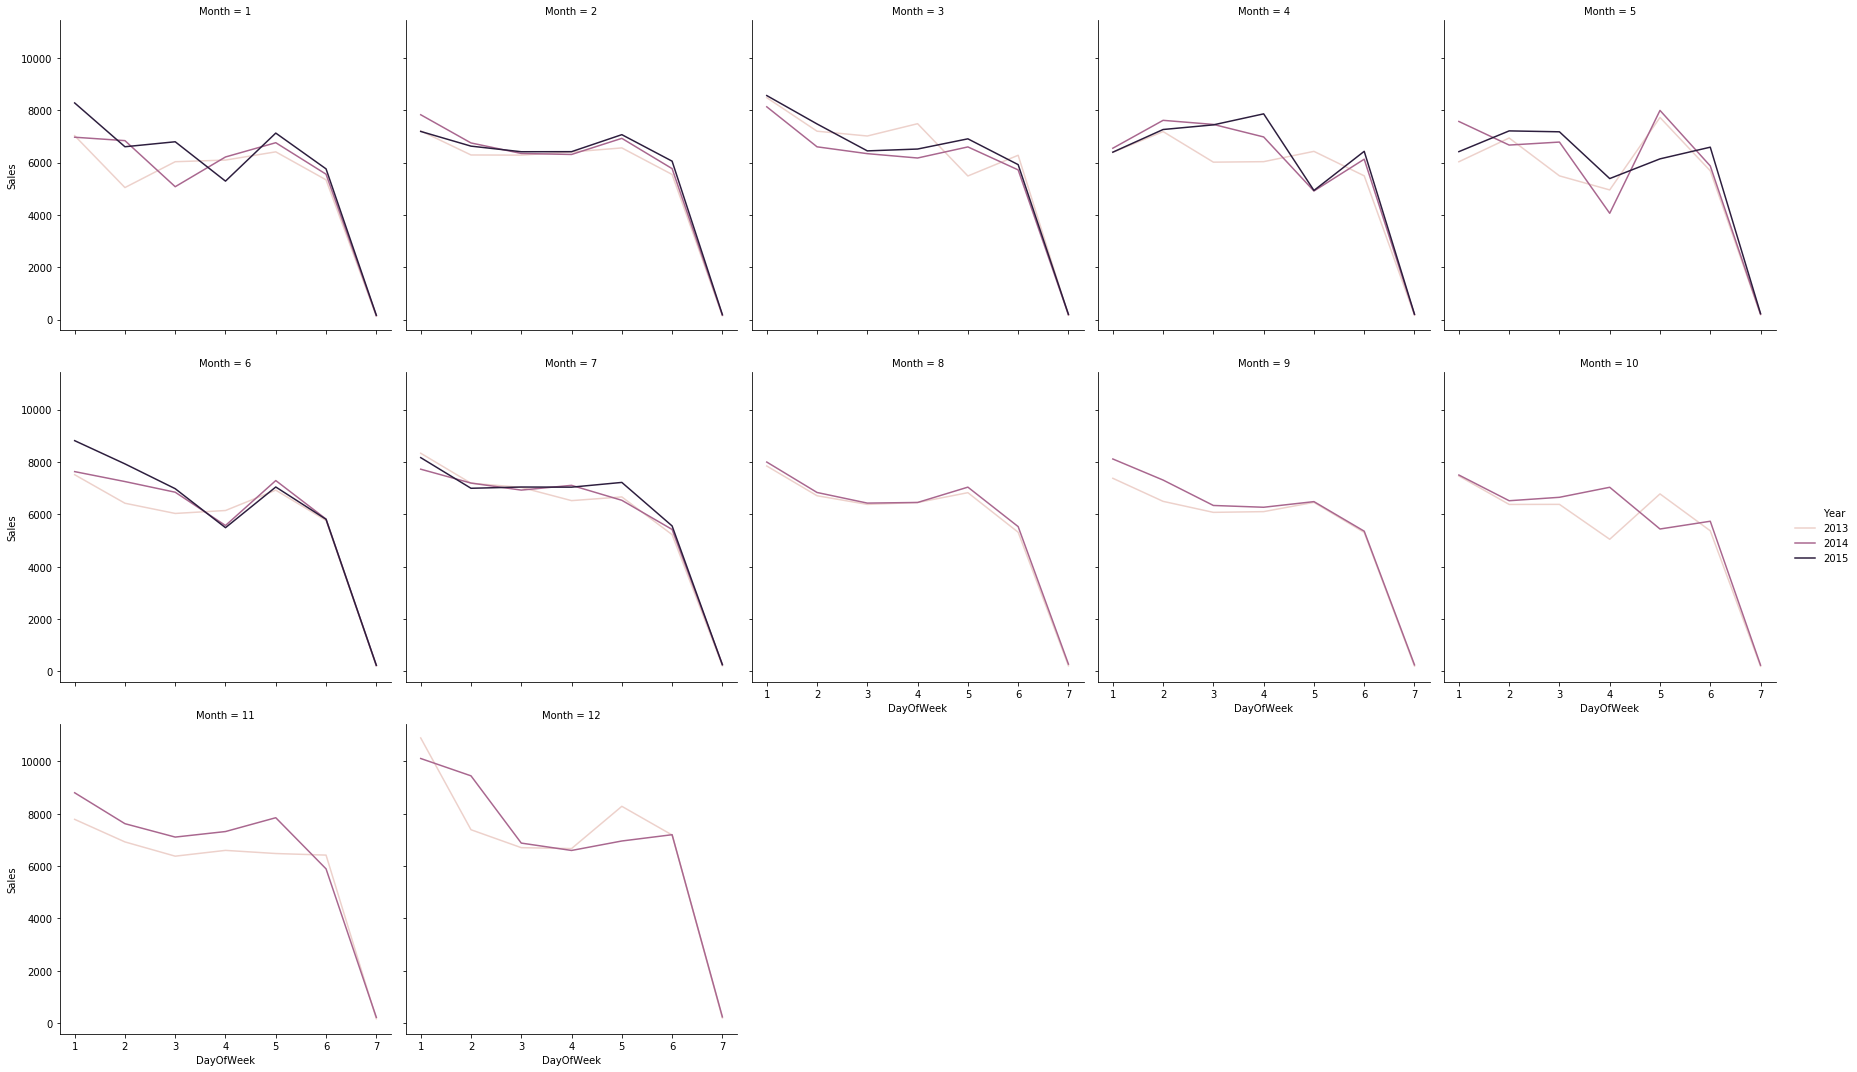

In [79]:
sns.relplot(x='DayOfWeek',y='Sales',hue='Year',col='Month',data=df_average_sales_per_dayOfWeek_month_year,kind='line',legend='full',col_wrap=5)

In most month the highest average sales are at the beginng and at the end of the working work

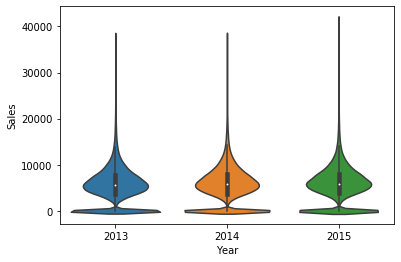

In [80]:
sns.violinplot(x="Year", y="Sales", data=df_train_store_combined)

In [13]:
df_train_store_combined.groupby('Year')['Sales'].agg(['count','mean','std','median',pd.Series.mode,'max'])

count         mean          std  median  mode    max
Year                                                       
2013  406974  5658.533675  3821.166174    5598     0  38025
2014  373855  5833.290704  3883.887435    5794     0  38037
2015  236380  5878.245380  3840.197055    5916     0  41551

In the year 2015 there are higher sales but the distribution looks more or less the same but there is the most data available for the year 2013. No sales is for every year the mode.

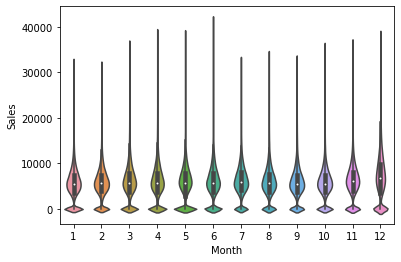

In [12]:
sns.violinplot(x='Month',y='Sales',data=df_train_store_combined)

In [14]:
df_train_store_combined.groupby('Month')['Sales'].agg(['count','mean','std','median',pd.Series.mode,'max'])

count         mean          std  median  mode    max
Month                                                       
1      103694  5465.395529  3572.685233  5483.0     0  32263
2       93660  5645.253150  3519.990270  5610.0     0  31649
3      103695  5784.578871  3871.175081  5750.0     0  36227
4      100350  5738.866916  3940.456503  5718.0     0  38722
5      103695  5489.639973  3983.233069  5717.0     0  38484
6      100350  5760.964375  3909.373300  5729.0     0  41551
7       98115  6064.915711  3640.947610  5953.0     0  32671
8       63550  5693.016554  3556.992585  5633.0     0  33913
9       61500  5570.246033  3542.059830  5504.0     0  32926
10      63550  5537.037419  3541.936004  5567.0     0  35702
11      61500  6008.111821  3829.490315  6081.0     0  36417
12      63550  6826.611377  5045.895452  6727.5     0  38025

The standard deviation of the sales per month is in december the highest

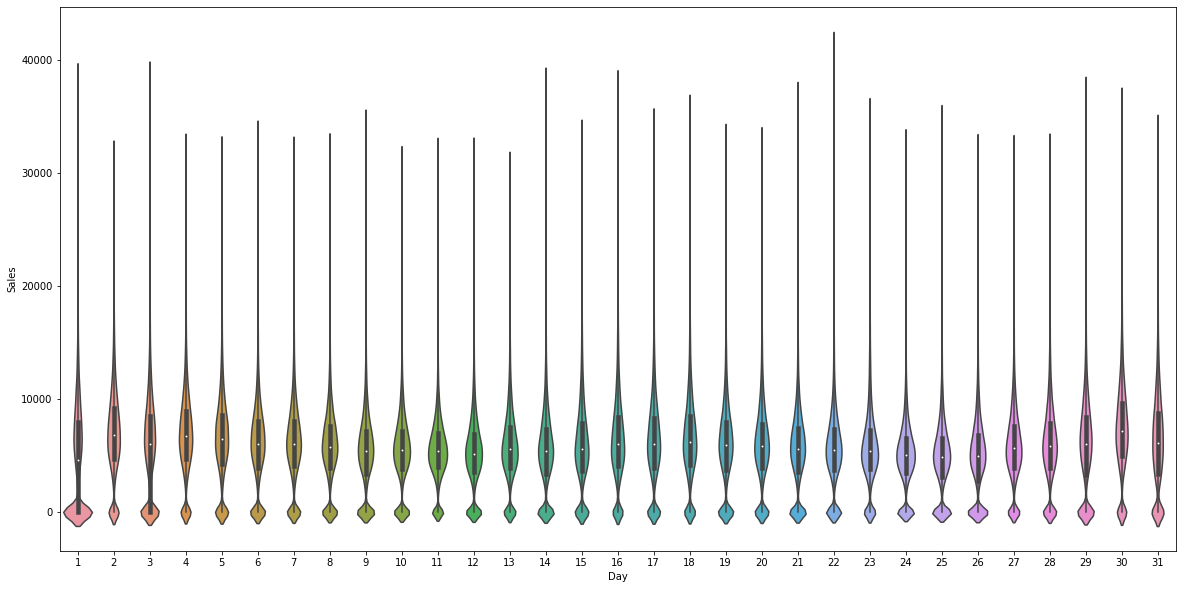

In [18]:
plt.figure(figsize=(20,10))
sns.violinplot(x='Day',y='Sales',data=df_train_store_combined)
plt.show()

In [22]:
df_train_store_combined.groupby('Day')['Sales'].agg(['count','mean','std','median',pd.Series.mode,'max'])

count         mean          std  median  mode    max
Day                                                      
1    33484  4658.450603  4809.327433  4666.5     0  38484
2    33485  6973.664895  4183.176580  6872.0     0  31803
3    33485  5811.044109  4442.675384  6075.0     0  38722
4    33485  6818.008362  3946.849545  6769.0     0  32469
5    33485  6357.150246  3997.581136  6453.0     0  32228
6    33485  5886.054621  3821.120433  6054.0     0  33655
7    33485  6014.050679  3742.199368  6082.0     0  32263
8    33485  5665.783784  3552.666383  5794.0     0  32605
9    33485  5253.768165  3556.090028  5398.0     0  34692
10   33485  5406.580947  3348.126012  5493.0     0  31527
11   33485  5476.275616  2980.758868  5411.0     0  32347
12   33485  5203.584321  3359.532720  5202.0     0  32271
13   33485  5741.517605  3467.258700  5602.0     0  30993
14   33485  5381.010303  3694.051480  5399.0     0  38367
15   33485  5831.355980  4035.902077  5639.0     0  33684
16   33485  6378.768673  4118.490541  6082.0     0  38037
17   33485  6124.261341  4018.491719  6049.0     0  34692
18   33485  6370.260326  3944.760566  6233.0     0  35909
19   33485  5826.518113  3876.583741  5930.0     0  33357
20   33485  5839.835986  3773.314118  5832.0     0  33093
21   33485  5454.107989  3639.912355  5594.0     0  37122
22   33485  5470.293743  3575.651616  5481.0     0  41551
23   33485  5674.454263  3623.707410  5421.0     0  35697
24   33485  4975.415350  3131.090767  5032.0     0  33071
25   33485  4823.639809  3313.082858  4913.0     0  35159
26   33485  4837.208541  3501.185332  4950.0     0  32547
27   33485  5801.549321  3500.505789  5674.0     0  32461
28   33485  5881.821622  3739.805264  5846.0     0  32529
29   30140  5876.384837  4214.515364  6052.0     0  37403
30   30140  7297.266656  4336.560999  7215.0     0  36417
31   19350  6235.653178  4355.448391  6167.0     0  33913

The day has an effect on the sales (payment at the beginning, in the middle and at the end of the month)

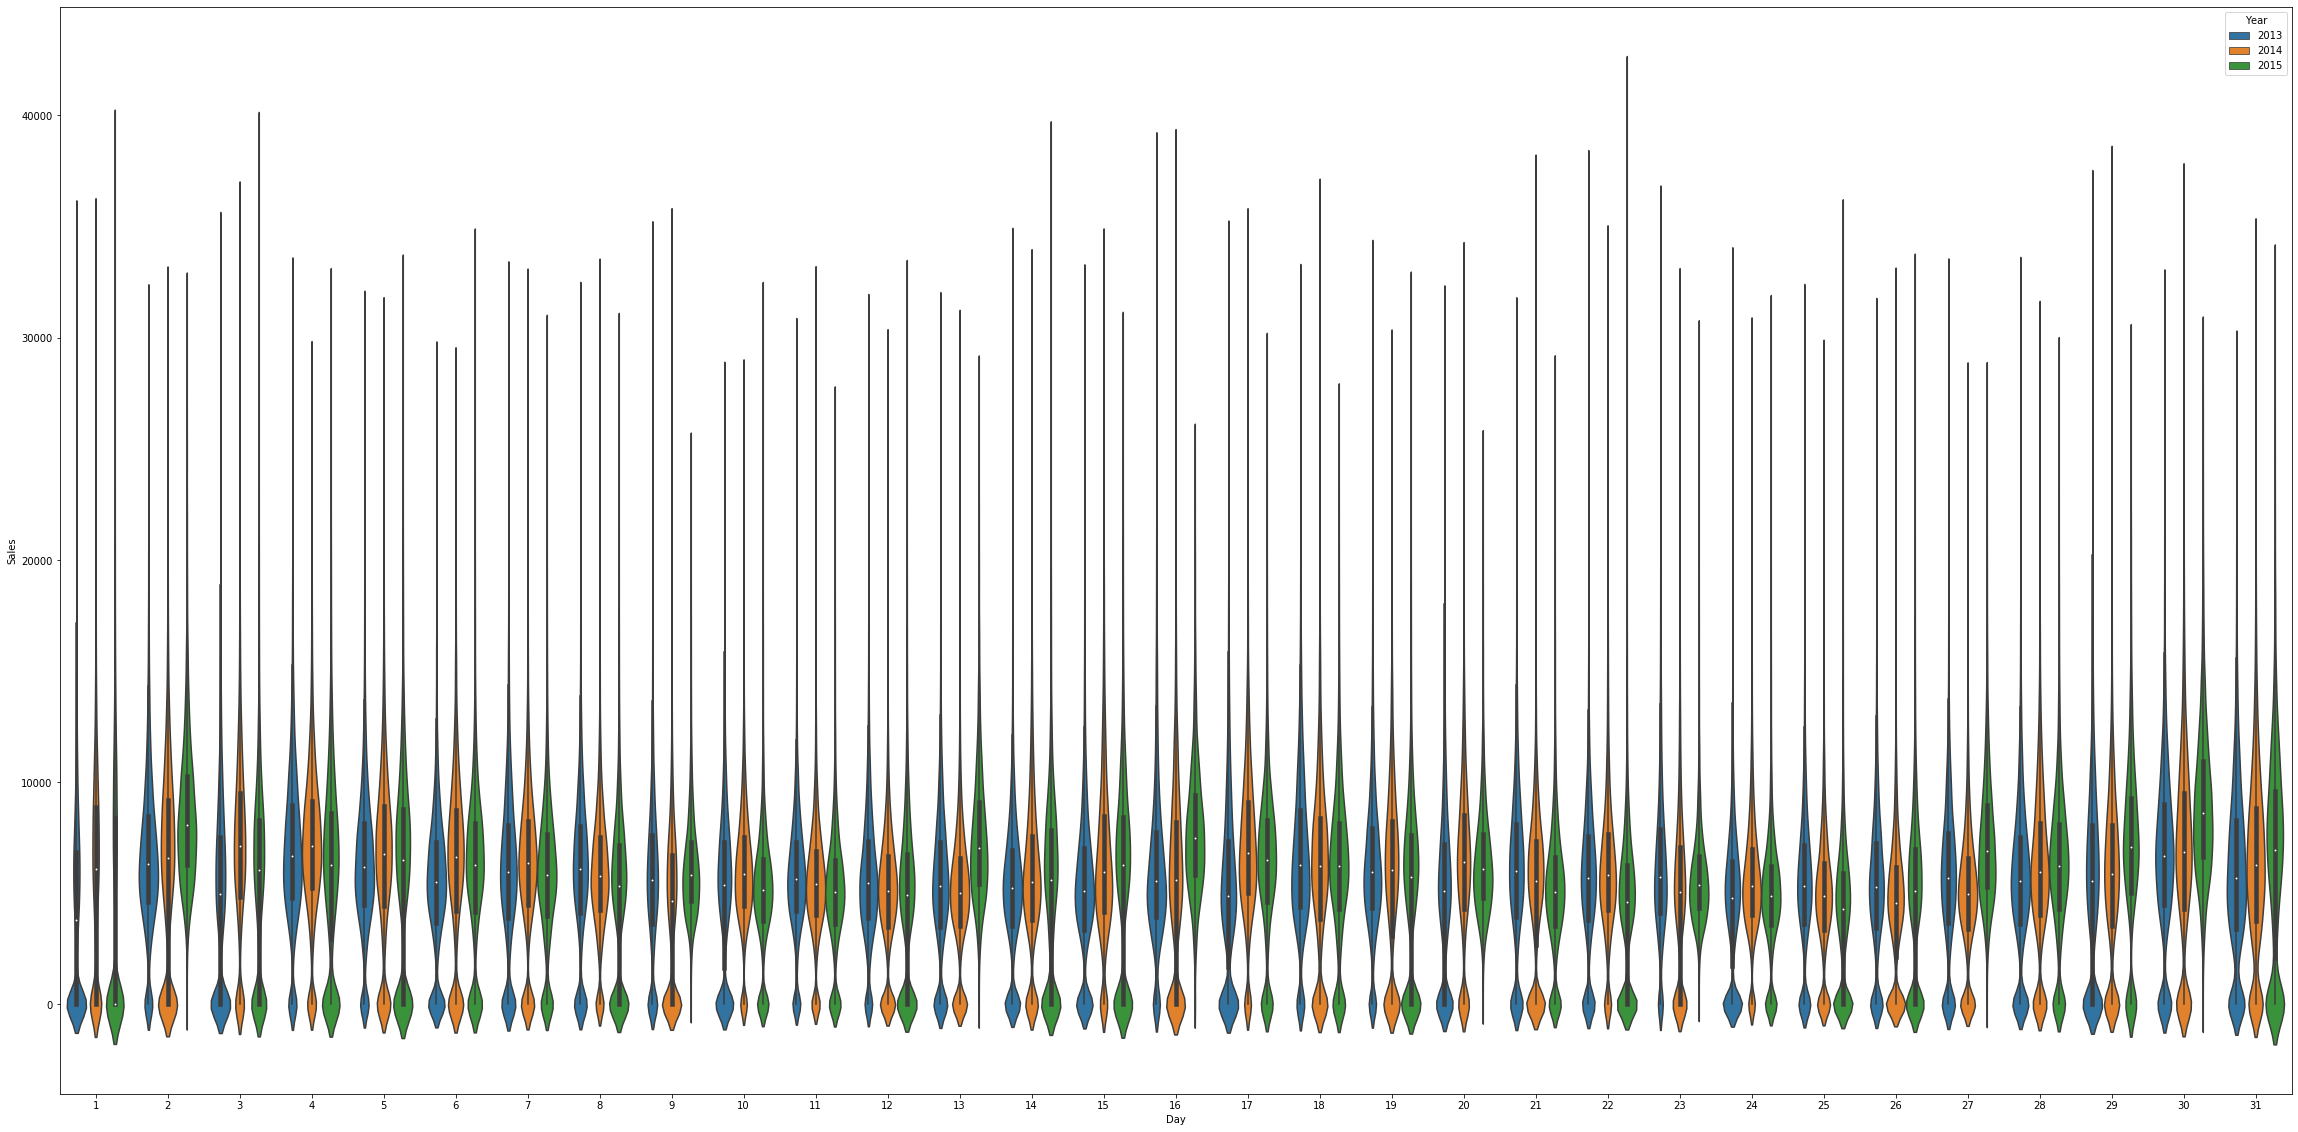

In [20]:
plt.figure(figsize=(40,20))
sns.violinplot(x='Day',y='Sales',hue='Year',data=df_train_store_combined)
plt.show()

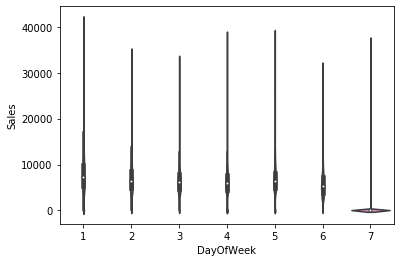

In [23]:
sns.violinplot(x='DayOfWeek',y='Sales',data=df_train_store_combined)

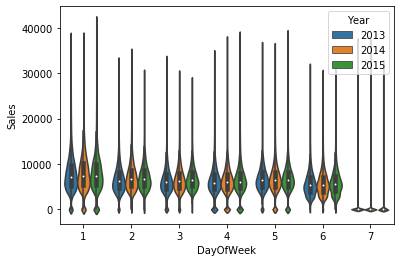

In [25]:
sns.violinplot(x='DayOfWeek',y='Sales',data=df_train_store_combined,hue='Year')

In [24]:
df_train_store_combined.groupby('DayOfWeek')['Sales'].agg(['count','mean','std','median',pd.Series.mode,'max'])

count         mean          std  median  mode    max
DayOfWeek                                                       
1          144730  7809.044510  4016.526273    7310     0  41551
2          145664  7005.244467  3142.039607    6463     0  34692
3          145665  6555.884138  2944.377501    6133     0  33151
4          145845  6247.575913  3209.806360    6020     0  38367
5          145845  6723.274305  3101.006008    6434     0  38722
6          144730  5847.562599  2873.985615    5410     0  31683
7          144730   204.183189  1613.243517       0     0  37376

day of week has an effect on sales but it also depends on the month (see below)

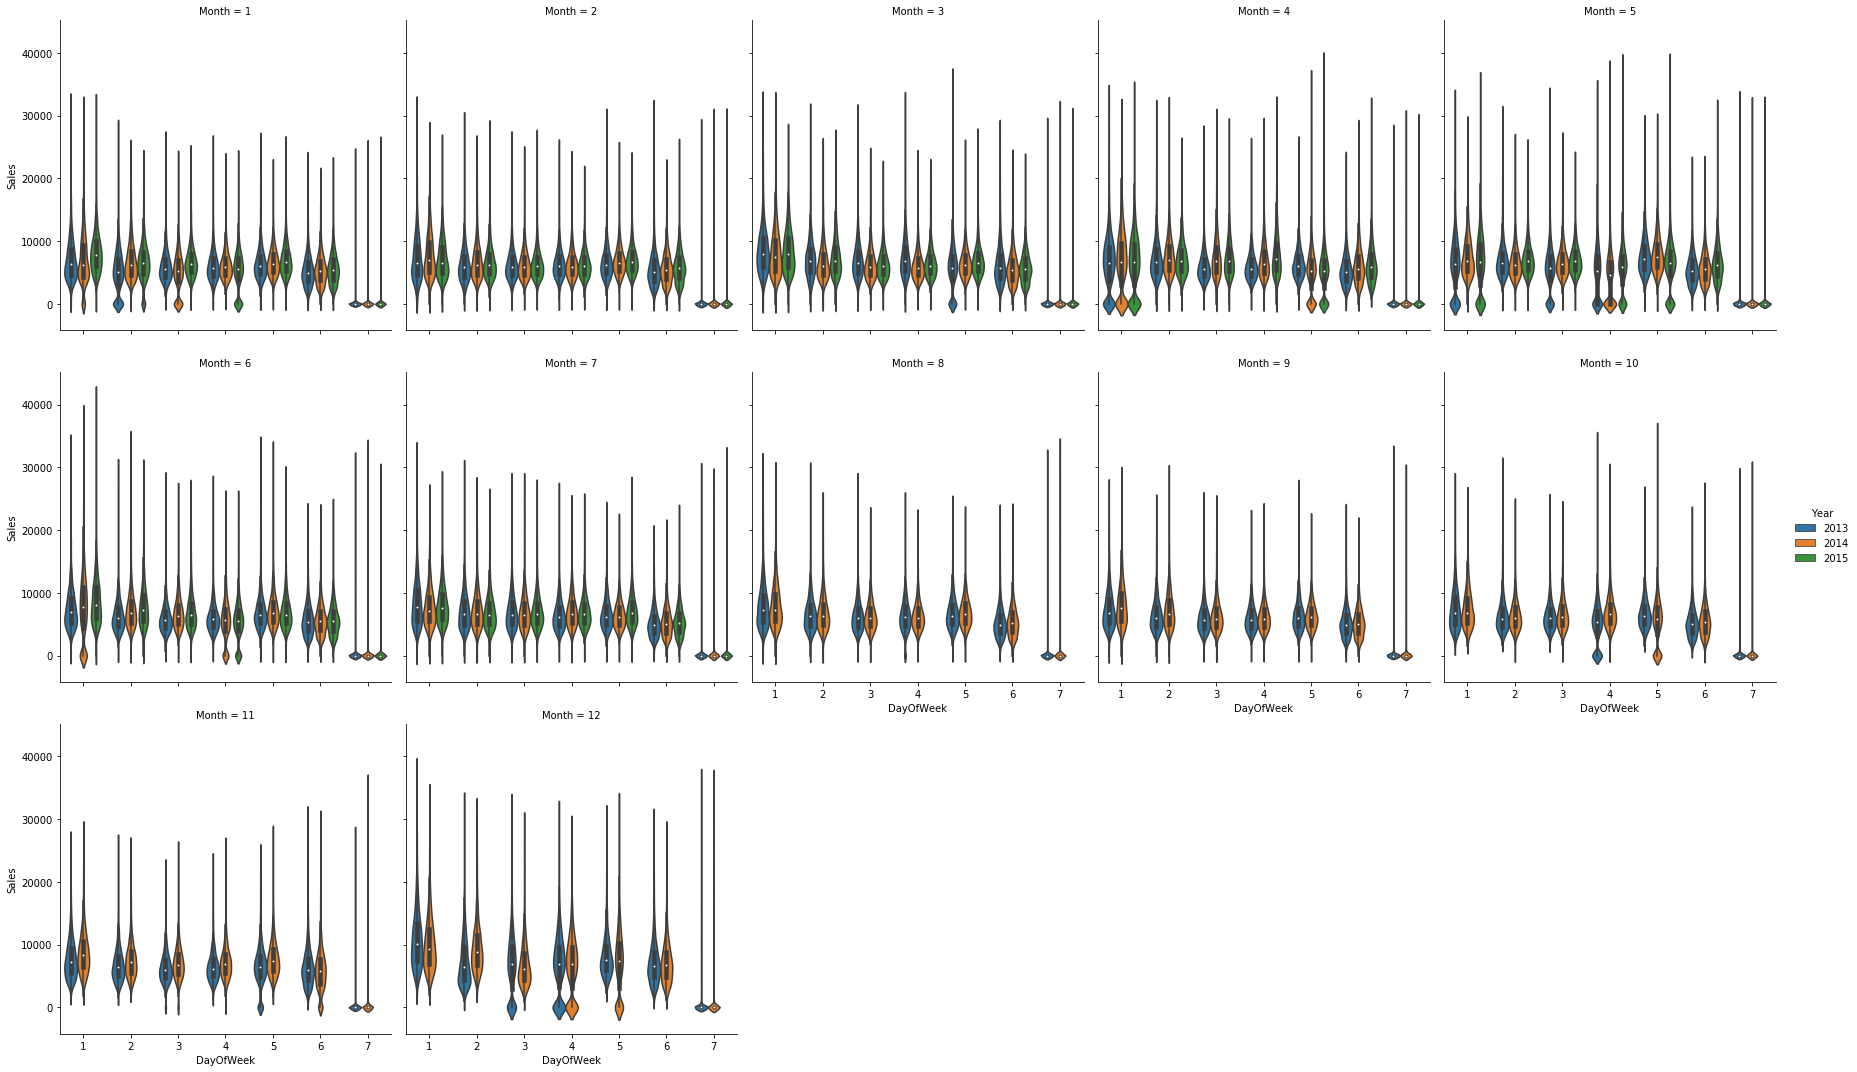

In [31]:
sns.catplot(x='DayOfWeek',y='Sales',data=df_train_store_combined,hue='Year',col='Month',kind='violin',col_wrap=5)

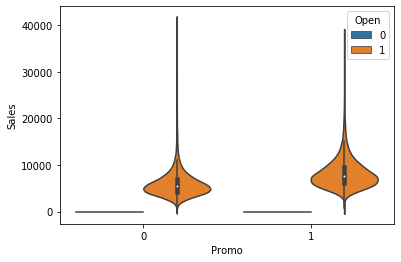

In [89]:
sns.violinplot(x='Promo',y='Sales',data=df_train_store_combined, hue='Open')
plt.show()

In [96]:
df_train_store_combined.groupby('Promo')['Sales'].agg(['count',pd.Series.mode,'median','mean','std','min','max','sum'])

count  mode  median         mean          std  min    max         sum
Promo                                                                        
0      629129     0    4622  4406.050805  3442.450020    0  41551  2771974337
1      388080     0    7553  7991.152046  3419.025495    0  38722  3101206286

If there is a promo the sales are higher

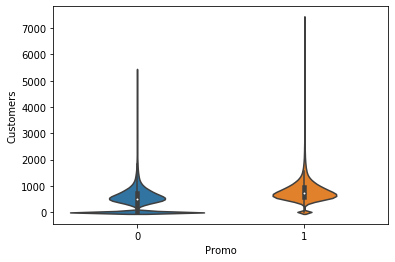

In [97]:
sns.violinplot(x='Promo',y='Customers',data=df_train_store_combined)

In [64]:
df_train_store_combined.groupby('Promo')['Customers'].agg(['count',pd.Series.mode,'median','mean','std','min','max','sum']).reset_index()

Promo   count  mode  median        mean         std  min   max        sum
0     0  629129     0     512  517.823542  452.881419    0  5387  325777807
1     1  388080     0     747  820.098815  419.897191    0  7388  318263948

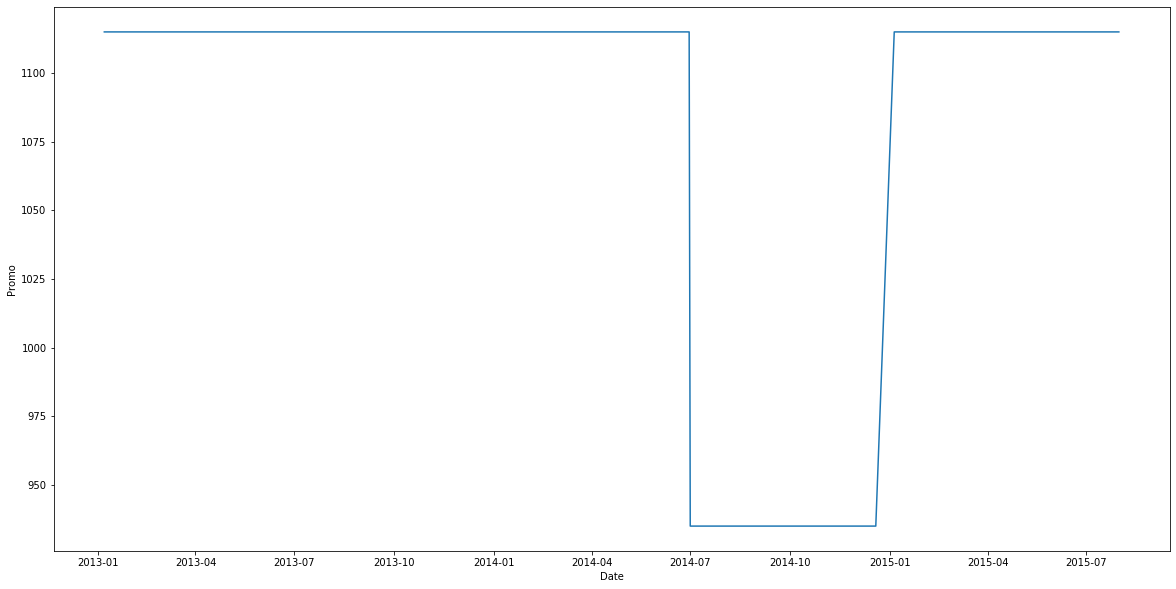

In [63]:
plt.figure(figsize=(20,10))
sns.lineplot(x='Date',y='Promo',data=df_train_store_combined[df_train_store_combined['Promo'] == '1'].groupby('Date')['Promo'].count().reset_index())
plt.show()

The number of promos decreases in the second half of 2014

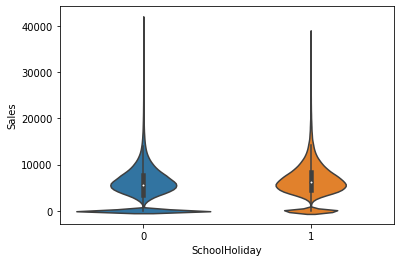

In [15]:
sns.violinplot(x='SchoolHoliday',y='Sales',data=df_train_store_combined)

In [18]:
df_train_store_combined.groupby('SchoolHoliday')['Sales'].agg(['count',pd.Series.mode,'median','mean','std','min','max','sum'])

count  mode  median         mean          std  min    max  \
SchoolHoliday                                                               
0              835488     0    5642  5620.979034  3862.873159    0  41551   
1              181721     0    6197  6476.522207  3709.677337    0  38367   

                      sum  
SchoolHoliday              
0              4696260531  
1              1176920092

School holiday has an effect on sales

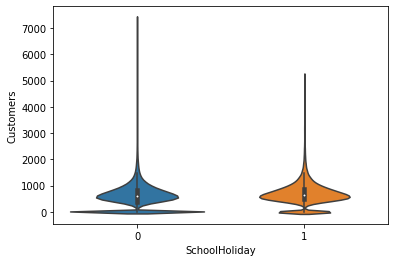

In [20]:
sns.violinplot(x='SchoolHoliday',y='Customers',data=df_train_store_combined)

In [21]:
df_train_store_combined.groupby('SchoolHoliday')['Customers'].agg(['count',pd.Series.mode,'median','mean','std','min','max','sum'])

count  mode  median        mean         std  min   max  \
SchoolHoliday                                                            
0              835488     0     599  617.645174  466.574720    0  7388   
1              181721     0     654  704.412941  447.478907    0  5192   

                     sum  
SchoolHoliday             
0              516035131  
1              128006624

On school holiday the average number of customers is higher 

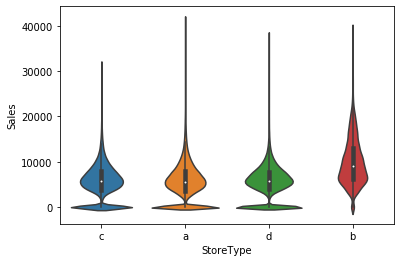

In [25]:
sns.violinplot(x='StoreType',y='Sales',data=df_train_store_combined)

In [26]:
df_train_store_combined.groupby('StoreType')['Sales'].agg(['count',pd.Series.mode,'median','mean','std','min','max','sum'])

count  mode  median          mean          std  min    max  \
StoreType                                                                
a          551627     0  5618.0   5738.179710  3964.028134    0  41551   
b           15830     0  9025.5  10058.837334  5280.525506    0  38722   
c          136840     0  5766.0   5723.629246  3721.700886    0  31448   
d          312912     0  5826.0   5641.819243  3473.393781    0  38037   

                  sum  
StoreType              
a          3165334859  
b           159231395  
c           783221426  
d          1765392943

There is a different effect between the different store types on the sales. Type b has fewer zero sales but higher sales on average.

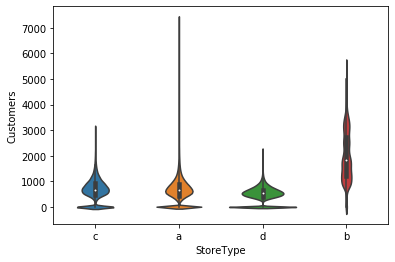

In [27]:
sns.violinplot(x='StoreType',y='Customers',data=df_train_store_combined)

In [28]:
df_train_store_combined.groupby('StoreType')['Customers'].agg(['count',pd.Series.mode,'median','mean','std','min','max','sum'])

count  mode  median         mean         std  min   max        sum
StoreType                                                                     
a          551627     0     647   659.034880  462.930320    0  7388  363541434
b           15830     0    1820  1987.720846  940.088627    0  5494   31465621
c          136840     0     682   673.265894  430.708776    0  3096   92129705
d          312912     0     530   501.434892  292.301770    0  2239  156904995

Type b has also more customers on average.

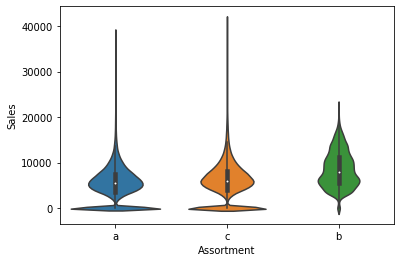

In [29]:
sns.violinplot(x='Assortment',y='Sales',data=df_train_store_combined)

In [31]:
df_train_store_combined.groupby('Assortment')['Sales'].agg(['count',pd.Series.mode,'median','mean','std','min','max','sum'])

count  mode  median         mean          std  min    max  \
Assortment                                                               
a           537445     0  5463.0  5481.026096  3682.766186    0  38722   
b             8294     0  8026.5  8553.931999  3882.418206    0  22137   
c           471470     0  6039.0  6058.676567  3992.255662    0  41551   

                   sum  
Assortment              
a           2945750070  
b             70946312  
c           2856484241

assortment level 'extra' has not many counts but the highest sales on average

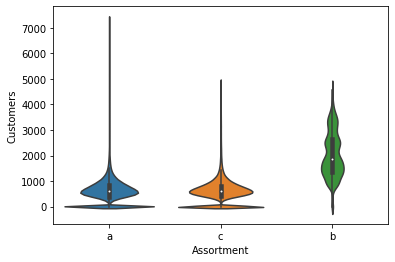

In [32]:
sns.violinplot(x='Assortment',y='Customers',data=df_train_store_combined)

In [33]:
df_train_store_combined.groupby('Assortment')['Customers'].agg(['count',pd.Series.mode,'median','mean','std','min','max','sum'])

count  mode  median         mean         std  min   max  \
Assortment                                                             
a           537445     0   603.0   619.164636  440.713326    0  7388   
b             8294     0  1879.5  2046.361828  867.681445    0  4645   
c           471470     0   609.0   624.222733  441.865660    0  4911   

                  sum  
Assortment             
a           332766938  
b            16972525  
c           294302292

The number of customers is more evenly spread across assortment level 'b'

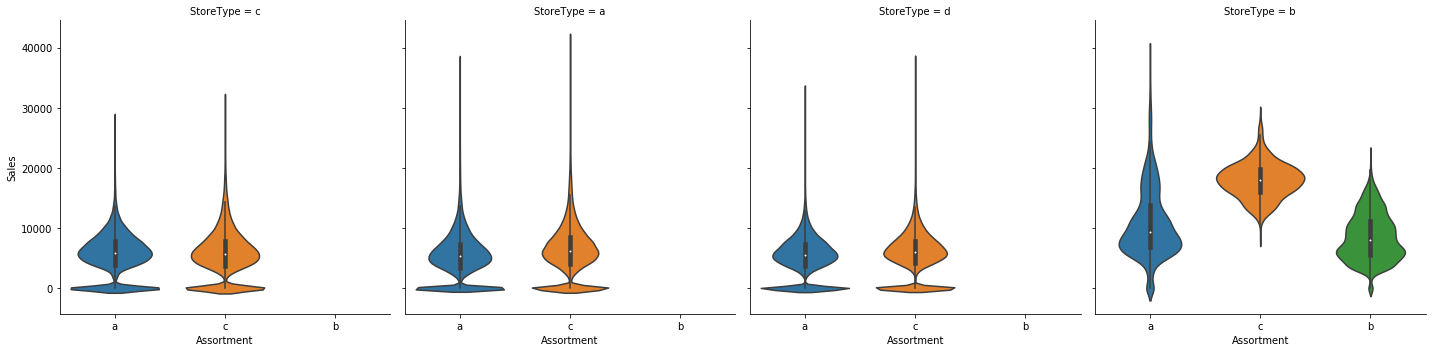

In [34]:
sns.catplot(x='Assortment',y='Sales',data=df_train_store_combined,kind='violin',col='StoreType')

In [37]:
df_train_store_combined.groupby(['StoreType','Assortment'])['Sales'].agg(['count',pd.Series.mode,'median','mean','std','min','max','sum'])

count  \
StoreType Assortment           
a         a           346389   
          c           205238   
b         a             6594   
          b             8294   
          c              942   
c         a            70878   
          c            65962   
d         a           113584   
          c           199328   

                                                                   mode  \
StoreType Assortment                                                      
a         a                                                           0   
          c                                                           0   
b         a                                                           0   
          b                                                           0   
          c           [11848, 13096, 13994, 14422, 15860, 15947, 161...   
c         a                                                           0   
          c                                                           0   
d         a                                                           0   
          c                                                           0   

                       median          mean          std   min    max  \
StoreType Assortment                                                    
a         a            5312.0   5398.858310  3722.911193     0  38025   
          c            6176.0   6310.867032  4280.123003     0  41551   
b         a            9389.0  10821.619806  5864.048965     0  38722   
          b            8026.5   8553.931999  3882.418206     0  22137   
          c           18029.5  17969.556263  2931.927599  8498  28680   
c         a            5841.0   5647.174314  3483.833839     0  28242   
          c            5688.0   5805.782193  3959.789883     0  31448   
d         a            5507.0   5317.885943  3258.385659     0  33071   
          c            6008.0   5826.407660  3577.069398     0  38037   

                             sum  
StoreType Assortment              
a         a           1870105131  
          c           1295229728  
b         a             71357761  
          b             70946312  
          c             16927322  
c         a            400260421  
          c            382961005  
d         a            604026757  
          c           1161366186

Only store type 'b' has assortment level 'b'. Only for this store type the distribution between the different assortment levels has a different effect on the sales. Especially assortment level 'c' has a higher effect on sales and has no zero sales.

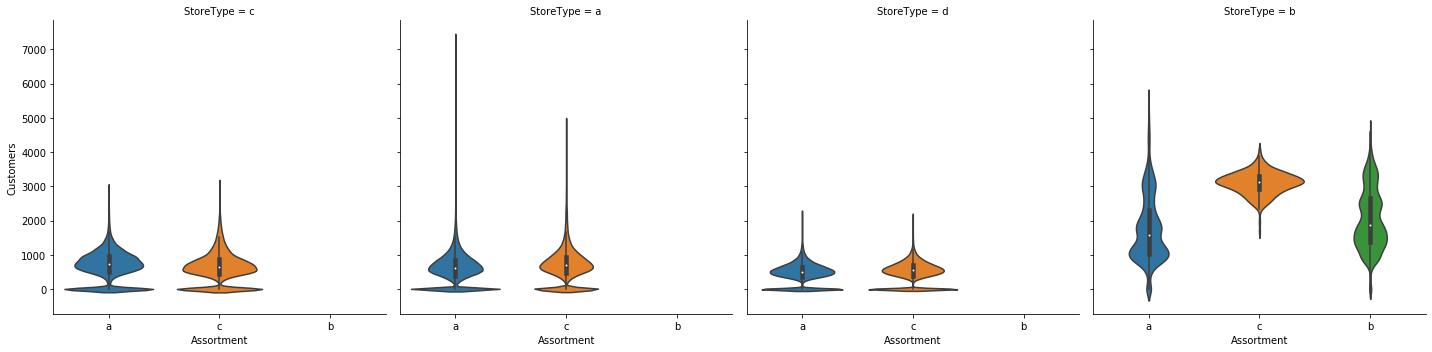

In [38]:
sns.catplot(x='Assortment',y='Customers',data=df_train_store_combined,kind='violin',col='StoreType')

In [39]:
df_train_store_combined.groupby(['StoreType','Assortment'])['Customers'].agg(['count',pd.Series.mode,'median','mean','std','min','max','sum'])

count  mode  median         mean         std   min  \
StoreType Assortment                                                        
a         a           346389     0   619.0   626.995179  434.197268     0   
          c           205238     0   692.0   713.109663  503.144392     0   
b         a             6594     0  1574.0  1754.342736  960.246893     0   
          b             8294     0  1879.5  2046.361828  867.681445     0   
          c              942  3268  3127.0  3105.053079  330.297276  1663   
c         a            70878     0   724.0   693.913584  423.286588     0   
          c            65962     0   639.0   651.079379  437.462481     0   
d         a           113584     0   507.0   482.738431  285.779549     0   
          c           199328     0   544.0   512.088783  295.426028     0   

                       max        sum  
StoreType Assortment                   
a         a           7388  217184233  
          c           4911  146357201  
b         a           5494   11568136  
          b           4645   16972525  
          c           4099    2924960  
c         a           2976   49183207  
          c           3096   42946498  
d         a           2239   54831362  
          c           2153  102073633

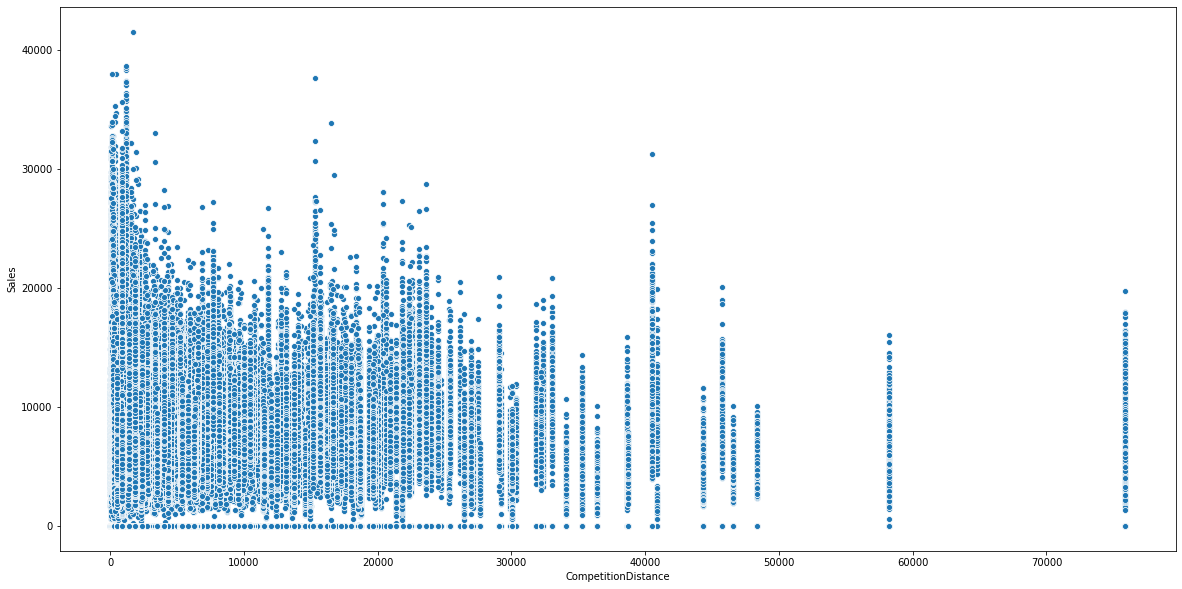

In [49]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='CompetitionDistance',y='Sales',data=df_train_store_combined)
plt.show()

It looks like whether 'CompetitionDistance' is categorical

In [44]:
len(df_train_store_combined['CompetitionDistance'].unique())

655

There are only 655 different distance values

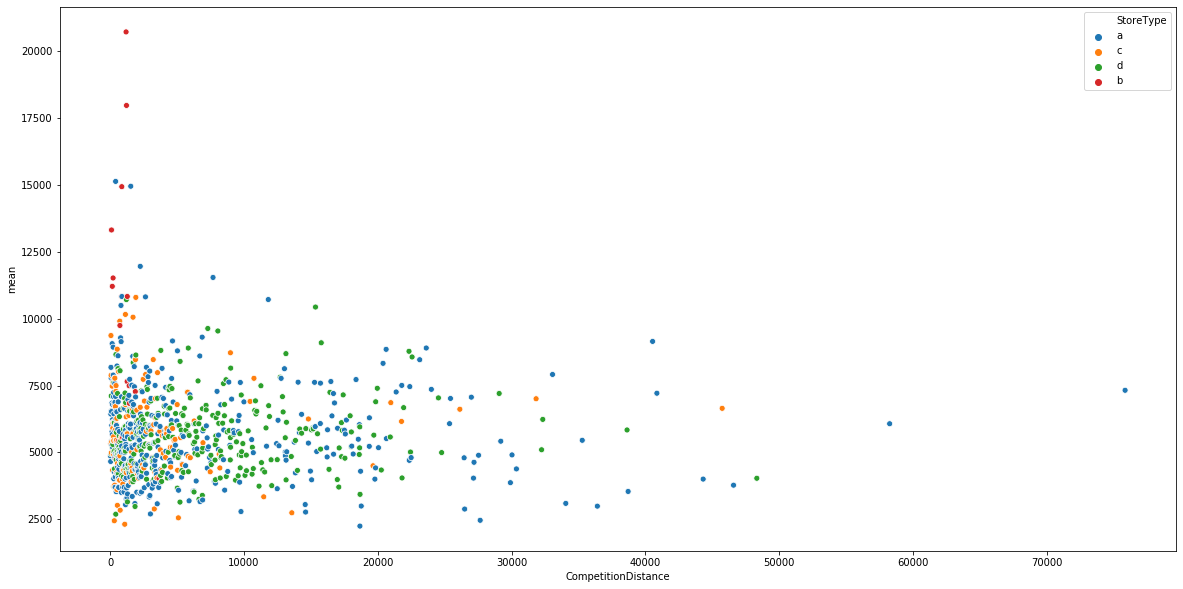

In [51]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='CompetitionDistance',y='mean',data=df_train_store_combined.groupby(['CompetitionDistance','StoreType'])['Sales'].agg(['count',pd.Series.mode,'median','mean','std','min','max','sum']).reset_index(),
               hue='StoreType')
plt.show()

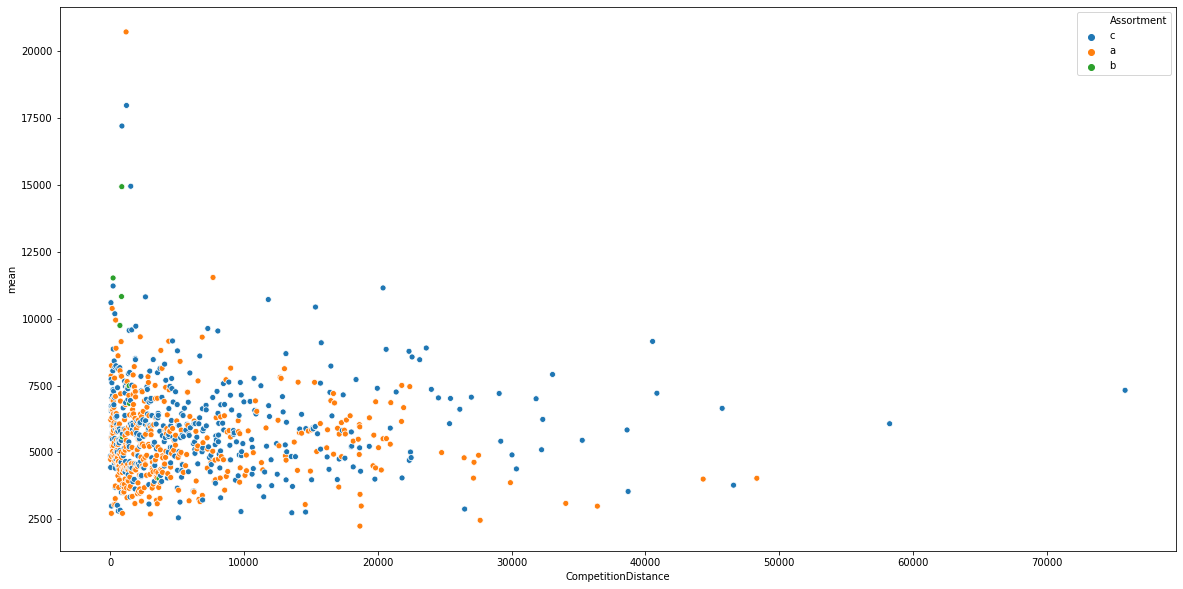

In [52]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='CompetitionDistance',y='mean',data=df_train_store_combined.groupby(['CompetitionDistance','Assortment'])['Sales'].agg(['count',pd.Series.mode,'median','mean','std','min','max','sum']).reset_index(),
               hue='Assortment')
plt.show()

Assortment level 'b' and store type 'b' have the smallest competition distance. The distances to the competitior are very small in this cases. The distance to the competitor has not really an effect on the average sales.

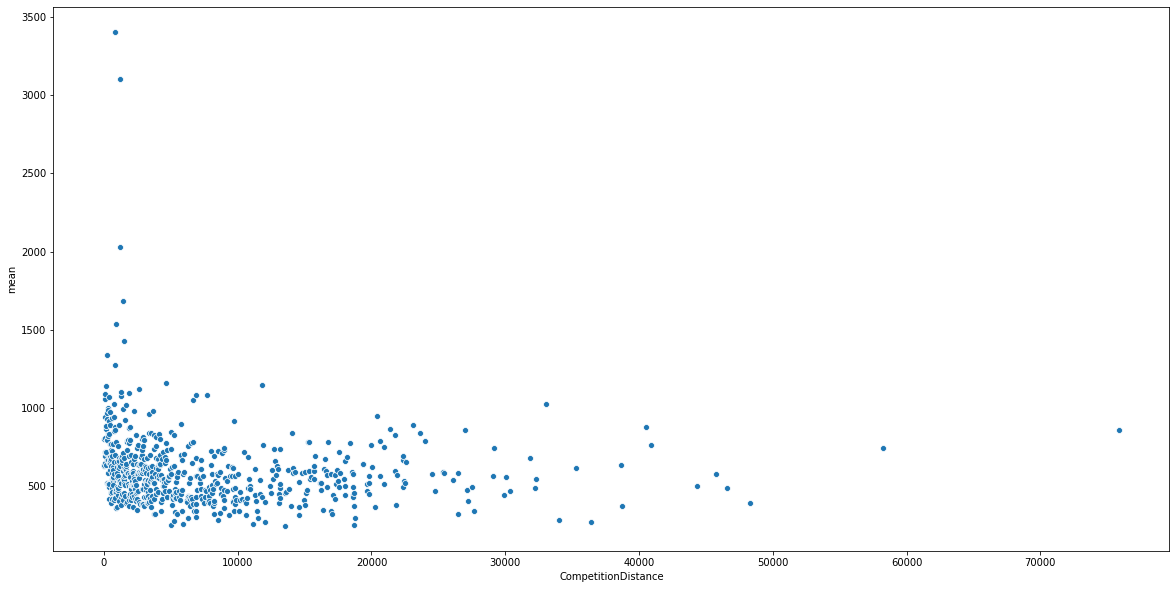

In [57]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='CompetitionDistance',y='mean',data=df_train_store_combined.groupby(['CompetitionDistance'])['Customers'].agg(['count',pd.Series.mode,'median','mean','std','min','max','sum']).reset_index(),)
plt.show()

No clear effect -> drop?

In [35]:
df_train_store_combined['CompetitionOpenSince'] = pd.to_datetime(df_train_store_combined['CompetitionOpenSince'],format='%Y-%m')

/home/timbo/miniconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


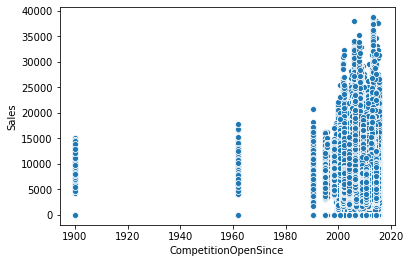

In [38]:
sns.scatterplot(x='CompetitionOpenSince',y='Sales',data=df_train_store_combined)

In [39]:
df_train_store_combined.groupby(['CompetitionOpenSince'])['Sales'].agg(['count',pd.Series.mode,'median','mean','std','min','max','sum'])

count mode  median         mean          std  min  \
CompetitionOpenSince                                                      
1900-01-01              758    0  7553.5  6889.460422  3807.452095    0   
1961-10-01              942    0  6888.0  6460.928875  3486.734343    0   
1990-06-01             1884    0  6745.0  6206.414544  3536.146870    0   
1990-07-01             2826    0  5959.5  5721.635173  3360.480300    0   
1994-11-01             1884    0  6258.0  5987.539809  3543.591107    0   
...                     ...  ...     ...          ...          ...  ...   
2015-04-01             8478    0  5206.0  5264.466973  4011.358100    0   
2015-05-01             5468    0  4626.0  4295.641368  2596.220416    0   
2015-06-01             4710    0  7195.0  7634.747983  4982.742359    0   
2015-07-01             7168    0  6595.5  6068.167271  3435.553159    0   
2015-08-01             2826    0  5605.5  5374.721868  3552.760711    0   

                        max       sum  
CompetitionOpenSince                   
1900-01-01            15022   5222211  
1961-10-01            17817   6086195  
1990-06-01            20738  11692885  
1990-07-01            18214  16169341  
1994-11-01            16309  11280525  
...                     ...       ...  
2015-04-01            37646  44632151  
2015-05-01            19373  23488567  
2015-06-01            31415  35959663  
2015-07-01            20597  43496623  
2015-08-01            15538  15188964  

[171 rows x 8 columns]

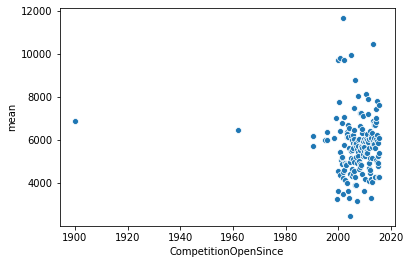

In [44]:
sns.scatterplot(x='CompetitionOpenSince',y='mean',data=df_train_store_combined.groupby(['CompetitionOpenSince'])['Sales'].agg(['count',pd.Series.mode,'median','mean','std','min','max','sum']).reset_index())

'CompettionOpenSince' has not a clear effect on sales -> column contains null values -> drop this column?

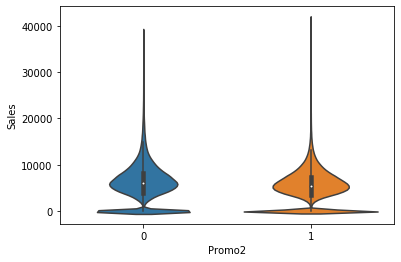

In [47]:
sns.violinplot(x='Promo2',y='Sales',data=df_train_store_combined)

In [68]:
df_train_store_combined.groupby(['Promo2'])['Sales'].agg(['count',pd.Series.mode,'median','mean','std','min','max','sum'])

count  mode  median         mean          std  min    max         sum
Promo2                                                                        
0       508031     0    6038  6124.710161  4136.143923    0  38722  3111542628
1       509178     0    5478  5423.718218  3506.556202    0  41551  2761637995

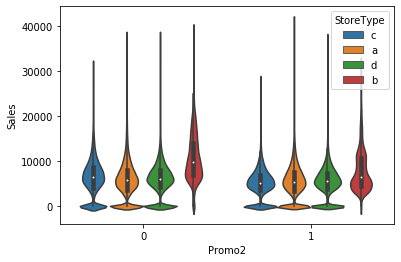

In [83]:
sns.violinplot(x='Promo2',y='Sales',data=df_train_store_combined, hue='StoreType')

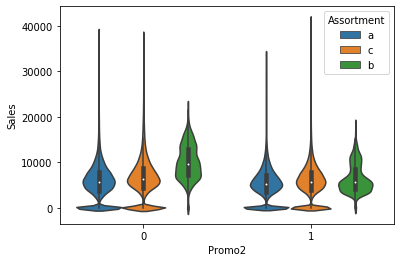

In [84]:
sns.violinplot(x='Promo2',y='Sales',data=df_train_store_combined, hue='Assortment')

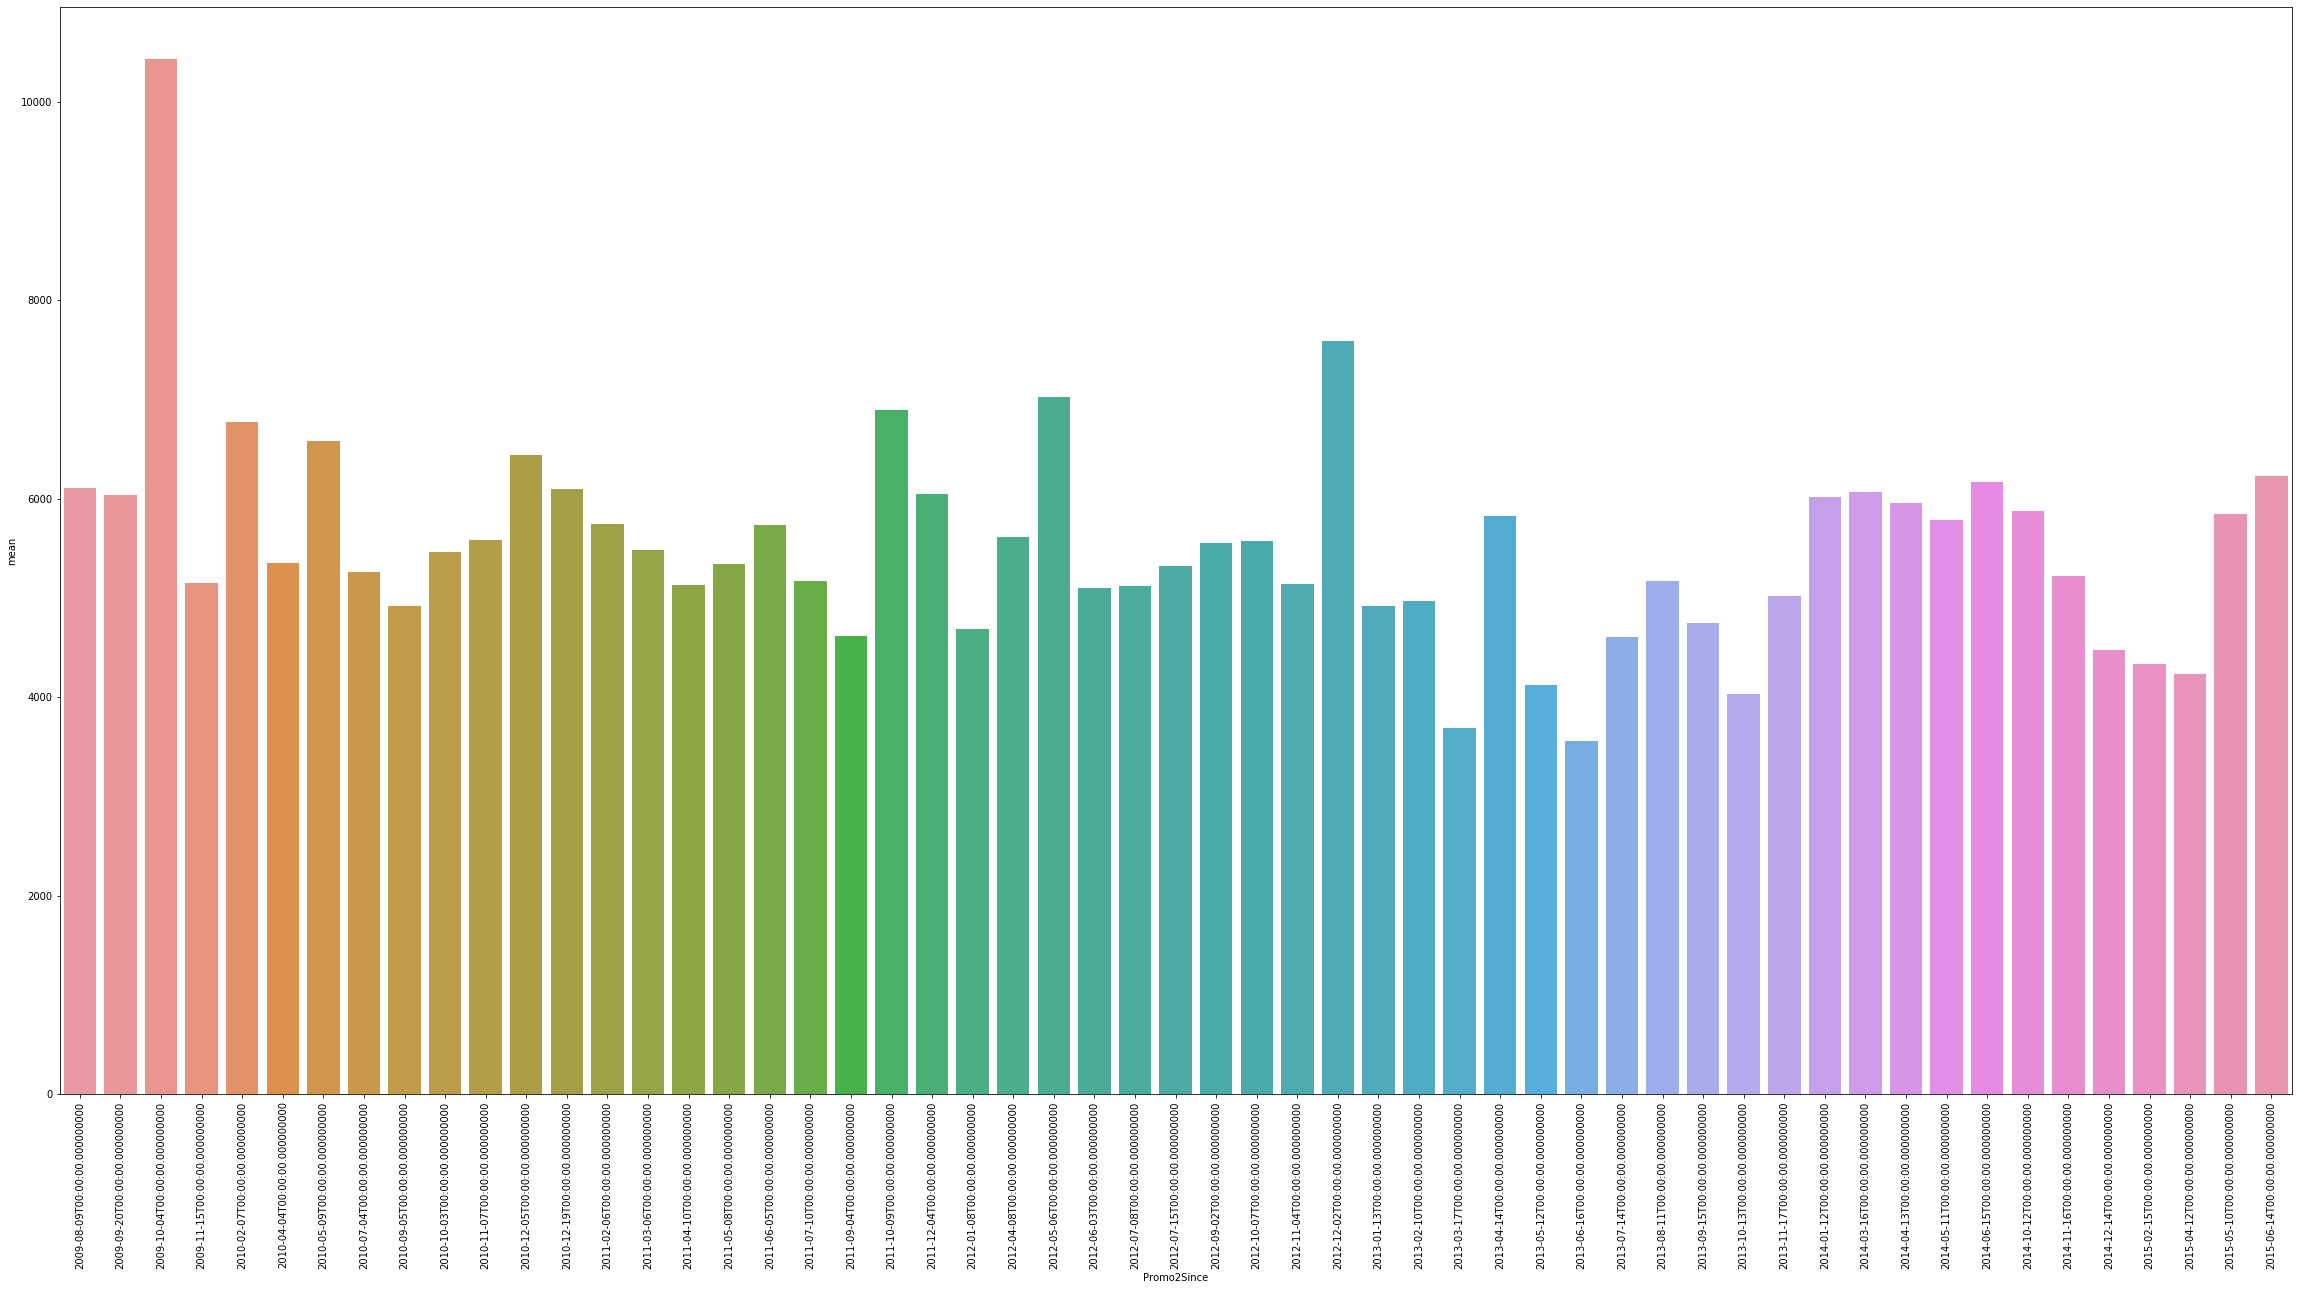

In [100]:
plt.figure(figsize=(40,20))
fig = sns.barplot(x='Promo2Since',y='mean', data=df_train_store_combined.groupby(['Promo2Since'])['Sales'].agg(['count',pd.Series.mode,'median','mean','std','min','max','sum']).reset_index())
fig.set_xticklabels(fig.get_xticklabels(),rotation=90)
plt.show()

In [96]:
df_train_store_combined.groupby(['Promo2Since'])['Sales'].agg(['count',pd.Series.mode,'median','mean','std','min','max','sum'])

count  mode  median          mean          std  min    max  \
Promo2Since                                                               
2009-08-09    6042     0  6737.5   6110.943065  3324.576206    0  19587   
2009-09-20   32786     0  6156.0   6038.128957  3836.608503    0  32368   
2009-10-04     942     0  9711.0  10433.380042  6513.770087    0  37646   
2009-11-15   25500     0  5222.0   5149.791882  3321.960727    0  41551   
2010-02-07    2642     0  7096.0   6771.922407  4096.606228    0  25316   
2010-04-04   29820     0  5457.0   5354.217170  3589.816233    0  30903   
2010-05-09    3768     0  7011.5   6583.998408  3592.559301    0  18223   
2010-07-04     942     0  5411.5   5259.541401  3292.925234    0  17845   
2010-09-05   12636     0  5009.0   4925.323599  3021.512684    0  19231   
2010-10-03    3790     0  5742.5   5459.413456  3252.026846    0  19202   
2010-11-07     758     0  5712.0   5586.748021  3180.258615    0  16356   
2010-12-05     942     0  6919.0   6439.839703  3558.090491    0  20214   
2010-12-19     942     0  6447.0   6099.830149  3542.294787    0  19394   
2011-02-06    2826     0  5930.0   5745.821302  3727.355767    0  25737   
2011-03-06   12452     0  5606.0   5485.999518  3486.776395    0  24046   
2011-04-10   56034     0  5217.0   5135.284613  3258.452978    0  28242   
2011-05-08   13188     0  5460.0   5342.250986  3372.193536    0  33071   
2011-06-05    6800     0  6142.5   5735.818824  3331.983176    0  22409   
2011-07-10    1884     0  5494.0   5175.249469  3095.638944    0  16339   
2011-09-04    3584     0  4963.0   4614.469866  2635.825780    0  13950   
2011-10-09   14520     0  6674.0   6897.994490  4697.793194    0  33668   
2011-12-04    3768     0  5899.5   6047.399416  3903.889959    0  23802   
2012-01-08   17898     0  4817.0   4692.104425  2953.240629    0  25506   
2012-04-08    5652     0  6090.5   5618.150212  3460.561719    0  22430   
2012-05-06     942     0  7367.5   7022.884289  3909.160025    0  17742   
2012-06-03   21894     0  5268.0   5106.239746  3061.922570    0  33934   
2012-07-08    3974     0  5405.0   5124.562154  2940.429823    0  15921   
2012-07-15     942     0  5617.0   5326.462845  3009.781261    0  15327   
2012-09-02    6594     0  5683.0   5556.781468  3300.576968    0  20993   
2012-10-07    9810     0  5832.5   5573.192966  3496.933920    0  24542   
2012-11-04    1884     0  5560.0   5145.951168  2971.304646    0  16729   
2012-12-02    3584     0  7919.5   7587.877232  3957.074418    0  21878   
2013-01-13   11694     0  5349.0   4917.799042  2799.152097    0  17309   
2013-02-10   30350     0  4974.0   4975.608171  3211.921499    0  25034   
2013-03-17    9236     0  3831.5   3695.601126  2163.257235    0  16730   
2013-04-14    6594     0  5904.5   5829.711253  3353.241150    0  22227   
2013-05-12    1884     0  4536.5   4122.020701  2520.435849    0  19781   
2013-06-16     942     0  3837.0   3554.979830  2351.754663    0  22125   
2013-07-14    3768     0  4672.0   4605.328822  2954.754059    0  18453   
2013-08-11   33934     0  5068.0   5174.845583  3550.913429    0  31406   
2013-09-15    9236     0  4658.5   4748.474123  3140.861808    0  22394   
2013-10-13    1884     0  4374.0   4036.560510  2167.510730    0  10322   
2013-11-17     942     0  5357.5   5022.121019  2788.718842    0  13302   
2014-01-12    2826     0  6100.5   6017.987969  4337.038023    0  31523   
2014-03-16   29592     0  6138.0   6072.587794  3868.952572    0  26516   
2014-04-13     942     0  6236.5   5953.615711  3284.681071    0  14957   
2014-05-11    5652     0  5885.5   5784.824487  3908.271394    0  24975   
2014-06-15     942     0  6759.0   6173.649682  3233.860522    0  14077   
2014-10-12   36384     0  6099.0   5877.843558  3640.727309    0  21485   
2014-11-16    2826     0  5482.0   5224.041755  2934.655250    0  15698   
2014-12-14     758     0  5015.5   4475.005277  2361.349239    0  12549   
2015-02-15     942     0  4624.5   433

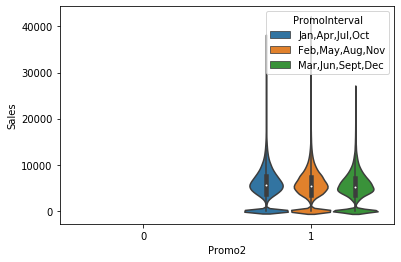

In [103]:
sns.violinplot(x='Promo2',y='Sales',data=df_train_store_combined, hue='PromoInterval')

'PromoInterval' only depends on 'Promo2' as describted above

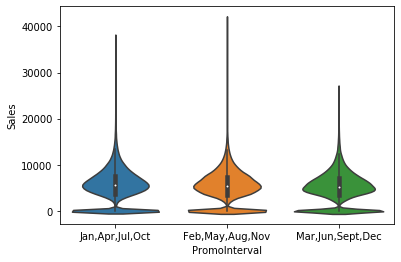

In [104]:
sns.violinplot(x='PromoInterval',y='Sales',data=df_train_store_combined)

In [105]:
df_train_store_combined.groupby(['PromoInterval'])['Sales'].agg(['count',pd.Series.mode,'median','mean','std','min','max','sum'])

count  mode  median         mean          std  min    max  \
PromoInterval                                                                  
Feb,May,Aug,Nov   118596     0    5402  5311.048585  3381.166345    0  41551   
Jan,Apr,Jul,Oct   293122     0    5610  5562.364063  3609.884075    0  37646   
Mar,Jun,Sept,Dec   97460     0    5172  5143.829243  3314.203545    0  26516   

                         sum  
PromoInterval                 
Feb,May,Aug,Nov    629869118  
Jan,Apr,Jul,Oct   1630451279  
Mar,Jun,Sept,Dec   501317598